In [1]:
import torch
torch.cuda.empty_cache()

In [3]:
import vllm
print(vllm.__version__)

0.5.0


In [1]:
from vllm import LLM, SamplingParams

prompts = [
    "Hello, my name is",
    "The president of the United States is",
    "The capital of France is",
    "The future of AI is",
    "Our son walks",
    "The cat sat on the",
]
sampling_params = SamplingParams(temperature=0.8, top_p=0.95)

In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-1b")
model = AutoModelForCausalLM.from_pretrained("EleutherAI/pythia-1b")
#model = model.half()

In [6]:
print(next(model.parameters()).dtype)

torch.float16


In [2]:
#model.save_pretrained('/home/IAIS/jdatta/thesis')

#tokenizer.save_pretrained('/home/IAIS/jdatta/thesis')

model.save_pretrained('/home/IAIS/jdatta/distillm-new/checkpoints')
tokenizer.save_pretrained('/home/IAIS/jdatta/distillm-new/checkpoints')

[2024-09-30 13:01:41,720] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/IAIS/jdatta/miniconda3/envs/vllm_env/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


('/home/IAIS/jdatta/distillm-new/checkpoints/tokenizer_config.json',
 '/home/IAIS/jdatta/distillm-new/checkpoints/special_tokens_map.json',
 '/home/IAIS/jdatta/distillm-new/checkpoints/tokenizer.json')

In [4]:
from vllm import LLM
llm = LLM(model="/home/IAIS/jdatta/distillm-new/checkpoints")

INFO 09-30 13:03:37 config.py:1193] Casting torch.float32 to torch.float16.
INFO 09-30 13:03:37 config.py:1214] Downcasting torch.float32 to torch.float16.
INFO 09-30 13:03:37 llm_engine.py:161] Initializing an LLM engine (v0.5.0) with config: model='/home/IAIS/jdatta/distillm-new/checkpoints', speculative_config=None, tokenizer='/home/IAIS/jdatta/distillm-new/checkpoints', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), seed=0, served_model_name=/home/IAIS/jdatta/distillm-new/checkpoints)
INFO 09-30 13:03:41 model_runner.py:159] Loading model weights took 1.8848 GB
INF

In [9]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained('openai-community/gpt2-large')
model = GPT2LMHeadModel.from_pretrained('openai-community/gpt2-large')
model = model.half()

model.save_pretrained('/home/IAIS/jdatta/test')
tokenizer.save_pretrained('/home/IAIS/jdatta/test')

('/home/IAIS/jdatta/test/tokenizer_config.json',
 '/home/IAIS/jdatta/test/special_tokens_map.json',
 '/home/IAIS/jdatta/test/vocab.json',
 '/home/IAIS/jdatta/test/merges.txt',
 '/home/IAIS/jdatta/test/added_tokens.json')

: 

In [7]:
from vllm import LLM
llm = LLM(model="/home/IAIS/jdatta/test")

INFO 07-23 23:05:33 llm_engine.py:176] Initializing an LLM engine (v0.5.3.post1) with config: model='/home/IAIS/jdatta/test', speculative_config=None, tokenizer='/home/IAIS/jdatta/test', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=/home/IAIS/jdatta/test, use_v2_block_manager=False, enable_prefix_caching=False)
INFO 07-23 23:05:33 model_runner.py:680] Starting to load model /home/IAIS/jdatta/test...
INFO 07-23 23:05:33 selector.py:151] Cannot use F

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 07-23 23:05:50 model_runner.py:692] Loading model weights took 1.4419 GB
INFO 07-23 23:05:51 gpu_executor.py:102] # GPU blocks: 9623, # CPU blocks: 1456
INFO 07-23 23:05:53 model_runner.py:980] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 07-23 23:05:53 model_runner.py:984] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 07-23 23:06:08 model_runner.py:1181] Graph capturing finished in 15 secs.


In [6]:
outputs = llm.generate(prompts, sampling_params)

# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

KeyError: 'prompt'

In [3]:
from vllm import LLM, SamplingParams

prompts = [
    "Hello, my name is",
    "The president of the United States is",
    "The capital of France is",
    "The future of AI is",
    "Our son walks",
    "The cat sat on the",
]
sampling_params = SamplingParams(temperature=0.8, top_p=0.95)

outputs = llm.generate(prompts, sampling_params)

# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

Processed prompts: 100%|███████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 12.07it/s]

Prompt: 'Hello, my name is', Generated text: ' Marissa and I am a senior at the University of South Carolina.  I'
Prompt: 'The president of the United States is', Generated text: ' the most powerful person in the world, the man in charge of the most powerful'
Prompt: 'The capital of France is', Generated text: ' Paris. Paris is an absolutely stunning city and one of the most popular tourist dest'
Prompt: 'The future of AI is', Generated text: ' now. You know how we’ve heard for years that AI is coming?'
Prompt: 'Our son walks', Generated text: ', runs, eats, plays, sleeps and does everything else perfectly.'
Prompt: 'The cat sat on the', Generated text: ' mat.\nThe mat was on the mat.\nThe mat was on the'


In [1]:
from datasets import load_dataset

# Load SQUAD dataset
dataset = load_dataset("rajpurkar/squad_v2")

# Split the dataset into train and test sets
dataset = dataset['train'].train_test_split(test_size=0.2)
train_dataset = dataset['train']
eval_dataset = dataset['test']

In [3]:
print(train_dataset)

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 104255
})


In [26]:
################################## IMPORTANT (1st scenario)####################################

import torch
import datasets
from transformers import TrainingArguments, AutoConfig, AutoTokenizer, AutoModelForCausalLM
import trl
import datetime
from trl import SFTConfig

torch.cuda.memory._record_memory_history(max_entries=100000)

train_dataset = datasets.load_dataset('rajpurkar/squad_v2', split='train')
def preprocess_function(examples):
    inputs = [q + " " + c for q, c in zip(examples["question"], examples["context"])]
    targets = [a["text"][0] if len(a["text"]) > 0 else "" for a in examples["answers"]]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

args = SFTConfig(
    output_dir="/home/IAIS/jdatta/teacher_model/test-galore",
    max_steps=5000,
    per_device_train_batch_size=1,
    fp16=False,
    dataset_text_field='input_ids',
    max_seq_length=128,
    learning_rate=1.0e-4,
    lr_scheduler_type="cosine",
    gradient_checkpointing=True,
    #num_train_epochs=3,
    optim="galore_adamw_8bit",
    optim_target_modules=["c_attn", "c_proj", "q_proj", "k_proj", "v_proj", "down_proj", "up_proj"],
    max_grad_norm=1.0,
    report_to=[]
)
model_id = "mistralai/Mistral-7B-v0.1"
config = AutoConfig.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token
train_dataset=train_dataset.map(preprocess_function, batched=True,remove_columns=train_dataset.column_names)
model = AutoModelForCausalLM.from_config(config).half()

model.gradient_checkpointing_enable()

trainer = trl.SFTTrainer(
    model=model, 
    args=args,
    train_dataset=train_dataset,
)

try:
    trainer.train()
except torch.cuda.OutOfMemoryError as error:
    now = datetime.datetime.now().strftime("%d%m%Y-%H%M%S")
    torch.cuda.memory._dump_snapshot(f"oom_snapshot_{now}.pickle")
    raise error
    
trainer.train()

model.save_pretrained("/home/IAIS/jdatta/teacher_model/test-galore")
tokenizer.save_pretrained("/home/IAIS/jdatta/teacher_model/test-galore")

/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[2024-07-02 11:29:46,375] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  NVIDIA Inference is only supported on Ampere and newer architectures
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.3
 [WARNING]  using untested triton version (2.3.1), only 1.0.0 is known to be compatible


/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/trl/trainer/sft_trainer.py:397: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs
Activated GaLoRE fine-tuning, depending on your model size and hardware, the training might take a while before starting. Please be patient !
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [1]:
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

print(f"CUDA_LAUNCH_BLOCKING: {os.environ['CUDA_LAUNCH_BLOCKING']}")
print(f"CUDA_VISIBLE_DEVICES: {os.environ['CUDA_VISIBLE_DEVICES']}")

CUDA_LAUNCH_BLOCKING: 0
CUDA_VISIBLE_DEVICES: 0


In [2]:
################################## IMPORTANT (2nd scenario)####################################

import torch
import datasets
from transformers import TrainingArguments, AutoConfig, AutoTokenizer, AutoModelForCausalLM
import trl
import datetime
from trl import SFTConfig

train_dataset = datasets.load_dataset('rajpurkar/squad_v2', split='train')
def preprocess_function(examples):
    inputs = [q + " " + c for q, c in zip(examples["question"], examples["context"])]
    targets = [a["text"][0] if len(a["text"]) > 0 else "" for a in examples["answers"]]
    model_inputs = tokenizer(inputs, max_length=32, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=32, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

args = SFTConfig(
    output_dir="/home/IAIS/jdatta/teacher_model/test-galore",
    max_steps=5000,
    per_device_train_batch_size=1,
    fp16=False,
    dataset_text_field='input_ids',
    max_seq_length=32,
    learning_rate=1.0e-4,
    lr_scheduler_type="cosine",
    gradient_checkpointing=True,
    #num_train_epochs=3,
    optim="galore_adamw_8bit",
    optim_target_modules=["c_attn", "c_proj", "q_proj", "k_proj", "v_proj", "down_proj", "up_proj"],
    max_grad_norm=1.0,
    report_to=[]
)
model_id = "mistralai/Mistral-7B-v0.1"
config = AutoConfig.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token
train_dataset=train_dataset.map(preprocess_function, batched=True,remove_columns=train_dataset.column_names)
model = AutoModelForCausalLM.from_config(config).half()

model.gradient_checkpointing_enable()

trainer = trl.SFTTrainer(
    model=model, 
    args=args,
    train_dataset=train_dataset,
)

trainer.train()

model.save_pretrained("/home/IAIS/jdatta/teacher_model/test-galore")
tokenizer.save_pretrained("/home/IAIS/jdatta/teacher_model/test-galore")

/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/130319 [00:00<?, ? examples/s]

[2024-07-02 12:27:35,156] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  NVIDIA Inference is only supported on Ampere and newer architectures
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.3
 [WARNING]  using untested triton version (2.3.1), only 1.0.0 is known to be compatible


/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/trl/trainer/sft_trainer.py:397: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs
Activated GaLoRE fine-tuning, depending on your model size and hardware, the training might take a while before starting. Please be patient !
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/home/IAIS/jdatta/miniconda3/envs/myenv/lib/python3.11/site-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recom

OutOfMemoryError: CUDA out of memory. Tried to allocate 56.00 MiB. GPU 

In [2]:
########################################## alpaca format #######################################

from datasets import load_dataset
import json
import os

# Load the SQuAD dataset
squad = load_dataset("rajpurkar/squad")

prepared_data = []
for item in squad['train']:
    question = item['question']
    context = item['context']
    answer = item['answers']['text'][0]  # Use the first answer
    prepared_data.append({'instruction': question, 'input': context, 'output': answer})

directory = "/home/IAIS/jdatta/LLaMA-Factory/data"
file_path = os.path.join(directory, 'squad_demo.json')

os.makedirs(directory, exist_ok=True)

with open(file_path, 'w') as file:
    json.dump(prepared_data, file, indent=2)

print(f"Data saved to {file_path}")


Data saved to /home/IAIS/jdatta/LLaMA-Factory/data/squad_demo.json


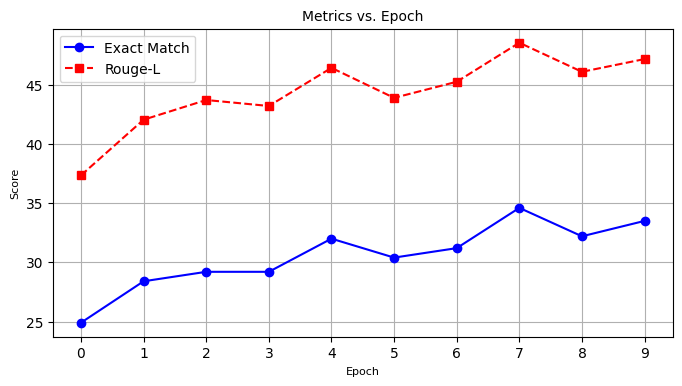

In [6]:
import matplotlib.pyplot as plt

epochs = list(range(0, 10))

exact_match = [24.9, 28.4, 29.2, 29.2, 32.0, 30.4, 31.2, 34.6, 32.2, 33.5]  
rougeL = [37.3458, 42.0471, 43.7102, 43.2062, 46.4264, 43.8924, 45.2505, 48.5491, 46.0918, 47.1704] 

plt.figure(figsize=(8, 4))
plt.plot(epochs, exact_match, marker='o', linestyle='-', color='b', label='Exact Match')
plt.plot(epochs, rougeL, marker='s', linestyle='--', color='r', label='Rouge-L')

plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Score', fontsize=8)
plt.title('Metrics vs. Epoch', fontsize=10)
plt.grid(True)
plt.xticks(epochs)
plt.legend()

plt.show()



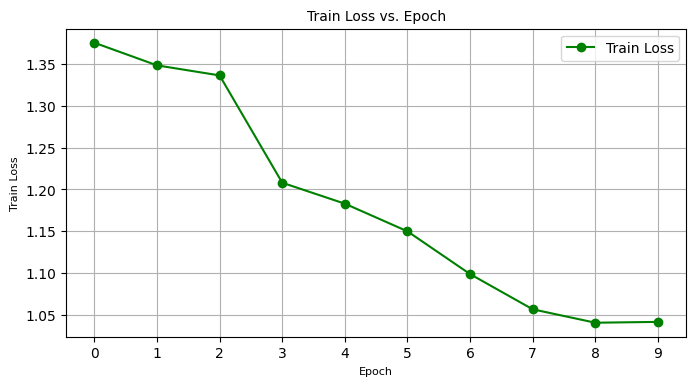

In [7]:
import matplotlib.pyplot as plt

epochs = list(range(0, 10))  
train_loss = [1.375, 1.348, 1.336, 1.208, 1.183, 1.150, 1.099, 1.057, 1.041, 1.042]  

plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, marker='o', linestyle='-', color='g', label='Train Loss')

plt.xlabel('Epoch', fontsize=8)
plt.ylabel('Train Loss', fontsize=8)
plt.title('Train Loss vs. Epoch', fontsize=10)
plt.grid(True)
plt.xticks(epochs)
plt.legend()

plt.show()


In [1]:
from vllm import LLM, SamplingParams

prompts = [
    "Hello, my name is",
    "The president of the United States is",
    "The capital of France is",
    "The future of AI is",
    "Our son walks",
    "The cat sat on the",
]
sampling_params = SamplingParams(temperature=0.8, top_p=0.95)

In [2]:
from vllm import LLM
llm = LLM(model="/home/IAIS/jdatta/distilled_model")

INFO 07-28 20:13:35 config.py:1421] Downcasting torch.float32 to torch.float16.


INFO 07-28 20:13:36 llm_engine.py:176] Initializing an LLM engine (v0.5.3.post1) with config: model='/home/IAIS/jdatta/distilled_model', speculative_config=None, tokenizer='/home/IAIS/jdatta/distilled_model', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=1024, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None), seed=0, served_model_name=/home/IAIS/jdatta/distilled_model, use_v2_block_manager=False, enable_prefix_caching=False)
INFO 07-28 20:13:36 selector.py:151] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 0

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 07-28 20:13:38 model_runner.py:692] Loading model weights took 0.2378 GB
INFO 07-28 20:13:39 gpu_executor.py:102] # GPU blocks: 50593, # CPU blocks: 7281


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.32 GiB. GPU 

: 

In [16]:
from datasets import load_dataset

dataset = load_dataset('mandarjoshi/trivia_qa', 'rc')

def save_as_jsonl(dataset_split, split_name):
    output_file = f'trivia_qa_{split_name}.jsonl'
    with open(output_file, 'w') as f:
        for example in dataset_split:
            f.write(f"{example}\n")
    print(f"Saved {split_name} split to {output_file}")

for split in dataset:
    save_as_jsonl(dataset[split], split)


Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/24 [00:00<?, ?it/s]

Saved train split to trivia_qa_train.jsonl
Saved validation split to trivia_qa_validation.jsonl
Saved test split to trivia_qa_test.jsonl


In [1]:
import torch
import os

teacher_model_path = '/home/IAIS/jdatta/distillm/checkpoints/gpt2-xlarge'
torch.save(model.state_dict(), teacher_model_path)

# Calculate and print the model size
model_size = os.path.getsize(teacher_model_path)
print(f"Model size: {model_size / (1024 * 1024)} MB")


NameError: name 'model' is not defined

In [2]:
import os

teacher_model_path = '/home/IAIS/jdatta/distillm/checkpoints/gpt2-large'

weights_file = os.path.join(teacher_model_path, 'pytorch_model.bin')
weights_size = os.path.getsize(weights_file)

print(f"Model weights size: {weights_size / (1024 * 1024):.2f} MB")

Model weights size: 2988.84 MB


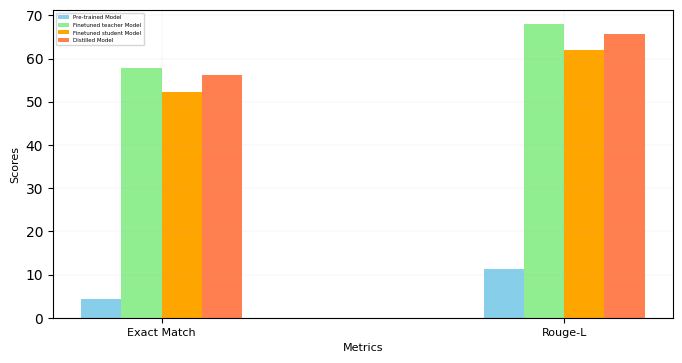

In [1]:
################# distillm(pythia) ####################

import matplotlib.pyplot as plt

metrics = ['Exact Match', 'Rouge-L']
pretrained_scores = [4.37,11.35]  
finetuned_teacher_scores = [57.8,67.9]
finetuned_student_scores = [52.3,62.01]
distilled_scores = [56.3, 65.7]  

x = range(len(metrics))
width = 0.1 
fig, ax = plt.subplots(figsize=(8, 4))
bars1 = ax.bar([p - 1.5*width for p in x], pretrained_scores, width, color='skyblue', label='Pre-trained Model')
bars2 = ax.bar([p - 0.5*width for p in x], finetuned_teacher_scores, width, color='lightgreen', label='Finetuned teacher Model')
bars3 = ax.bar([p + 0.5*width for p in x], finetuned_student_scores, width, color='orange', label='Finetuned student Model')
bars4 = ax.bar([p + 1.5*width for p in x], distilled_scores, width, color='coral', label='Distilled Model')

ax.grid(True, which='both', linestyle='--', linewidth=0.1)

ax.set_xlabel('Metrics', fontsize=8)
ax.set_ylabel('Scores', fontsize=8)
ax.set_xticks([p for p in x])
ax.set_xticklabels(metrics, fontsize=8)

ax.legend(loc='upper left',  fontsize=4)

plt.show()

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load pre-trained model and tokenizer
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2-0.5B")
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-0.5B")

tokenizer.pad_token_id = tokenizer.eos_token_id

context = "Beyoncé Giselle Knowles-Carter is an American singer, songwriter, and actress. She rose to fame in the late 1990s as the lead singer of Destiny's Child."
question = "When did Beyoncé start becoming famous?"

prompt = (
    f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"

)

inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=512)

outputs = model.generate(
    inputs['input_ids'], 
    attention_mask=inputs['attention_mask'], 
    max_new_tokens=30,  
    do_sample=False,
    top_p=0.8,
    temperature = 0.7,
    repetition_penalty=1.2
)

# Decode and print the generated text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

if "Answer:" in generated_text:
    generated_text = generated_text.split("Answer:")[1].split("\n")[0].strip()

print(generated_text)

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


In the late 1990s


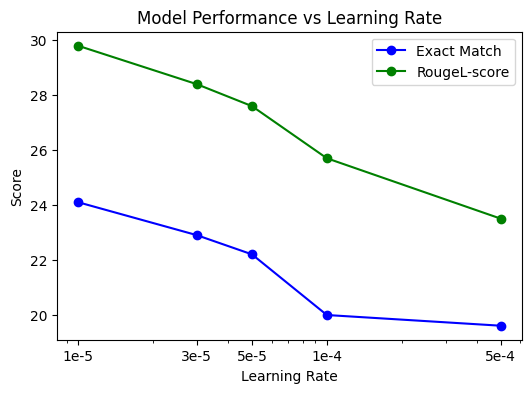

In [8]:
import matplotlib.pyplot as plt

learning_rates = [1*10**(-5), 3*10**(-5), 5*10**(-5), 1*10**(-4), 5*10**(-4)]
exact_match = [24.1, 22.9, 22.2, 19.99, 19.6]  
rougeL_score = [29.8, 28.4, 27.6, 25.7, 23.5]  

plt.figure(figsize=(6, 4))

plt.plot(learning_rates, exact_match, marker='o', label='Exact Match', color='blue')

plt.plot(learning_rates, rougeL_score, marker='o', label='RougeL-score', color='green')

plt.title('Model Performance vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Score')

plt.xscale('log')
plt.xticks(learning_rates, ['1e-5', '3e-5', '5e-5', '1e-4', '5e-4'])  

plt.legend()

plt.show()

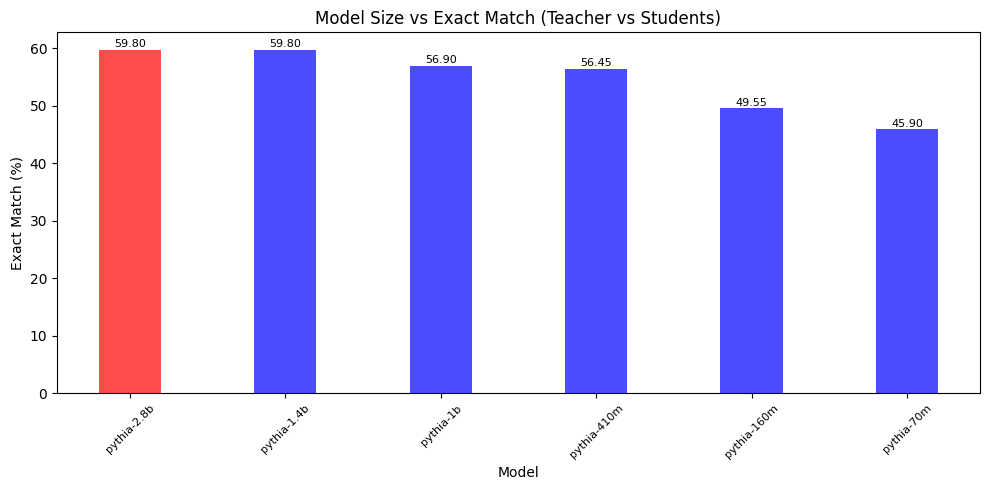

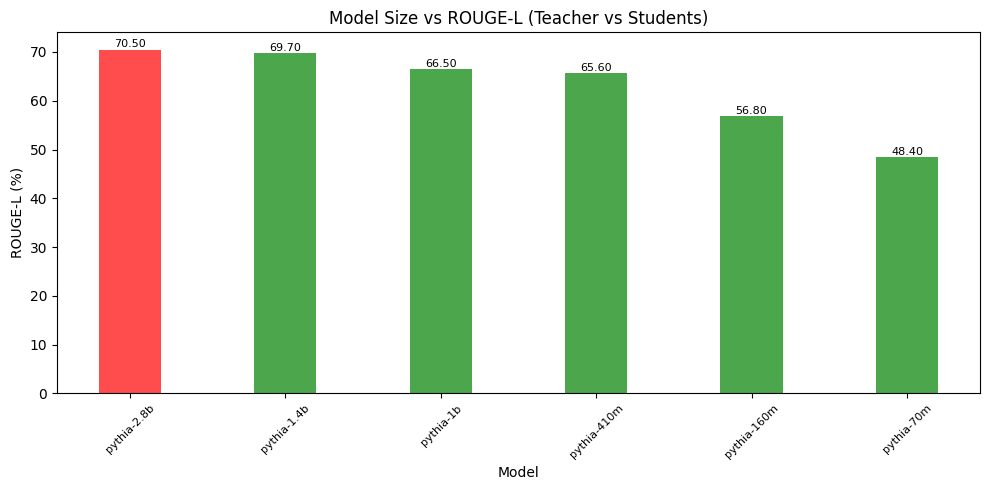

In [12]:
######################### compare Teacher & distilled models ####################

import matplotlib.pyplot as plt
import numpy as np

# Student models and their metrics
models = ['pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
parameters = [1.52e9, 1.08e9, 506e6, 213e6, 95.6e6]  # Parameters in consistent units (millions or billions)
exact_match = [59.8, 56.9, 56.45, 49.55, 45.9]
rouge_l = [69.7, 66.5, 65.6, 56.8, 48.4]

# Teacher model
teacher_model = 'pythia-2.8b'
teacher_exact_match = 59.8
teacher_rouge_l = 70.5
teacher_parameters = 2.91e9

# Insert teacher model at the beginning of the lists
models.insert(0, teacher_model)
parameters.insert(0, teacher_parameters)
exact_match.insert(0, teacher_exact_match)
rouge_l.insert(0, teacher_rouge_l)

# Convert parameters to millions for consistency
parameters_in_millions = [param / 1e6 for param in parameters]

# Create x positions for the bars
x_pos = np.arange(len(models))

# Figure 1: Bar Plot for Exact Match vs Model Size
plt.figure(figsize=(10, 5))
rects1 = plt.bar(x_pos, exact_match, width=0.4, color=['r'] + ['b']*5, alpha=0.7)  # Red color for teacher model
plt.xlabel('Model')
plt.ylabel('Exact Match (%)')
plt.title('Model Size vs Exact Match (Teacher vs Students)')
plt.xticks(x_pos, models, rotation=45, fontsize=8)

# Add Exact Match values and parameter size on top of the bars
for i, rect in enumerate(rects1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{exact_match[i]:.2f}', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

# Figure 2: Bar Plot for ROUGE-L vs Model Size
plt.figure(figsize=(10, 5))
rects2 = plt.bar(x_pos, rouge_l, width=0.4, color=['r'] + ['g']*5, alpha=0.7)  # Red color for teacher model
plt.xlabel('Model')
plt.ylabel('ROUGE-L (%)')
plt.title('Model Size vs ROUGE-L (Teacher vs Students)')
plt.xticks(x_pos, models, rotation=45, fontsize=8)

# Add ROUGE-L values and parameter size on top of the bars
for i, rect in enumerate(rects2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{rouge_l[i]:.2f}', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

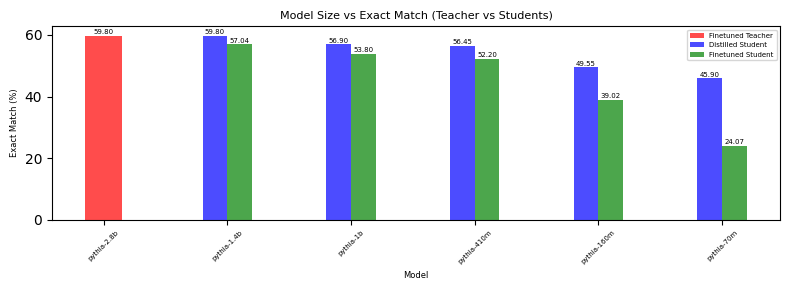

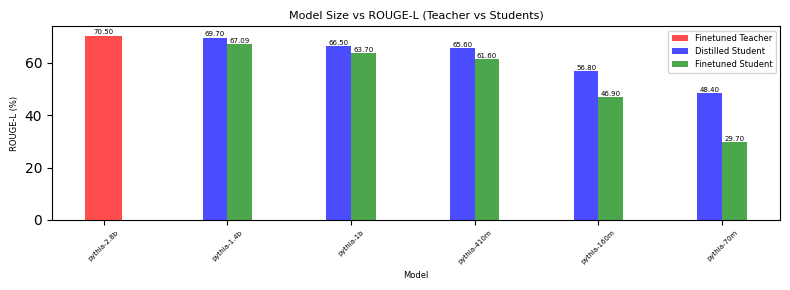

In [8]:
######################### compare finetuned & distilled models(Model:Pythia,squad) ####################

import matplotlib.pyplot as plt
import numpy as np

# Teacher model and its metrics
teacher_model = 'pythia-2.8b'
teacher_parameters = 2.91e9
teacher_exact_match = 59.8
teacher_rouge_l = 70.5

# Student models and their parameters
student_models = ['pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
student_parameters = [1.52e9, 1.08e9, 506e6, 213e6, 95.6e6]

# Distilled student scores
distilled_exact_match = [59.8, 56.9, 56.45, 49.55, 45.9]
distilled_rouge_l = [69.7, 66.5, 65.6, 56.8, 48.4]

# Finetuned student scores
finetuned_exact_match = [57.04, 53.8, 52.2, 39.02, 24.07]
finetuned_rouge_l = [67.09, 63.7, 61.6, 46.9, 29.7]

# Convert parameters to millions for consistency
teacher_parameters_in_millions = teacher_parameters / 1e6
student_parameters_in_millions = [param / 1e6 for param in student_parameters]

# Create x positions for the bars
x_teacher = [0]
x_students = np.arange(1, len(student_models) + 1)
#bar_width = 0.35
bar_width = 0.2

# Figure 1: Bar Plot for Exact Match vs Model Size
plt.figure(figsize=(8,3))

# Plot teacher model bar
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')

# Plot distilled student bars
rects1 = plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, label='Distilled Student', color='b', alpha=0.7)

# Plot finetuned student bars
rects2 = plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, label='Finetuned Student', color='g', alpha=0.7)

plt.xlabel('Model',fontsize=6)
plt.ylabel('Exact Match (%)',fontsize=6)
plt.title('Model Size vs Exact Match (Teacher vs Students)',fontsize=8)
plt.xticks(np.concatenate([x_teacher, x_students]), [teacher_model] + student_models, rotation=45, fontsize=5)
plt.legend(fontsize=5)

# Add Exact Match values on top of the bars
# For teacher model
plt.text(x_teacher[0], teacher_exact_match + 0.5, f'{teacher_exact_match:.2f}', ha='center', fontsize=5)

# For student models
for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=5)

plt.tight_layout()
plt.show()

# Figure 2: Bar Plot for ROUGE-L vs Model Size
plt.figure(figsize=(8,3))

# Plot teacher model bar
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
#plt.bar(x_teacher, [teacher_rouge_l], width=bar_width, color='r', alpha=0.7, label='Teacher')

# Plot distilled student bars
rects1 = plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, label='Distilled Student', color='b', alpha=0.7)

# Plot finetuned student bars
rects2 = plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, label='Finetuned Student', color='g', alpha=0.7)

plt.xlabel('Model',fontsize=6)
plt.ylabel('ROUGE-L (%)',fontsize=6)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)',fontsize=8)
plt.xticks(np.concatenate([x_teacher, x_students]), [teacher_model] + student_models, rotation=45, fontsize=5)
plt.legend(fontsize=6)

# Add ROUGE-L values on top of the bars
# For teacher model
plt.text(x_teacher[0], teacher_rouge_l + 0.5, f'{teacher_rouge_l:.2f}', ha='center', fontsize=5)

# For student models
for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=5)

plt.tight_layout()
plt.show()

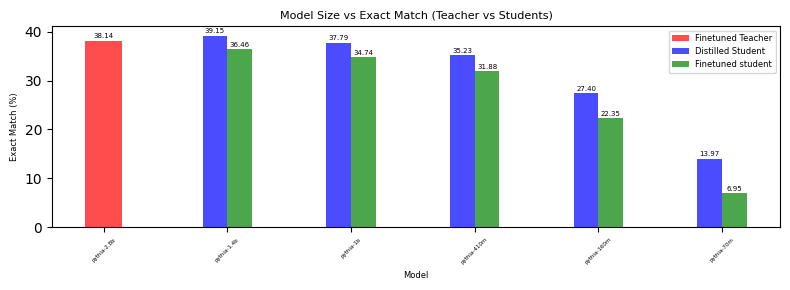

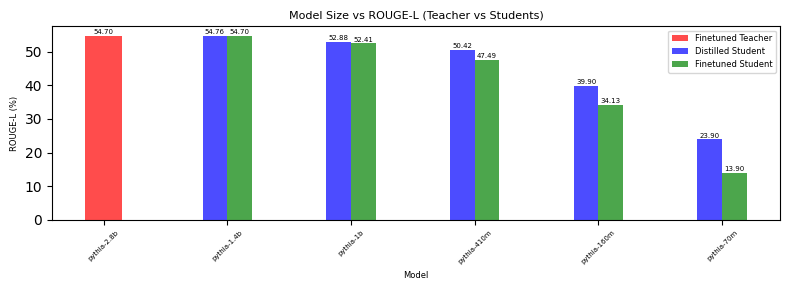

In [5]:
###################### compare finetuned & distilled models (Model:Pythia,mlqa.en) ####################

import matplotlib.pyplot as plt
import numpy as np

# Teacher model and its metrics
teacher_model = 'pythia-2.8b'
teacher_parameters = 2.91e9
teacher_exact_match = 38.14
teacher_rouge_l = 54.7

# Student models and their parameters
student_models = ['pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
student_parameters = [1.52e9, 1.08e9, 506e6, 213e6, 95.6e6]

# Distilled student scores
distilled_exact_match = [39.15, 37.79, 35.23, 27.4, 13.97]
distilled_rouge_l = [54.76, 52.88, 50.42, 39.9, 23.9]

# Finetuned student scores
finetuned_exact_match = [36.46, 34.74, 31.88, 22.35, 6.95]
finetuned_rouge_l = [54.7, 52.41, 47.49, 34.13, 13.9]

# Convert parameters to millions for consistency
teacher_parameters_in_millions = teacher_parameters / 1e6
student_parameters_in_millions = [param / 1e6 for param in student_parameters]

# Create x positions for the bars
x_teacher = [0]
x_students = np.arange(1, len(student_models) + 1)
#bar_width = 0.35
#bar_width = 0.3
bar_width = 0.2

# Figure 1: Bar Plot for Exact Match vs Model Size
plt.figure(figsize=(8,3))

# Plot teacher model bar
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')

# Plot distilled student bars
rects1 = plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, label='Distilled Student', color='b', alpha=0.7)

# Plot finetuned student bars
rects2 = plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, label='Finetuned student', color='g', alpha=0.7)

plt.xlabel('Model',fontsize=6)
plt.ylabel('Exact Match (%)',fontsize=6)
plt.title('Model Size vs Exact Match (Teacher vs Students)',fontsize=8)
plt.xticks(np.concatenate([x_teacher, x_students]), [teacher_model] + student_models, rotation=45, fontsize=4)
plt.legend(fontsize=6)

# Add Exact Match values on top of the bars
# For teacher model
plt.text(x_teacher[0], teacher_exact_match + 0.5, f'{teacher_exact_match:.2f}', ha='center', fontsize=5)

# For student models
for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=5)

plt.tight_layout()
plt.show()

# Figure 2: Bar Plot for ROUGE-L vs Model Size
plt.figure(figsize=(8, 3))

# Plot teacher model bar
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
#plt.bar(x_teacher, [teacher_rouge_l], width=bar_width, color='r', alpha=0.7, label='Teacher')

# Plot distilled student bars
rects1 = plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, label='Distilled Student', color='b', alpha=0.7)

# Plot finetuned student bars
rects2 = plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, label='Finetuned Student', color='g', alpha=0.7)

plt.xlabel('Model',fontsize=6)
plt.ylabel('ROUGE-L (%)',fontsize=6)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)',fontsize=8)
plt.xticks(np.concatenate([x_teacher, x_students]), [teacher_model] + student_models, rotation=45, fontsize=5)
plt.legend(fontsize=6)

# Add ROUGE-L values on top of the bars
# For teacher model
plt.text(x_teacher[0], teacher_rouge_l + 0.5, f'{teacher_rouge_l:.2f}', ha='center', fontsize=5)
# For student models
for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=5)


plt.tight_layout()
plt.show()

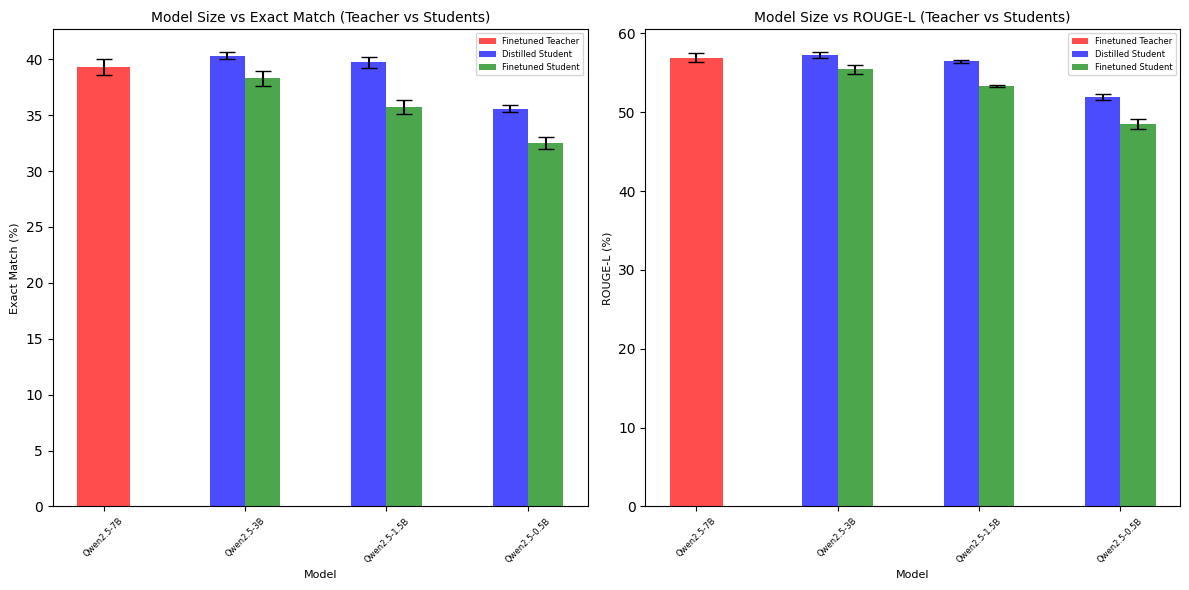

In [1]:
###################### visualizing mean and standard deviation (Qwen2.5, dataset: MLQA.en(zero-shot))

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Exact Match scores and standard deviations
teacher_exact_match = 39.32
teacher_exact_match_std = 0.6985
distilled_exact_match = [40.33, 39.74, 35.59]
distilled_exact_match_std = [0.3141, 0.4904, 0.3294]
finetuned_exact_match = [38.28, 35.697, 32.54]
finetuned_exact_match_std = [0.6651, 0.6202, 0.5461]

# ROUGE-L scores and standard deviations
teacher_rouge_l = 56.92
teacher_rouge_l_std = 0.5867
distilled_rouge_l = [57.28, 56.45, 51.97]
distilled_rouge_l_std = [0.3574, 0.1984, 0.3581]
finetuned_rouge_l = [55.45, 53.35, 48.56]
finetuned_rouge_l_std = [0.5631, 0.1550, 0.6207]

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot Exact Match Scores
plt.subplot(1, 2, 1)
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match], yerr=[teacher_exact_match_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match, yerr=distilled_exact_match_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match, yerr=finetuned_exact_match_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Model Size vs Exact Match (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_exact_match + 1, f'{teacher_exact_match:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_exact_match):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_exact_match):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores
plt.subplot(1, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_rouge_l], yerr=[teacher_rouge_l_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_rouge_l, yerr=distilled_rouge_l_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l, yerr=finetuned_rouge_l_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_rouge_l + 1, f'{teacher_rouge_l:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_rouge_l):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_rouge_l):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

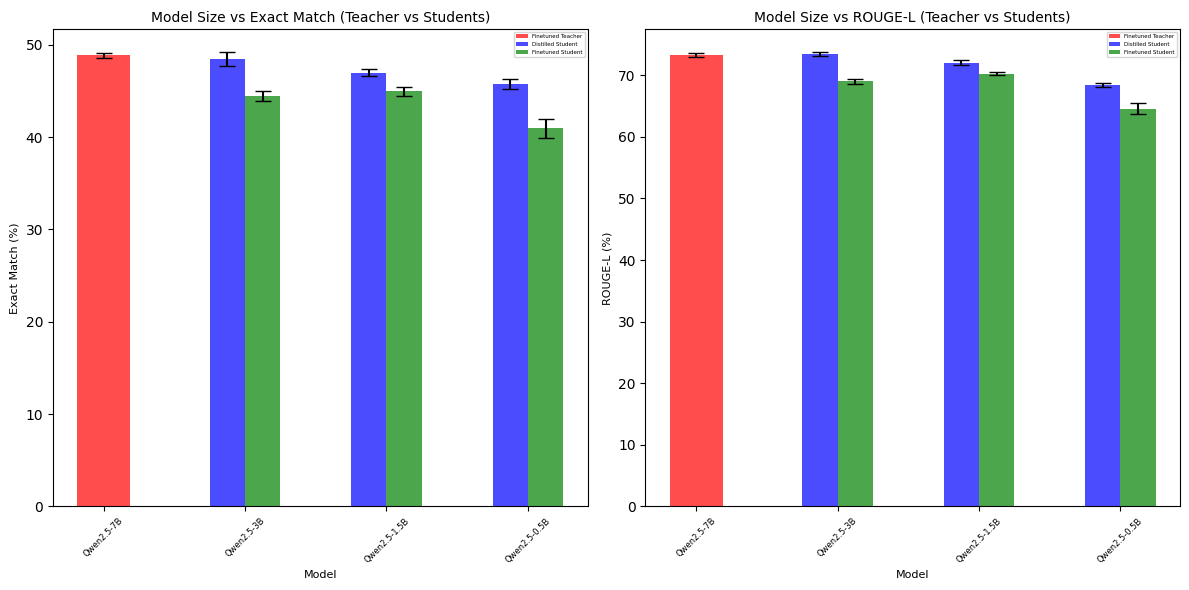

In [2]:
###################### visualizing mean and standard deviation (Qwen2.5, dataset: MLQA.en(one-shot))

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Exact Match scores and standard deviations
teacher_exact_match = 48.87
teacher_exact_match_std = 0.2815
distilled_exact_match = [48.45, 46.97, 45.71]
distilled_exact_match_std = [0.7616, 0.3720, 0.5398]
finetuned_exact_match = [44.50, 44.94, 40.95]
finetuned_exact_match_std = [0.5423, 0.4576, 0.9948]

# ROUGE-L scores and standard deviations
teacher_rouge_l = 73.34
teacher_rouge_l_std = 0.3003
distilled_rouge_l = [73.47, 72.04, 68.45]
distilled_rouge_l_std = [0.2987, 0.4083, 0.3564]
finetuned_rouge_l = [69.03, 70.22, 64.60]
finetuned_rouge_l_std = [0.4061, 0.2301, 0.91]

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot Exact Match Scores
plt.subplot(1, 2, 1)
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match], yerr=[teacher_exact_match_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match, yerr=distilled_exact_match_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match, yerr=finetuned_exact_match_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Model Size vs Exact Match (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=4)

# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_exact_match + 1, f'{teacher_exact_match:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_exact_match):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_exact_match):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores
plt.subplot(1, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_rouge_l], yerr=[teacher_rouge_l_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_rouge_l, yerr=distilled_rouge_l_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l, yerr=finetuned_rouge_l_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=4)

# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_rouge_l + 1, f'{teacher_rouge_l:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_rouge_l):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_rouge_l):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

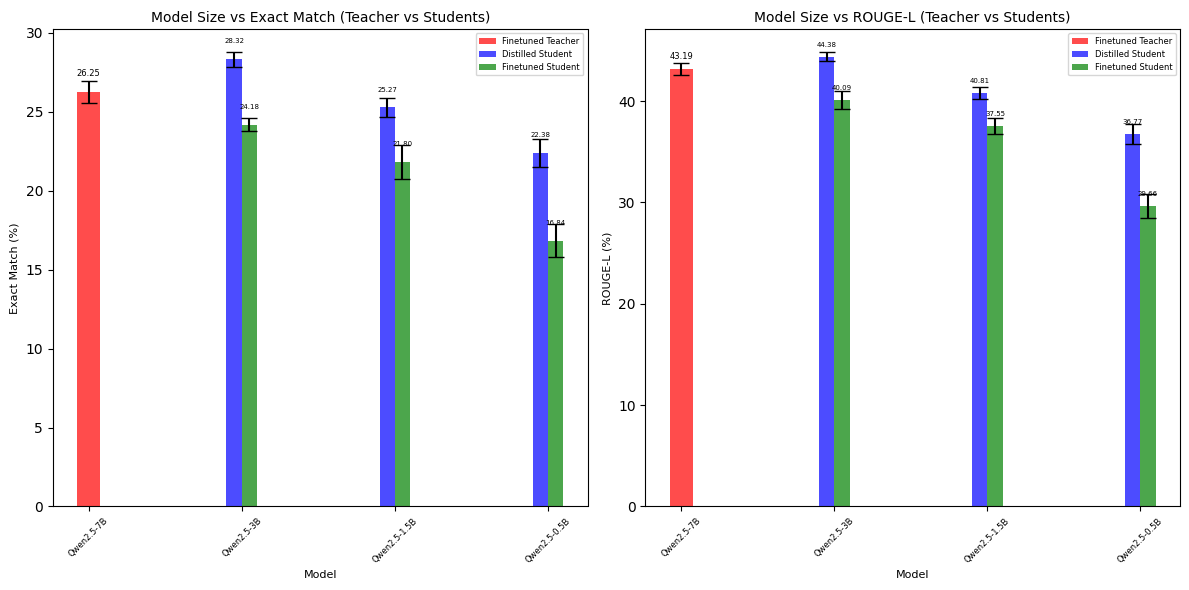

In [ ]:
###################### visualizing mean and standard deviation (Qwen2.5, dataset: MLQA.de (zero-shot))

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Exact Match scores and standard deviations
teacher_exact_match = 26.25
teacher_exact_match_std = 0.6709
distilled_exact_match = [28.32, 25.27, 22.38]
distilled_exact_match_std = [0.4580, 0.5956, 0.8691]
finetuned_exact_match = [24.18, 21.80, 16.84]
finetuned_exact_match_std = [0.4003, 1.0927, 1.0464]

# ROUGE-L scores and standard deviations
teacher_rouge_l = 43.19
teacher_rouge_l_std = 0.6050
distilled_rouge_l = [44.38, 40.81, 36.77]
distilled_rouge_l_std = [0.4573, 0.5984, 0.9891]
finetuned_rouge_l = [40.086, 37.55, 29.66]
finetuned_rouge_l_std = [0.8715, 0.7945, 1.1512]

# Bar width
bar_width = 0.1
bar_gap = bar_width / 10

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot Exact Match Scores
plt.subplot(1, 2, 1)
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match], yerr=[teacher_exact_match_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match, yerr=distilled_exact_match_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match, yerr=finetuned_exact_match_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Model Size vs Exact Match (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_exact_match + 1, f'{teacher_exact_match:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_exact_match):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=5)
for i, fine in enumerate(finetuned_exact_match):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=5)

# Plot ROUGE-L Scores
plt.subplot(1, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_rouge_l], yerr=[teacher_rouge_l_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_rouge_l, yerr=distilled_rouge_l_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l, yerr=finetuned_rouge_l_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_rouge_l + 1, f'{teacher_rouge_l:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_rouge_l):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=5)
for i, fine in enumerate(finetuned_rouge_l):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=5)

plt.tight_layout()
plt.show()

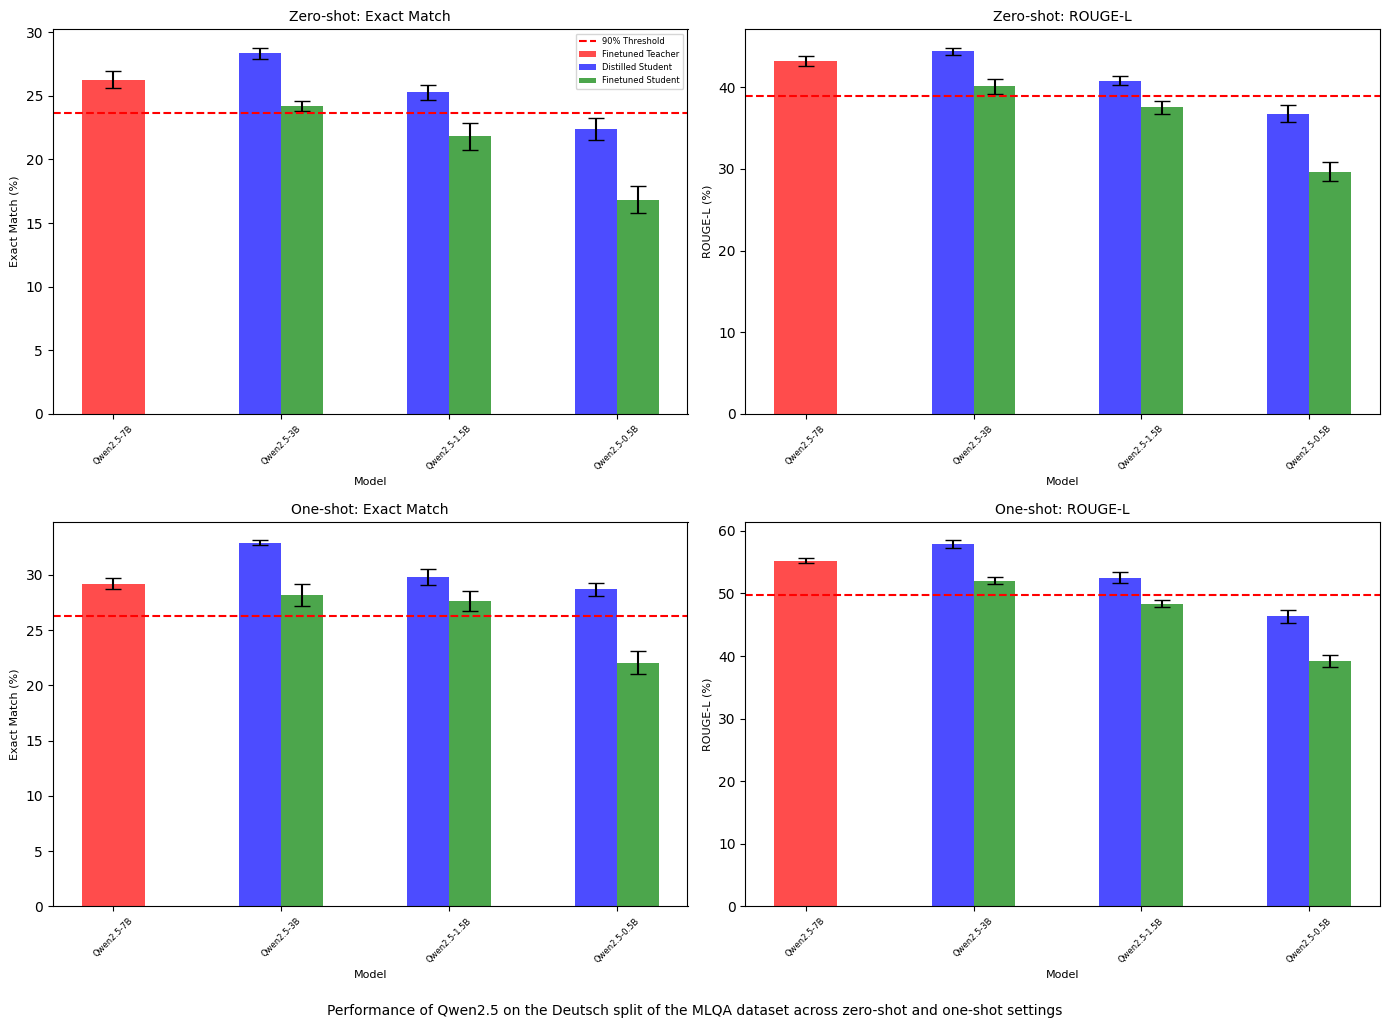

In [8]:
############### Model:Qwen2.5, Dataset:MLQA(de), zero-shot & one-shot dataset evaluation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define a function to add values on top of the bars
def add_bar_labels(ax, x_positions, heights, offset=1):
    for x, h in zip(x_positions, heights):
        ax.text(x, h + offset, f'{h:.2f}', ha='center', fontsize=6)

# Common settings
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models))
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 10))

##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 26.25
teacher_exact_match_std_zero = 0.6709
distilled_exact_match_zero = [28.32, 25.27, 22.38]
distilled_exact_match_std_zero = [0.4580, 0.5956, 0.8691]
finetuned_exact_match_zero = [24.18, 21.80, 16.84]
finetuned_exact_match_std_zero = [0.4003, 1.0927, 1.0464]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 43.19
teacher_rouge_l_std_zero = 0.6050
distilled_rouge_l_zero = [44.38, 40.81, 36.77]
distilled_rouge_l_std_zero = [0.4573, 0.5984, 0.9891]
finetuned_rouge_l_zero = [40.086, 37.55, 29.66]
finetuned_rouge_l_std_zero = [0.8715, 0.7945, 1.1512]

# Plot Exact Match Scores (Zero-shot)
ax1 = plt.subplot(2, 2, 1)
ax1.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax1.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=6)
ax1.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax1.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=6)
ax1.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax1.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_zero, color='r', linestyle='--', label='90% Threshold')
ax1.set_xlabel('Model', fontsize=8)
ax1.set_ylabel('Exact Match (%)', fontsize=8)
ax1.set_title('Zero-shot: Exact Match', fontsize=10)
ax1.set_xticks(np.concatenate([x_teacher, x_students]))
ax1.set_xticklabels(models, rotation=45, fontsize=6)
ax1.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
#add_bar_labels(ax1, x_teacher, [teacher_exact_match_zero])
#add_bar_labels(ax1, x_students - bar_width/2, distilled_exact_match_zero)
#add_bar_labels(ax1, x_students + bar_width/2, finetuned_exact_match_zero)

# Plot ROUGE-L Scores (Zero-shot)
ax2 = plt.subplot(2, 2, 2)
ax2.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
ax2.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=6)
ax2.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
ax2.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=6)
ax2.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='g', alpha=0.7)
ax2.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_zero, color='r', linestyle='--', label='90% Threshold')
ax2.set_xlabel('Model', fontsize=8)
ax2.set_ylabel('ROUGE-L (%)', fontsize=8)
ax2.set_title('Zero-shot: ROUGE-L', fontsize=10)
ax2.set_xticks(np.concatenate([x_teacher, x_students]))
ax2.set_xticklabels(models, rotation=45, fontsize=6)

# Adding values on top of the bars
#add_bar_labels(ax2, x_teacher, [teacher_rouge_l_zero])
#add_bar_labels(ax2, x_students - bar_width/2, distilled_rouge_l_zero)
#add_bar_labels(ax2, x_students + bar_width/2, finetuned_rouge_l_zero)

##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 29.17
teacher_exact_match_std_one = 0.4974
distilled_exact_match_one = [32.91, 29.76, 28.69]
distilled_exact_match_std_one = [0.2171, 0.7200, 0.5795]
finetuned_exact_match_one = [28.20, 27.62, 22.04]
finetuned_exact_match_std_one = [1.0066, 0.9306, 1.0212]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 55.21
teacher_rouge_l_std_one = 0.4045
distilled_rouge_l_one = [57.87, 52.53, 46.36]
distilled_rouge_l_std_one = [0.6468, 0.8322, 1.0680]
finetuned_rouge_l_one = [52.07, 48.36, 39.14]
finetuned_rouge_l_std_one = [0.5407, 0.5307, 0.9545]

# Plot Exact Match Scores (One-shot)
ax3 = plt.subplot(2, 2, 3)
ax3.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7)
ax3.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=6)
ax3.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='b', alpha=0.7)
ax3.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=6)
ax3.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='g', alpha=0.7)
ax3.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_one, color='r', linestyle='--', label='90% Threshold')
ax3.set_xlabel('Model', fontsize=8)
ax3.set_ylabel('Exact Match (%)', fontsize=8)
ax3.set_title('One-shot: Exact Match', fontsize=10)
ax3.set_xticks(np.concatenate([x_teacher, x_students]))
ax3.set_xticklabels(models, rotation=45, fontsize=6)

# Adding values on top of the bars
#add_bar_labels(ax3, x_teacher, [teacher_exact_match_one])
#add_bar_labels(ax3, x_students - bar_width/2, distilled_exact_match_one)
#add_bar_labels(ax3, x_students + bar_width/2, finetuned_exact_match_one)

# Plot ROUGE-L Scores (One-shot)
ax4 = plt.subplot(2, 2, 4)
ax4.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7)
ax4.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=6)
ax4.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='b', alpha=0.7)
ax4.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=6)
ax4.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='g', alpha=0.7)
ax4.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_one, color='r', linestyle='--', label='90% Threshold')
ax4.set_xlabel('Model', fontsize=8)
ax4.set_ylabel('ROUGE-L (%)', fontsize=8)
ax4.set_title('One-shot: ROUGE-L', fontsize=10)
ax4.set_xticks(np.concatenate([x_teacher, x_students]))
ax4.set_xticklabels(models, rotation=45, fontsize=6)

# Adding values on top of the bars
#add_bar_labels(ax4, x_teacher, [teacher_rouge_l_one])
#add_bar_labels(ax4, x_students - bar_width/2, distilled_rouge_l_one)
#add_bar_labels(ax4, x_students + bar_width/2, finetuned_rouge_l_one)

plt.figtext(0.5, -0.02, "Performance of Qwen2.5 on the Deutsch split of the MLQA dataset across zero-shot and one-shot settings", 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Add padding at the bottom
plt.tight_layout()
plt.show()


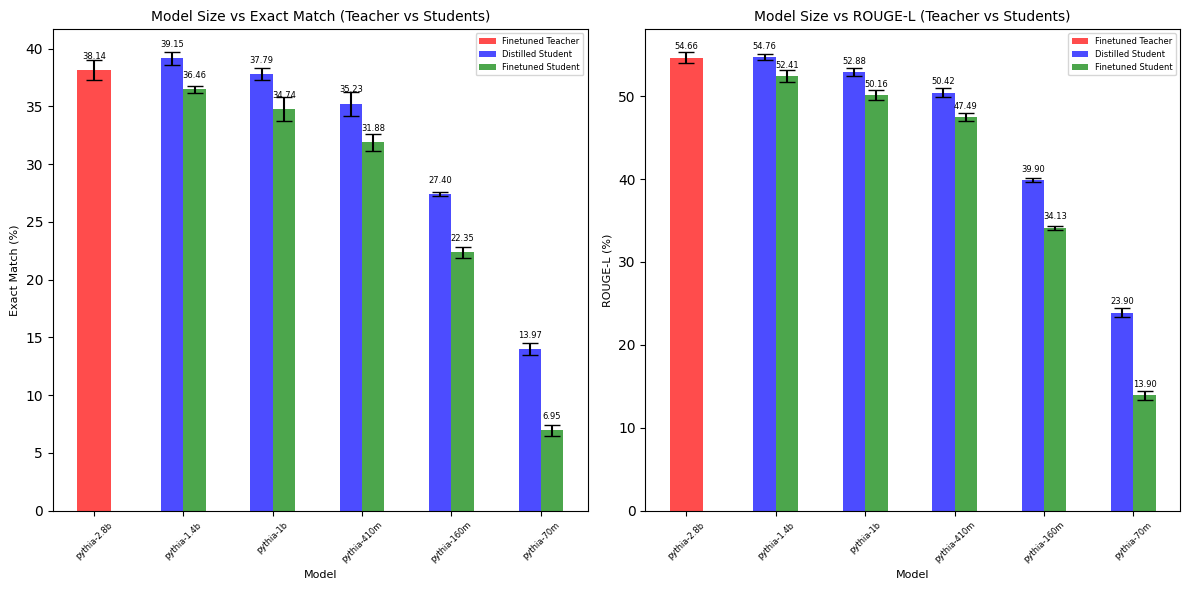

In [29]:
###################### visualizing mean and standard deviation (pythia, dataset: MLQA.en(zero-shot)) ####################

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['pythia-2.8b', 'pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Exact Match scores and standard deviations
teacher_exact_match = 38.14
teacher_exact_match_std = 0.8364
distilled_exact_match = [39.15, 37.79, 35.23, 27.40, 13.97]
distilled_exact_match_std = [0.5355, 0.5094, 1.0554, 0.1582, 0.5320]
finetuned_exact_match = [36.46, 34.74, 31.88, 22.35, 6.95]
finetuned_exact_match_std = [0.3177, 1.0496, 0.7077, 0.4551, 0.4747]

# ROUGE-L scores and standard deviations
teacher_rouge_l = 54.66
teacher_rouge_l_std = 0.6524
distilled_rouge_l = [54.76, 52.88, 50.42, 39.90, 23.90]
distilled_rouge_l_std = [0.3462, 0.4863, 0.5604, 0.2325, 0.5313]
finetuned_rouge_l = [52.41, 50.16, 47.49, 34.13, 13.90]
finetuned_rouge_l_std = [0.7279, 0.6022, 0.5258, 0.2383, 0.5538]

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot Exact Match Scores
plt.subplot(1, 2, 1)
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match], yerr=[teacher_exact_match_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match, yerr=distilled_exact_match_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match, yerr=finetuned_exact_match_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Model Size vs Exact Match (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_exact_match + 1, f'{teacher_exact_match:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_exact_match):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_exact_match):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores
plt.subplot(1, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_rouge_l], yerr=[teacher_rouge_l_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_rouge_l, yerr=distilled_rouge_l_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l, yerr=finetuned_rouge_l_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_rouge_l + 1, f'{teacher_rouge_l:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_rouge_l):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_rouge_l):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

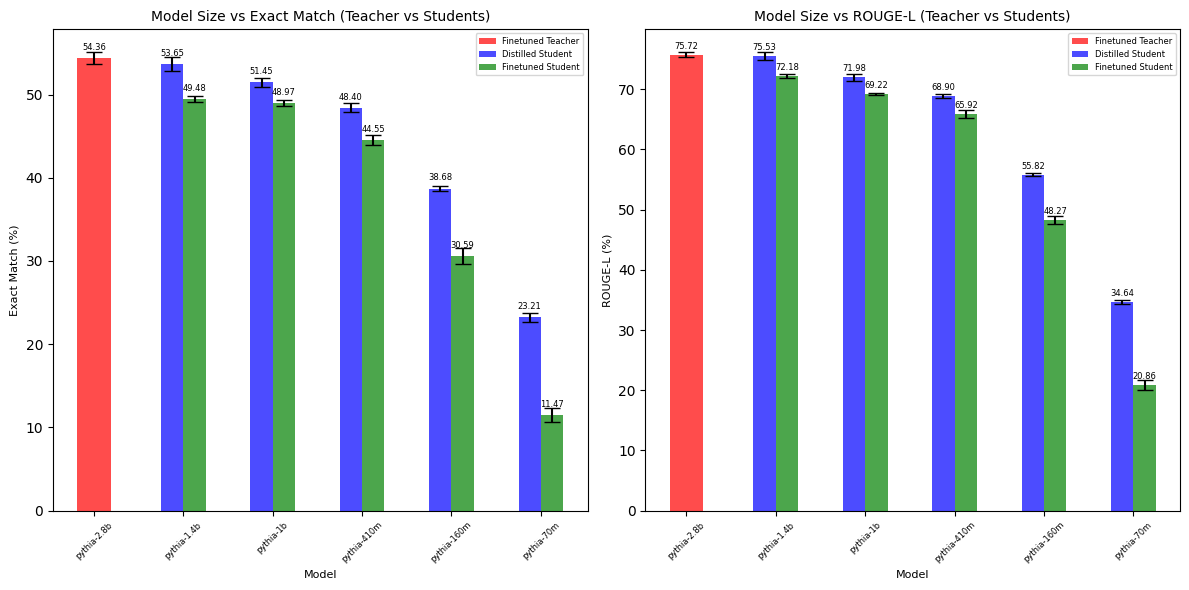

In [13]:
###################### visualizing mean and standard deviation (pythia, dataset: MLQA.en(one-shot)) ####################

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['pythia-2.8b', 'pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Exact Match scores and standard deviations
teacher_exact_match = 54.36
teacher_exact_match_std = 0.7205
distilled_exact_match = [53.65, 51.45, 48.40, 38.68, 23.21]
distilled_exact_match_std = [0.8535, 0.5909, 0.5425, 0.3142, 0.5166]
finetuned_exact_match = [49.48, 48.97, 44.55, 30.59, 11.47]
finetuned_exact_match_std = [0.3284, 0.3907, 0.5932, 0.9464, 0.8084]

# ROUGE-L scores and standard deviations
teacher_rouge_l = 75.72
teacher_rouge_l_std = 0.4178
distilled_rouge_l = [75.53, 71.98, 68.90, 55.82, 34.64]
distilled_rouge_l_std = [0.6309, 0.5225, 0.2906, 0.2051, 0.3884]
finetuned_rouge_l = [72.18, 69.22, 65.92, 48.27, 20.86]
finetuned_rouge_l_std = [0.3453, 0.2098, 0.6966, 0.6726, 0.9090]

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot Exact Match Scores
plt.subplot(1, 2, 1)
plt.bar(x_teacher, [teacher_exact_match], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match], yerr=[teacher_exact_match_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match, yerr=distilled_exact_match_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match, yerr=finetuned_exact_match_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Model Size vs Exact Match (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_exact_match + 1, f'{teacher_exact_match:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_exact_match):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_exact_match):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores
plt.subplot(1, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_rouge_l], yerr=[teacher_rouge_l_std], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_rouge_l, yerr=distilled_rouge_l_std, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l, yerr=finetuned_rouge_l_std, fmt='none', color='black', capsize=6)
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Model Size vs ROUGE-L (Teacher vs Students)', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
plt.text(x_teacher[0], teacher_rouge_l + 1, f'{teacher_rouge_l:.2f}', ha='center', fontsize=6)
for i, dist in enumerate(distilled_rouge_l):
    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
for i, fine in enumerate(finetuned_rouge_l):
    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

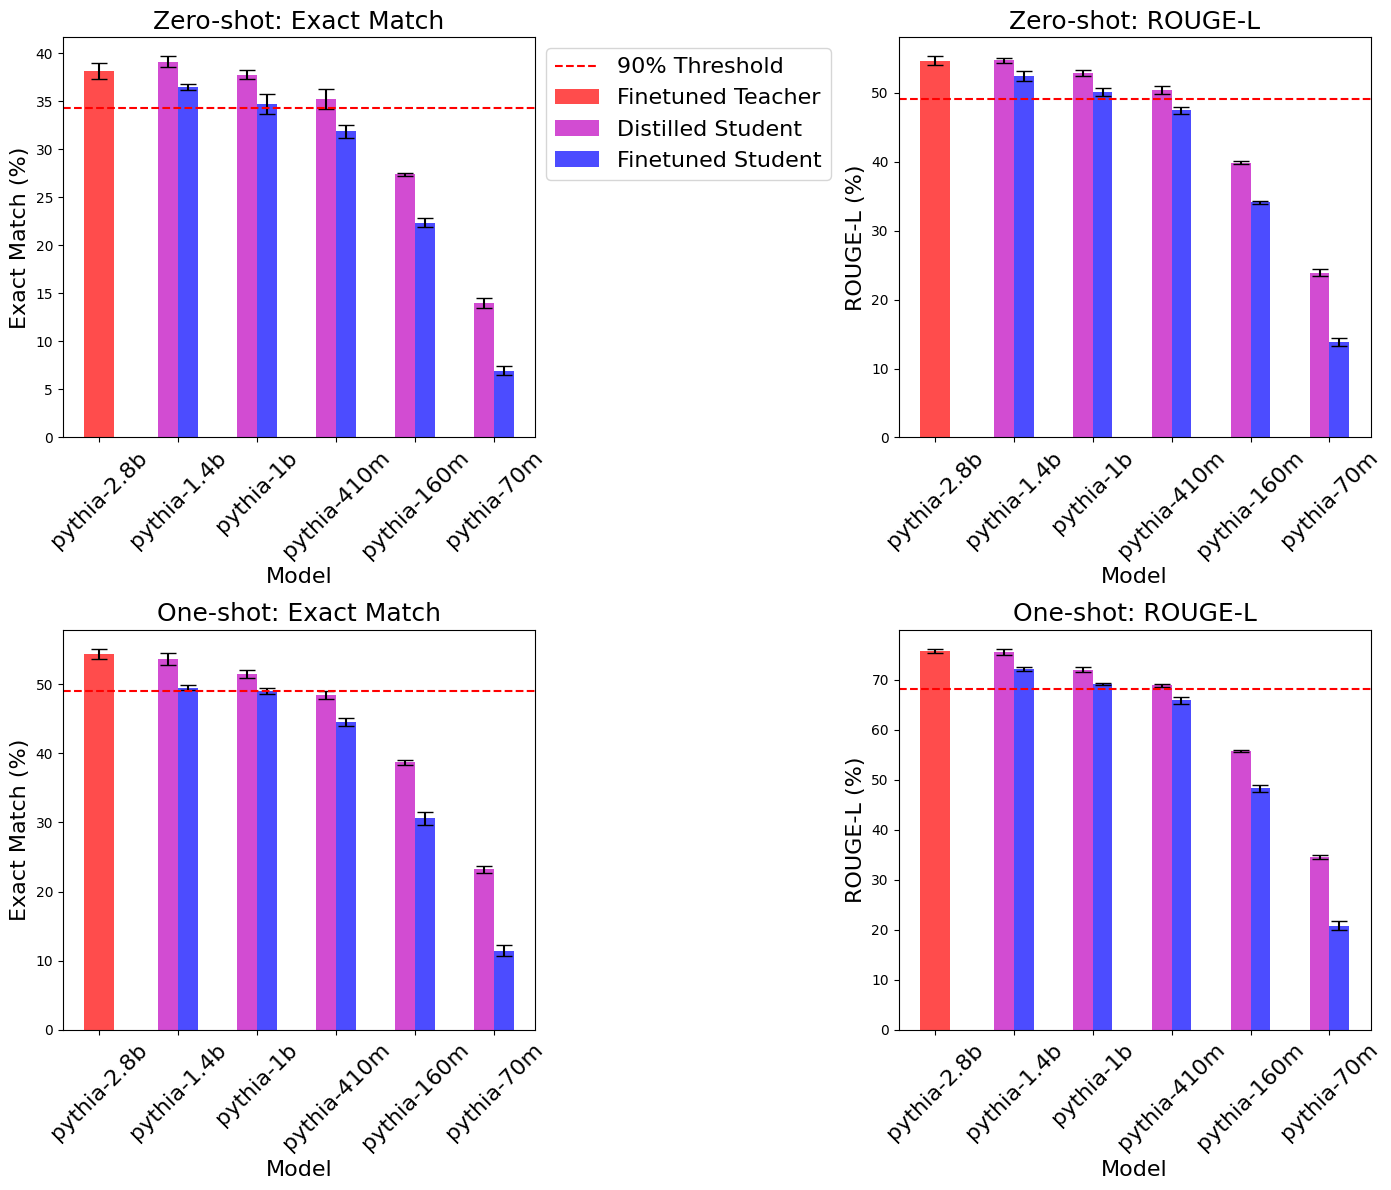

In [2]:
############### Model:Pythia, Dataset:MLQA(en), zero-shot & one-shot dataset evaluation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['pythia-2.8b', 'pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 12))

##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 38.14
teacher_exact_match_std_zero = 0.8364
distilled_exact_match_zero = [39.15, 37.79, 35.23, 27.40, 13.97]
distilled_exact_match_std_zero = [0.5355, 0.5094, 1.0554, 0.1582, 0.5320]
finetuned_exact_match_zero = [36.46, 34.74, 31.88, 22.35, 6.95]
finetuned_exact_match_std_zero = [0.3177, 1.0496, 0.7077, 0.4551, 0.4747]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 54.66
teacher_rouge_l_std_zero = 0.6524
distilled_rouge_l_zero = [54.76, 52.88, 50.42, 39.90, 23.90]
distilled_rouge_l_std_zero = [0.3462, 0.4863, 0.5604, 0.2325, 0.5313]
finetuned_rouge_l_zero = [52.41, 50.16, 47.49, 34.13, 13.90]
finetuned_rouge_l_std_zero = [0.7279, 0.6022, 0.5258, 0.2383, 0.5538]

# Plot Exact Match Scores (Zero-shot)
plt.subplot(2, 2, 1)
plt.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='m', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_zero, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=16)
plt.ylabel('Exact Match (%)', fontsize=16)
plt.title('Zero-shot: Exact Match', fontsize=18)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=16)
#plt.legend(loc='upper right', fontsize=16)

# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_exact_match_zero + 1, f'{teacher_exact_match_zero:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_exact_match_zero):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_exact_match_zero):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores (Zero-shot)
plt.subplot(2, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='m', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_zero, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=16)
plt.ylabel('ROUGE-L (%)', fontsize=16)
plt.title('Zero-shot: ROUGE-L', fontsize=18)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=16)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_rouge_l_zero + 1, f'{teacher_rouge_l_zero:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_rouge_l_zero):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_rouge_l_zero):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 54.36
teacher_exact_match_std_one = 0.7205
distilled_exact_match_one = [53.65, 51.45, 48.40, 38.68, 23.21]
distilled_exact_match_std_one = [0.8535, 0.5909, 0.5425, 0.3142, 0.5166]
finetuned_exact_match_one = [49.48, 48.97, 44.55, 30.59, 11.47]
finetuned_exact_match_std_one = [0.3284, 0.3907, 0.5932, 0.9464, 0.8084]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 75.72
teacher_rouge_l_std_one = 0.4178
distilled_rouge_l_one = [75.53, 71.98, 68.90, 55.82, 34.64]
distilled_rouge_l_std_one = [0.6309, 0.5225, 0.2906, 0.2051, 0.3884]
finetuned_rouge_l_one = [72.18, 69.22, 65.92, 48.27, 20.86]
finetuned_rouge_l_std_one = [0.3453, 0.2098, 0.6966, 0.6726, 0.9090]

# Plot Exact Match Scores (One-shot)
plt.subplot(2, 2, 3)
plt.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='m', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_one, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=16)
plt.ylabel('Exact Match (%)', fontsize=16)
plt.title('One-shot: Exact Match', fontsize=18)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=16)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_exact_match_one + 1, f'{teacher_exact_match_one:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_exact_match_one):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_exact_match_one):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores (One-shot)
plt.subplot(2, 2, 4)
plt.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='m', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_one, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=16)
plt.ylabel('ROUGE-L (%)', fontsize=16)
plt.title('One-shot: ROUGE-L', fontsize=18)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=16)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_rouge_l_one + 1, f'{teacher_rouge_l_one:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_rouge_l_one):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_rouge_l_one):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

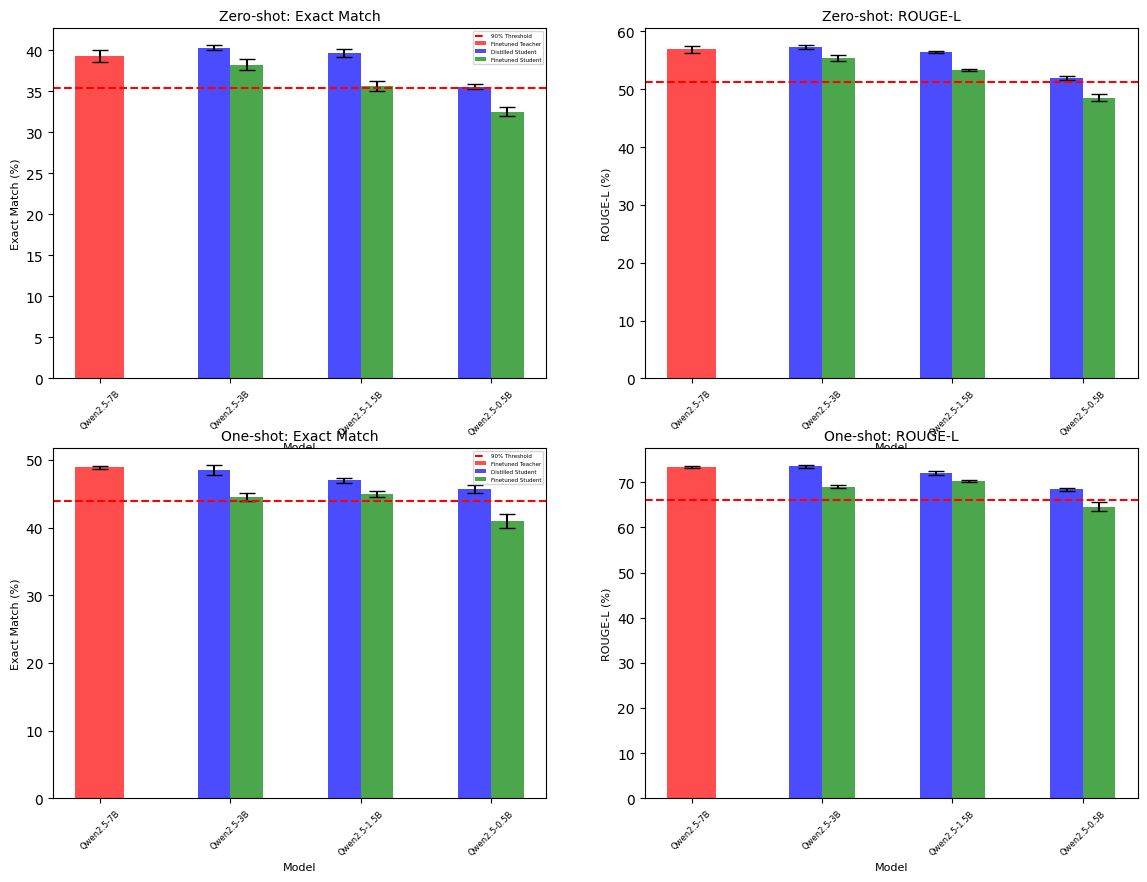

In [12]:
############### Model:Qwen2.5, Dataset:MLQA(en), zero-shot & one-shot dataset evaluation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define a function to add values on top of the bars
def add_bar_labels(ax, x_positions, heights, offset=1):
    for x, h in zip(x_positions, heights):
        ax.text(x, h + offset, f'{h:.2f}', ha='center', fontsize=6)

# Common settings
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models))
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 10))


##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 39.32
teacher_exact_match_std_zero = 0.6985
distilled_exact_match_zero = [40.33, 39.74, 35.59]
distilled_exact_match_std_zero = [0.3141, 0.4904, 0.3294]
finetuned_exact_match_zero = [38.28, 35.697, 32.54]
finetuned_exact_match_std_zero = [0.6651, 0.6202, 0.5461]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 56.92
teacher_rouge_l_std_zero = 0.5867
distilled_rouge_l_zero = [57.28, 56.45, 51.97]
distilled_rouge_l_std_zero = [0.3574, 0.1984, 0.3581]
finetuned_rouge_l_zero = [55.45, 53.35, 48.56]
finetuned_rouge_l_std_zero = [0.5631, 0.1550, 0.6207]

# Plot Exact Match Scores (Zero-shot)
ax1 = plt.subplot(2, 2, 1)
ax1.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax1.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=6)
ax1.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax1.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=6)
ax1.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax1.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_zero, color='r', linestyle='--', label='90% Threshold')
ax1.set_xlabel('Model', fontsize=8)
ax1.set_ylabel('Exact Match (%)', fontsize=8)
ax1.set_title('Zero-shot: Exact Match', fontsize=10)
ax1.set_xticks(np.concatenate([x_teacher, x_students]))
ax1.set_xticklabels(models, rotation=45, fontsize=6)
ax1.legend(loc='upper right', fontsize=4)

# Adding values on top of the bars
#add_bar_labels(ax1, x_teacher, [teacher_exact_match_zero])
#add_bar_labels(ax1, x_students - bar_width/2, distilled_exact_match_zero)
#add_bar_labels(ax1, x_students + bar_width/2, finetuned_exact_match_zero)

# Plot ROUGE-L Scores (Zero-shot)
ax2 = plt.subplot(2, 2, 2)
ax2.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
ax2.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=6)
ax2.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
ax2.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=6)
ax2.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='g', alpha=0.7)
ax2.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_zero, color='r', linestyle='--', label='90% Threshold')
ax2.set_xlabel('Model', fontsize=8)
ax2.set_ylabel('ROUGE-L (%)', fontsize=8)
ax2.set_title('Zero-shot: ROUGE-L', fontsize=10)
ax2.set_xticks(np.concatenate([x_teacher, x_students]))
ax2.set_xticklabels(models, rotation=45, fontsize=6)

# Adding values on top of the bars
#add_bar_labels(ax2, x_teacher, [teacher_rouge_l_zero])
#add_bar_labels(ax2, x_students - bar_width/2, distilled_rouge_l_zero)
#add_bar_labels(ax2, x_students + bar_width/2, finetuned_rouge_l_zero)


##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 48.87
teacher_exact_match_std_one = 0.2815
distilled_exact_match_one = [48.45, 46.97, 45.71]
distilled_exact_match_std_one = [0.7616, 0.3720, 0.5398]
finetuned_exact_match_one = [44.50, 44.94, 40.95]
finetuned_exact_match_std_one = [0.5423, 0.4576, 0.9948]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 73.34
teacher_rouge_l_std_one = 0.3003
distilled_rouge_l_one = [73.47, 72.04, 68.45]
distilled_rouge_l_std_one = [0.2987, 0.4083, 0.3564]
finetuned_rouge_l_one = [69.03, 70.22, 64.60]
finetuned_rouge_l_std_one = [0.4061, 0.2301, 0.91]

# Plot Exact Match Scores (One-shot)
ax3 = plt.subplot(2, 2, 3)
ax3.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax3.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=6)
ax3.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax3.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=6)
ax3.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax3.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_one, color='r', linestyle='--', label='90% Threshold')
ax3.set_xlabel('Model', fontsize=8)
ax3.set_ylabel('Exact Match (%)', fontsize=8)
ax3.set_title('One-shot: Exact Match', fontsize=10)
ax3.set_xticks(np.concatenate([x_teacher, x_students]))
ax3.set_xticklabels(models, rotation=45, fontsize=6)
ax3.legend(loc='upper right', fontsize=4)

# Adding values on top of the bars
#add_bar_labels(ax3, x_teacher, [teacher_exact_match_one])
#add_bar_labels(ax3, x_students - bar_width/2, distilled_exact_match_one)
#add_bar_labels(ax3, x_students + bar_width/2, finetuned_exact_match_one)

# Plot ROUGE-L Scores (One-shot)
ax4 = plt.subplot(2, 2, 4)
ax4.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax4.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=6)
ax4.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax4.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=6)
ax4.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax4.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_one, color='r', linestyle='--', label='90% Threshold')
ax4.set_xlabel('Model', fontsize=8)
ax4.set_ylabel('ROUGE-L (%)', fontsize=8)
ax4.set_title('One-shot: ROUGE-L', fontsize=10)
ax4.set_xticks(np.concatenate([x_teacher, x_students]))
ax4.set_xticklabels(models, rotation=45, fontsize=6)
ax3.legend(loc='upper right', fontsize=4)

# Adding values on top of the bars
#add_bar_labels(ax4, x_teacher, [teacher_rouge_l_one])
#add_bar_labels(ax4, x_students - bar_width/2, distilled_rouge_l_one)
#add_bar_labels(ax4, x_students + bar_width/2, finetuned_rouge_l_one)

#plt.tight_layout()
plt.show()




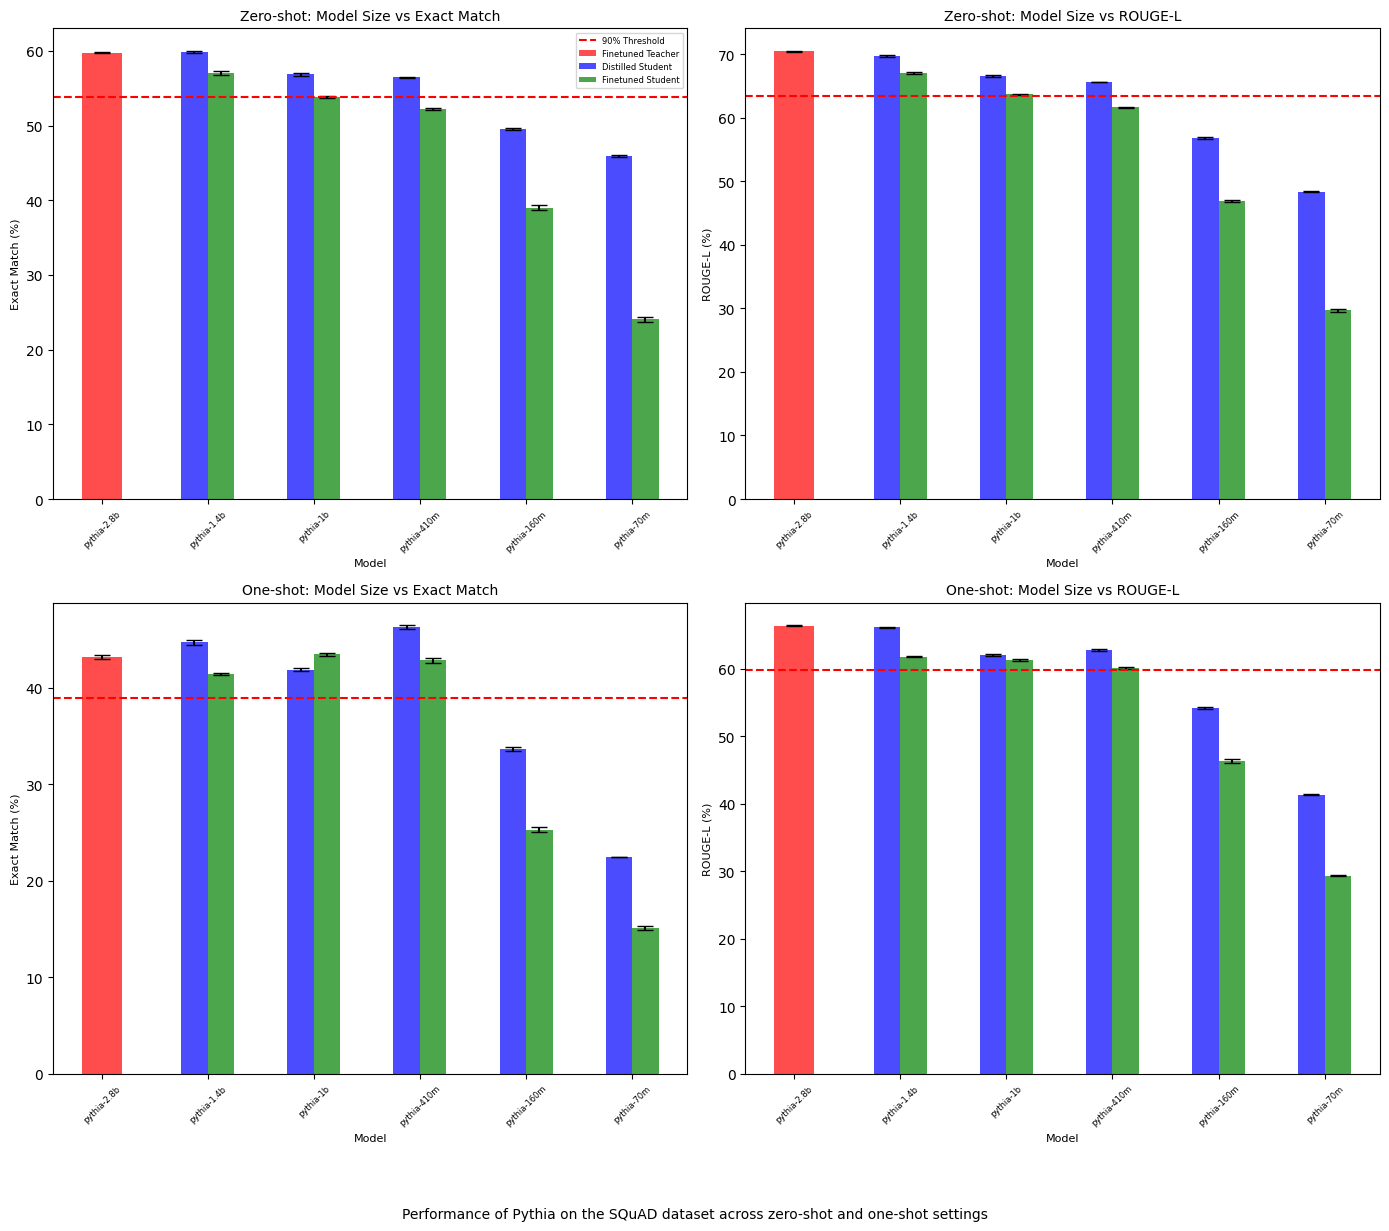

In [11]:
############### Model:Pythia, Dataset:SQuAD, zero-shot & one-shot dataset evaluation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['pythia-2.8b', 'pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 12))

##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 59.78
teacher_exact_match_std_zero = 0.1291
distilled_exact_match_zero = [59.86, 56.87, 56.45, 49.55, 45.94]
distilled_exact_match_std_zero = [0.1559, 0.2301, 0.0852, 0.1134, 0.1148]
finetuned_exact_match_zero = [57.04, 53.84, 52.24, 39.02, 24.07]
finetuned_exact_match_std_zero = [0.2226, 0.1783, 0.1086, 0.2884, 0.3162]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 70.46
teacher_rouge_l_std_zero = 0.0735
distilled_rouge_l_zero = [69.72, 66.52, 65.63, 56.81, 48.38]
distilled_rouge_l_std_zero = [0.1565, 0.1779, 0.0452, 0.1038, 0.0929]
finetuned_rouge_l_zero = [67.09, 63.67, 61.61, 46.91, 29.67]
finetuned_rouge_l_std_zero = [0.1533, 0.1214, 0.1505, 0.1339, 0.2255]

# Plot Exact Match Scores (Zero-shot)
plt.subplot(2, 2, 1)
plt.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_zero, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('Zero-shot: Model Size vs Exact Match', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
plt.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_exact_match_zero + 1, f'{teacher_exact_match_zero:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_exact_match_zero):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_exact_match_zero):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores (Zero-shot)
plt.subplot(2, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='g', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_zero, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('Zero-shot: Model Size vs ROUGE-L', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_rouge_l_zero + 1, f'{teacher_rouge_l_zero:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_rouge_l_zero):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_rouge_l_zero):
#    plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 43.23
teacher_exact_match_std_one = 0.2041
distilled_exact_match_one = [44.70, 41.88, 46.27, 33.65, 22.45]
distilled_exact_match_std_one = [0.2468, 0.1907, 0.2072, 0.1957, 0.0493]
finetuned_exact_match_one = [41.40, 43.45, 42.86, 25.27, 15.10]
finetuned_exact_match_std_one = [0.0918, 0.1451, 0.2561, 0.2427, 0.1755]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 66.36
teacher_rouge_l_std_one = 0.0680
distilled_rouge_l_one = [66.10, 62.0, 62.76, 54.12, 41.34]
distilled_rouge_l_std_one = [0.1354, 0.0974, 0.1570, 0.1647, 0.1258]
finetuned_rouge_l_one = [61.77, 61.25, 60.09, 46.31, 29.32]
finetuned_rouge_l_std_one = [0.0768, 0.1076, 0.1104, 0.3520, 0.1215]

# Plot Exact Match Scores (One-shot)
plt.subplot(2, 2, 3)
plt.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='g', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_one, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('One-shot: Model Size vs Exact Match', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_exact_match_one + 1, f'{teacher_exact_match_one:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_exact_match_one):
#    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_exact_match_one):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores (One-shot)
plt.subplot(2, 2, 4)
plt.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='g', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_one, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('One-shot: Model Size vs ROUGE-L', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_rouge_l_one + 1, f'{teacher_rouge_l_one:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_rouge_l_one):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_rouge_l_one):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)
 
plt.figtext(0.5, -0.02, "Performance of Pythia on the SQuAD dataset across zero-shot and one-shot settings", 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Add padding at the bottom

#plt.tight_layout()
plt.show()

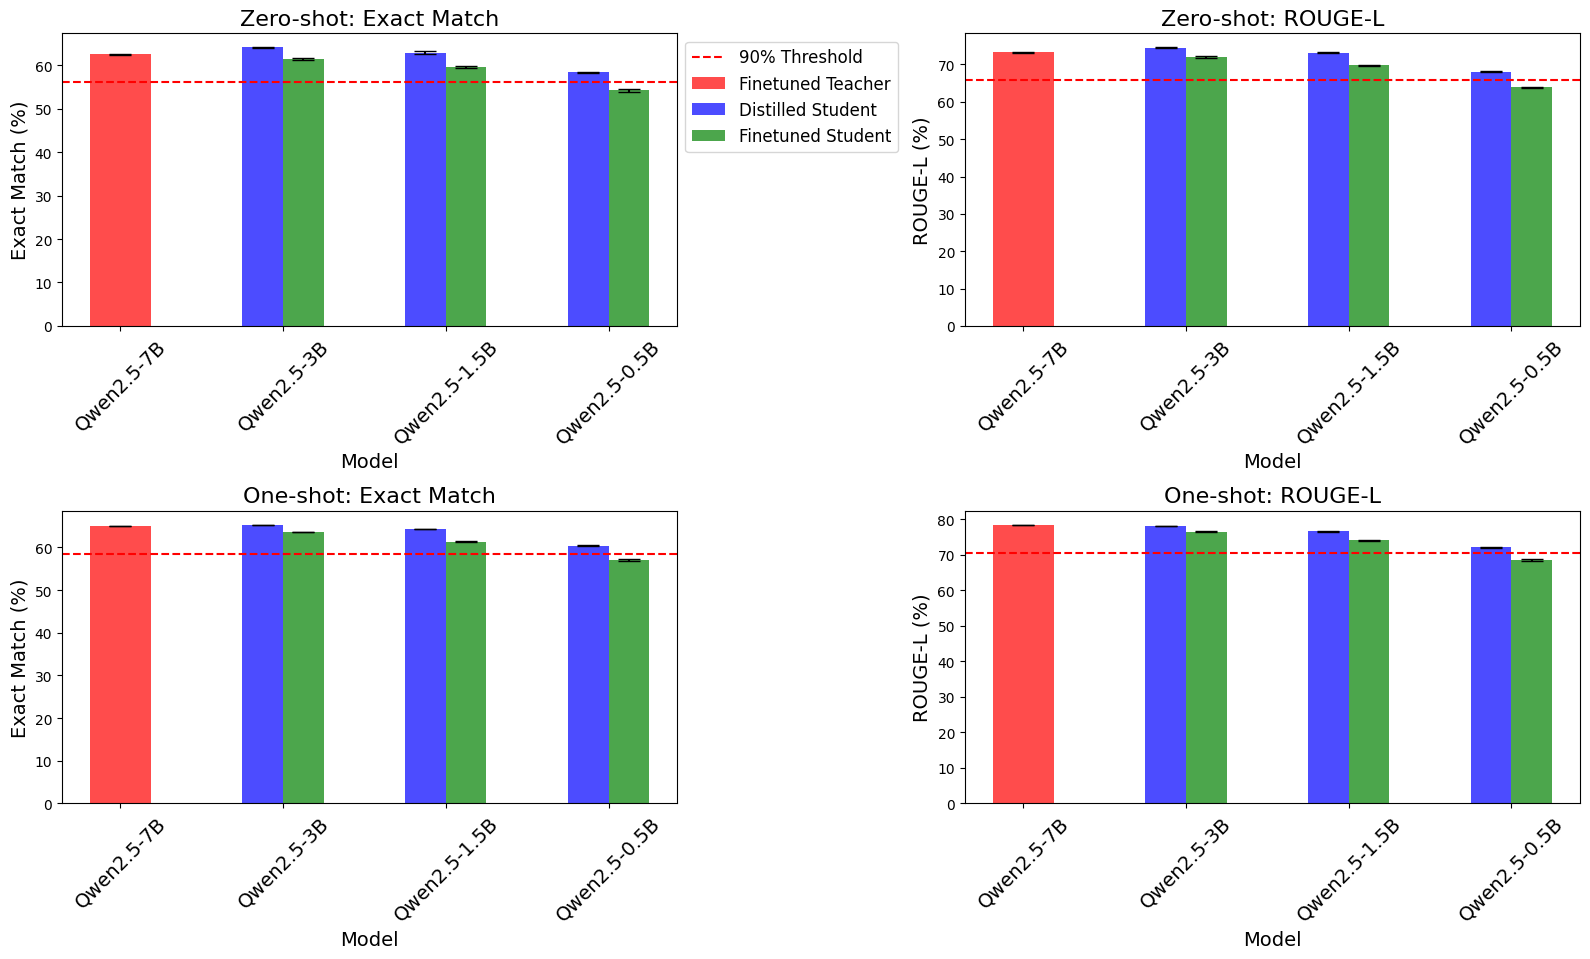

In [6]:
############### Model:Qwen2.5, Dataset:SQuAD, zero-shot & one-shot dataset evaluation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define a function to add values on top of the bars
def add_bar_labels(ax, x_positions, heights, offset=1):
    for x, h in zip(x_positions, heights):
        ax.text(x, h + offset, f'{h:.2f}', ha='center', fontsize=6)

# Common settings
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models))
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(16, 10))

##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 62.51
teacher_exact_match_std_zero = 0.17
distilled_exact_match_zero = [64.09, 62.92, 58.38]
distilled_exact_match_std_zero = [0.05, 0.27, 0.14]
finetuned_exact_match_zero = [61.45, 59.52, 54.21]
finetuned_exact_match_std_zero = [0.19, 0.26, 0.26]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 73.29
teacher_rouge_l_std_zero = 0.17
distilled_rouge_l_zero = [74.50, 73.14, 68.03]
distilled_rouge_l_std_zero = [0.098, 0.14, 0.13]
finetuned_rouge_l_zero = [72.04, 69.76, 63.90]
finetuned_rouge_l_std_zero = [0.19, 0.17, 0.11]

# Plot Exact Match Scores (Zero-shot)
ax1 = plt.subplot(2, 2, 1)
ax1.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax1.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=8)
ax1.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax1.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=8)
ax1.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax1.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=8)
plt.axhline(y=0.9 * teacher_exact_match_zero, color='r', linestyle='--', label='90% Threshold')
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Exact Match (%)', fontsize=14)
ax1.set_title('Zero-shot: Exact Match', fontsize=16)
ax1.set_xticks(np.concatenate([x_teacher, x_students]))
ax1.set_xticklabels(models, rotation=45, fontsize=14)
#ax1.legend(loc='upper right', fontsize=7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adding values on top of the bars
#add_bar_labels(ax1, x_teacher, [teacher_exact_match_zero])
#add_bar_labels(ax1, x_students - bar_width/2, distilled_exact_match_zero)
#add_bar_labels(ax1, x_students + bar_width/2, finetuned_exact_match_zero)

# Plot ROUGE-L Scores (Zero-shot)
ax2 = plt.subplot(2, 2, 2)
ax2.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
ax2.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=8)
ax2.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
ax2.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=8)
ax2.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='g', alpha=0.7)
ax2.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=8)
plt.axhline(y=0.9 * teacher_rouge_l_zero, color='r', linestyle='--', label='90% Threshold')
ax2.set_xlabel('Model', fontsize=14)
ax2.set_ylabel('ROUGE-L (%)', fontsize=14)
ax2.set_title('Zero-shot: ROUGE-L', fontsize=16)
ax2.set_xticks(np.concatenate([x_teacher, x_students]))
ax2.set_xticklabels(models, rotation=45, fontsize=14)

# Adding values on top of the bars
#add_bar_labels(ax2, x_teacher, [teacher_rouge_l_zero])
#add_bar_labels(ax2, x_students - bar_width/2, distilled_rouge_l_zero)
#add_bar_labels(ax2, x_students + bar_width/2, finetuned_rouge_l_zero)

##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 65.03
teacher_exact_match_std_one = 0.05
distilled_exact_match_one = [65.23, 64.28, 60.43]
distilled_exact_match_std_one = [0.08, 0.04, 0.10]
finetuned_exact_match_one = [63.61, 61.35, 57.00]
finetuned_exact_match_std_one = [0.10, 0.13, 0.26]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 78.37
teacher_rouge_l_std_one = 0.09
distilled_rouge_l_one = [78.05, 76.61, 72.14]
distilled_rouge_l_std_one = [0.07, 0.07, 0.09]
finetuned_rouge_l_one = [76.56, 74.14, 68.53]
finetuned_rouge_l_std_one = [0.06, 0.12, 0.23]

# Plot Exact Match Scores (One-shot)
ax3 = plt.subplot(2, 2, 3)
ax3.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7)
ax3.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=8)
ax3.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='b', alpha=0.7)
ax3.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=8)
ax3.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='g', alpha=0.7)
ax3.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=8)
plt.axhline(y=0.9 * teacher_exact_match_one, color='r', linestyle='--', label='90% Threshold')
ax3.set_xlabel('Model', fontsize=14)
ax3.set_ylabel('Exact Match (%)', fontsize=14)
ax3.set_title('One-shot: Exact Match', fontsize=16)
ax3.set_xticks(np.concatenate([x_teacher, x_students]))
ax3.set_xticklabels(models, rotation=45, fontsize=14)

# Adding values on top of the bars
#add_bar_labels(ax3, x_teacher, [teacher_exact_match_one])
#add_bar_labels(ax3, x_students - bar_width/2, distilled_exact_match_one)
#add_bar_labels(ax3, x_students + bar_width/2, finetuned_exact_match_one)

# Plot ROUGE-L Scores (One-shot)
ax4 = plt.subplot(2, 2, 4)
ax4.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7)
ax4.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=8)
ax4.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='b', alpha=0.7)
ax4.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=8)
ax4.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='g', alpha=0.7)
ax4.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=8)
plt.axhline(y=0.9 * teacher_rouge_l_one, color='r', linestyle='--', label='90% Threshold')
ax4.set_xlabel('Model', fontsize=14)
ax4.set_ylabel('ROUGE-L (%)', fontsize=14)
ax4.set_title('One-shot: ROUGE-L', fontsize=16)
ax4.set_xticks(np.concatenate([x_teacher, x_students]))
ax4.set_xticklabels(models, rotation=45, fontsize=14)

# Adding values on top of the bars
#add_bar_labels(ax4, x_teacher, [teacher_rouge_l_one])
#add_bar_labels(ax4, x_students - bar_width/2, distilled_rouge_l_one)
#add_bar_labels(ax4, x_students + bar_width/2, finetuned_rouge_l_one)

#plt.figtext(0.5, -0.02, "Performance of Qwen2.5 on the SQuAD dataset across zero-shot and one-shot settings", 
#            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Add padding at the bottom

#plt.tight_layout()
plt.show()

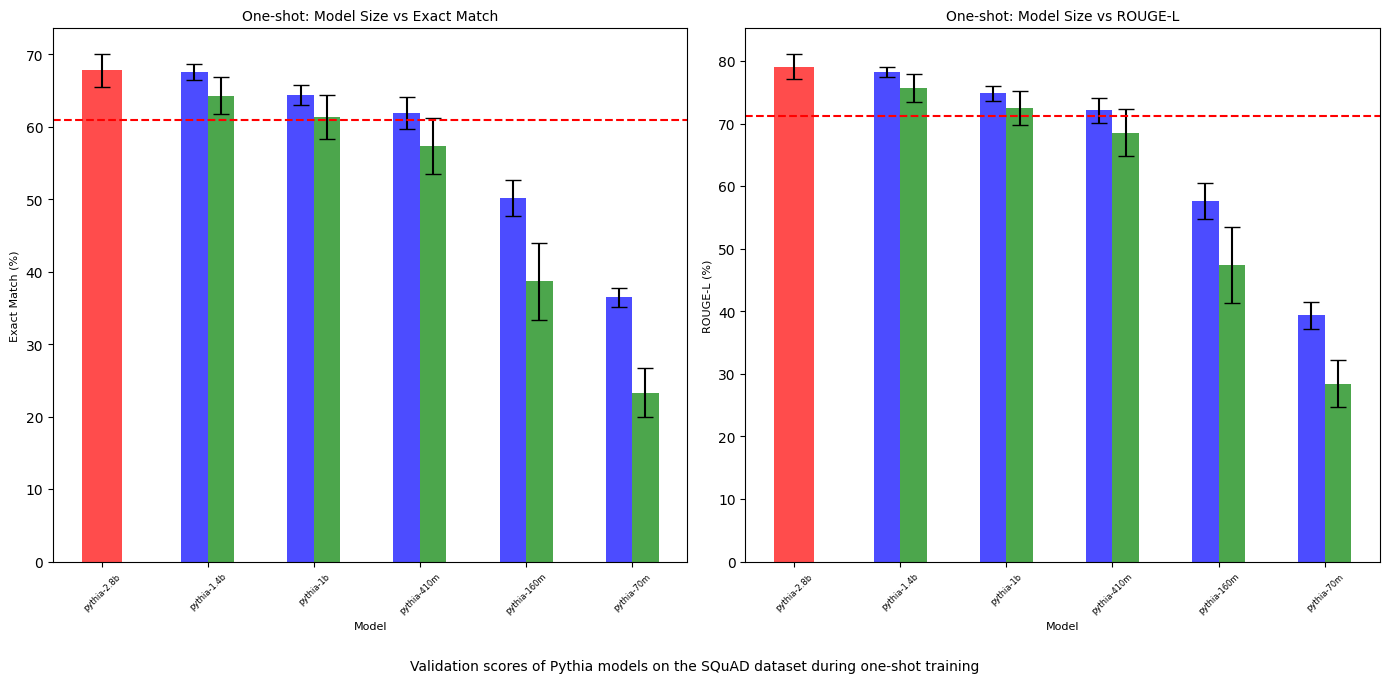

In [12]:
############### Model:Pythia, Dataset:SQuAD, one-shot dataset validation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['pythia-2.8b', 'pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 12))

##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 67.76
teacher_exact_match_std_one = 2.30
distilled_exact_match_one = [67.49, 64.38, 61.93, 50.12, 36.46]
distilled_exact_match_std_one = [1.11, 1.39, 2.18, 2.50, 1.30]
finetuned_exact_match_one = [64.30, 61.36, 57.35, 38.70, 23.29]
finetuned_exact_match_std_one = [2.60, 3.01, 3.86, 5.32, 3.36]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 79.11
teacher_rouge_l_std_one = 2.03
distilled_rouge_l_one = [78.20, 74.87, 72.09, 57.65, 39.36]
distilled_rouge_l_std_one = [0.80, 1.20, 1.96, 2.89, 2.19]
finetuned_rouge_l_one = [75.65, 72.44, 68.54, 47.42, 28.40]
finetuned_rouge_l_std_one = [2.29, 2.69, 3.81, 6.07, 3.73]

# Plot Exact Match Scores (One-shot)
plt.subplot(2, 2, 3)
plt.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='g', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_one, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('One-shot: Model Size vs Exact Match', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_exact_match_one + 1, f'{teacher_exact_match_one:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_exact_match_one):
#    plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_exact_match_one):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores (One-shot)
plt.subplot(2, 2, 4)
plt.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='g', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_one, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('One-shot: Model Size vs ROUGE-L', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=6)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_rouge_l_one + 1, f'{teacher_rouge_l_one:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_rouge_l_one):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_rouge_l_one):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)
 
plt.figtext(0.5, -0.02, "Validation scores of Pythia models on the SQuAD dataset during one-shot training", 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Add padding at the bottom

plt.tight_layout()
plt.show()

In [ ]:
finetuned:
'pythia-2.8b'=(Exact Match Mean: 67.76, Standard Deviation: 2.30
              Rouge-L Mean: 79.11, Standard Deviation: 2.03)

'pythia-1.4b'=(Exact Match Mean: 64.30, Standard Deviation: 2.60
               Rouge-L Mean: 75.65, Standard Deviation: 2.29)

'pythia-1b'=(Exact Match Mean: 61.36, Standard Deviation: 3.01
             Rouge-L Mean: 72.44, Standard Deviation: 2.69)

'pythia-410m'=(Exact Match Mean: 57.35, Standard Deviation: 3.86
               Rouge-L Mean: 68.54, Standard Deviation: 3.81)

'pythia-160m'=(Exact Match Mean: 38.70, Standard Deviation: 5.32
               Rouge-L Mean: 47.42, Standard Deviation: 6.07)

'pythia-70m'=(Exact Match Mean: 23.29, Standard Deviation: 3.36
              Rouge-L Mean: 28.40, Standard Deviation: 3.73)

Distilled:
'pythia-1.4b'=(Exact Match Mean: 67.49, Standard Deviation: 1.11
               Rouge-L Mean: 78.20, Standard Deviation: 0.80)

'pythia-1b'=(Exact Match Mean: 64.38, Standard Deviation: 1.39
            Rouge-L Mean: 74.87, Standard Deviation: 1.20)

'pythia-410m'=(Exact Match Mean: 61.93, Standard Deviation: 2.18
               Rouge-L Mean: 72.09, Standard Deviation: 1.96)

'pythia-160m'=(Exact Match Mean: 50.12, Standard Deviation: 2.50
               Rouge-L Mean: 57.65, Standard Deviation: 2.89)

'pythia-70m'=(Exact Match Mean: 36.46, Standard Deviation: 1.30
               Rouge-L Mean: 39.36, Standard Deviation: 2.19)


In [8]:
from datasets import load_dataset

dataset_rc = load_dataset("mandarjoshi/trivia_qa", "rc.nocontext")

# Inspect the first sample to see the available keys
sample = dataset_rc['train'][0]

# Print out the keys of the sample
print(f"Available keys in the sample: {sample.keys()}")

# Now that you have the keys, inspect the elements for each key
for key, value in sample.items():
    print(f"{key}: {value}\n")


Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Available keys in the sample: dict_keys(['question', 'question_id', 'question_source', 'entity_pages', 'search_results', 'answer'])
question: Which American-born Sinclair won the Nobel Prize for Literature in 1930?

question_id: tc_1

question_source: http://www.triviacountry.com/

entity_pages: {'doc_source': [], 'filename': [], 'title': [], 'wiki_context': []}

search_results: {'description': [], 'filename': [], 'rank': [], 'title': [], 'url': [], 'search_context': []}

answer: {'aliases': ['(Harry) Sinclair Lewis', 'Harry Sinclair Lewis', 'Lewis, (Harry) Sinclair', 'Grace Hegger', 'Sinclair Lewis'], 'normalized_aliases': ['grace hegger', 'lewis harry sinclair', 'harry sinclair lewis', 'sinclair lewis'], 'matched_wiki_entity_name': '', 'normalized_matched_wiki_entity_name': '', 'normalized_value': 'sinclair lewis', 'type': 'WikipediaEntity', 'value': 'Sinclair Lewis'}



In [2]:
from datasets import load_dataset

# Load the 'rc' split of TriviaQA from Hugging Face
dataset_rc = load_dataset("mandarjoshi/trivia_qa", "rc")

# Select a sample from the 'rc' split
sample = dataset_rc['train'][0]  

question = sample["question"]
answer = sample["answer"]["value"]

context = ' '.join(sample['search_results']['description']) if 'description' in sample['search_results'] else 'No context available'

# Combine question and context as raw input
raw_input = f"Question: {question} Context: {context}"

# Display the extracted data
print(f"Question: {question}")
print(f"Context: {context}")
print(f"Answer: {answer}")

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/24 [00:00<?, ?it/s]

Question: Which American-born Sinclair won the Nobel Prize for Literature in 1930?
Context: The Nobel Prize in Literature 1930 Sinclair ... The Nobel Prize in Literature 1930 was awarded to ... nobelprize.org/nobel_prizes/literature/laureates/1930/> Why Don’t More Americans Win the Nobel Prize? By . ... When the Nobel Prize in Literature was awarded to Sinclair ... In 1930, Lewis told his Nobel audience that ... ... Sauk Centre native Sinclair Lewis became the first American to be awarded a Nobel Prize for Literature. ... in 1930, Sauk Centre native Sinclair Lewis became the ... Sinclair Lewis - Nobel Prize in Literature, 1930 (20 books) Type ... Literature Fiction Classics Short Stories Essays American literature Nobel Prize Uploaded: 2015 ... The Nobel Prize in Literature 1930 Sinclair Lewis. ... as janitor of Upton Sinclair's abortive co ... nobelprize.org/nobel_prizes/literature/laureates/1930/lewis ... Sinclair Lewis Becomes the First American to be Awarded the Nobel Prize for Lit

In [9]:
################# trivia_qa (rc) #####################

import json
from datasets import load_dataset
import os

dataset = load_dataset("mandarjoshi/trivia_qa", "rc")

# Function to extract the necessary fields from a sample
def extract_fields(sample):
    question = sample.get('question', '')
    question_id = sample.get('question_id', '')
    # Join all search results descriptions into one string
    description = ' '.join(sample['search_results'].get('description', [])) if 'search_results' in sample else 'No description available'
    # Get the main answer value
    answer = sample['answer'].get('value', '') if 'answer' in sample else 'No answer available'
    
    return {
        'question_id': question_id,
        'question': question,
        'description': description,
        'answer': answer
    }

# Function to save dataset to JSONL file
def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for sample in split:
            extracted_data = extract_fields(sample)
            f.write(json.dumps(extracted_data) + '\n')

save_directory = '/home/IAIS/jdatta/distillm-new/data/trivia_qa/rc'  

os.makedirs(save_directory, exist_ok=True)

save_to_jsonl(dataset['train'], os.path.join(save_directory, 'train.jsonl'))
save_to_jsonl(dataset['validation'], os.path.join(save_directory, 'validation.jsonl'))
save_to_jsonl(dataset['test'], os.path.join(save_directory, 'test.jsonl'))

print(f"Data saved successfully to {save_directory}.")


Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/24 [00:00<?, ?it/s]

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/trivia_qa/rc.


In [8]:
######################## trivi_qa (rc_nocontext) ####################

import json
from datasets import load_dataset
import os

dataset = load_dataset("mandarjoshi/trivia_qa", "rc.nocontext")

def extract_fields_nocontext(sample):
    question = sample.get('question', '')
    question_id = sample.get('question_id', '')
    answer = sample['answer'].get('value', '') if 'answer' in sample else 'No answer available'
    
    # Create a dictionary for each entry
    return {
        'question_id': question_id,
        'question': question,
        'answer': answer
    }

# Function to save dataset to JSONL file
def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for sample in split:
            extracted_data = extract_fields_nocontext(sample)
            f.write(json.dumps(extracted_data) + '\n')

# Set the directory where you want to save the files
save_directory = '/home/IAIS/jdatta/distillm-new/data/trivia_qa/rc_nocontext' 

# Ensure the directory exists, if not, create it
os.makedirs(save_directory, exist_ok=True)

# Save the train, validation, and test splits
save_to_jsonl(dataset['train'], os.path.join(save_directory, 'train.jsonl'))
save_to_jsonl(dataset['validation'], os.path.join(save_directory, 'validation.jsonl'))
save_to_jsonl(dataset['test'], os.path.join(save_directory, 'test.jsonl'))

print(f"Data saved successfully to {save_directory}.")

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/trivia_qa/rc_nocontext.


In [3]:
################### trivia_qa: rc & rc_nocontext comparison ########################

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

examples_with_context = [
    {
        "question_id": "tc_1",
        "description": "The Nobel Prize in Literature 1930 Sinclair ... The Nobel Prize in Literature 1930 was awarded to ... nobelprize.org/nobel_prizes/literature/laureates/1930/> Why Don\u2019t More Americans Win the Nobel Prize? By . ... When the Nobel Prize in Literature was awarded to Sinclair ... In 1930, Lewis told his Nobel audience that ... ... Sauk Centre native Sinclair Lewis became the first American to be awarded a Nobel Prize for Literature. ... in 1930, Sauk Centre native Sinclair Lewis became the ... Sinclair Lewis - Nobel Prize in Literature, 1930 (20 books) Type ... Literature Fiction Classics Short Stories Essays American literature Nobel Prize Uploaded: 2015 ... The Nobel Prize in Literature 1930 Sinclair Lewis. ... as janitor of Upton Sinclair's abortive co ... nobelprize.org/nobel_prizes/literature/laureates/1930/lewis ... Sinclair Lewis Becomes the First American to be Awarded the Nobel Prize for Literature. ... In 1930, Lewis won the Nobel Prize in Literature, ... 1930, Sinclair Lewis ... Download Sinclair Lewis - Nobel Prize in Literature, 1930 ... Sinclair Lewis - Nobel Prize in Literature, 1930 (20 books) seeders: 4. leechers: 3. Download torrent.",
        "question": "Which American-born Sinclair won the Nobel Prize for Literature in 1930?",
        "answer": "Sinclair Lewis"
    },
    {
        "question_id": "tc_5",
        "description": "Song chart US Billboard. The Billboard magazine has published various music charts starting ... the first \"Music Hit Parade\" was published in 1936, ... Decade: Number ... The first British singles chart was published in the November 14, ... The Billboard Charts started in 1940, ... The results are published in Billboard magazine.",
        "question": "In which decade did Billboard magazine first publish and American hit chart?",
        "answer": "30s"
    },
    {
        "question_id": "tc_3",
        "description": "Judi Dench, Actress: Skyfall. Judi Dench was born in York, ... Judi Dench was born in York, England, to Eleanora Olive ... 2011 My Week with Marilyn Dame Sybil Thorndike. A short biography of Dame Judi Dench. Born and schooled in York England. A short biography of Dame Judi Dench. The York England born star ... Dame Judi created the ... Dame Judi Dench, original name in full Judith Olivia Dench (born December 9, 1934, York, North Yorkshire, England) ... Judi Dench biography, ... credits,quotes and more... Judi Dench was born on 9th December, 1934, in York, England. After gra... Search. Shows; News ... Dame Judi, aged ... Born: 12/09/1934 in York, England, GB. Jump to. Related Articles. ... Dame Judi Dench spent much of her career concentrating on stage and ... Met Judi's mother while ... Judi Dench was born in York, England, to Eleanora Olive ... Judi is the proud owner of a racehorse ... was named Dame Judi Dench Walk in honour of the city being ...",
        "question": "Where in England was Dame Judi Dench born?",
        "answer": "York"
    }
    
]

examples_without_context = [
    {
        "question_id": "tc_1",
        "question": "Which American-born Sinclair won the Nobel Prize for Literature in 1930?",
        "answer": "Sinclair Lewis"
    },
    {
        "question_id": "tc_3",
        "question": "Where in England was Dame Judi Dench born?",
        "answer": "York"
    },
    {
        "question_id": "tc_5",
        "question": "In which decade did Billboard magazine first publish and American hit chart?",
        "answer": "30s"
    }
    
]

def prepare_input(sample, with_context=True):
    if with_context:
        return (
            "Please provide a concise answer to the question based on the context below.\n\n"
            f"Context:\n{sample['description']}\n\n"
            f"Question:\n{sample['question']}\n"
            "Answer:"
        )
    else:
        return (
            "Please provide a concise answer to the question below.\n\n"
            f"Question:\n{sample['question']}\n"
            "Answer:"
        )

model_name = 'EleutherAI/pythia-2.8b'  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def generate_output(model, tokenizer, input_text, max_new_tokens=30):
    inputs = tokenizer(input_text, return_tensors='pt').to(device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        pad_token_id=tokenizer.eos_token_id,
        eos_token_id=tokenizer.eos_token_id,
        early_stopping=True
    )
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    answer = generated_text[len(input_text):].strip()
    return answer

# Generate outputs with context
outputs_with_context = []
for sample in examples_with_context:
    input_text = prepare_input(sample, with_context=True)
    output = generate_output(model, tokenizer, input_text)
    outputs_with_context.append({
        'input_text': input_text,
        'model_output': output,
        'reference_answer': sample['answer']
    })

# Generate outputs without context
outputs_without_context = []
for sample in examples_without_context:
    input_text = prepare_input(sample, with_context=False)
    output = generate_output(model, tokenizer, input_text)
    outputs_without_context.append({
        'input_text': input_text,
        'model_output': output,
        'reference_answer': sample['answer']
    })

# Display the results
print("Outputs with Context:\n")
for result in outputs_with_context:
    print(f"Input Text:\n{result['input_text']}\n")
    print(f"Model Output:\n{result['model_output']}\n")
    print(f"Reference Answer:\n{result['reference_answer']}\n")
    print("-" * 80)

print("\nOutputs without Context:\n")
for result in outputs_without_context:
    print(f"Input Text:\n{result['input_text']}\n")
    print(f"Model Output:\n{result['model_output']}\n")
    print(f"Reference Answer:\n{result['reference_answer']}\n")
    print("-" * 80)


Outputs with Context:

Input Text:
Please provide a concise answer to the question based on the context below.

Context:
The Nobel Prize in Literature 1930 Sinclair ... The Nobel Prize in Literature 1930 was awarded to ... nobelprize.org/nobel_prizes/literature/laureates/1930/> Why Don’t More Americans Win the Nobel Prize? By . ... When the Nobel Prize in Literature was awarded to Sinclair ... In 1930, Lewis told his Nobel audience that ... ... Sauk Centre native Sinclair Lewis became the first American to be awarded a Nobel Prize for Literature. ... in 1930, Sauk Centre native Sinclair Lewis became the ... Sinclair Lewis - Nobel Prize in Literature, 1930 (20 books) Type ... Literature Fiction Classics Short Stories Essays American literature Nobel Prize Uploaded: 2015 ... The Nobel Prize in Literature 1930 Sinclair Lewis. ... as janitor of Upton Sinclair's abortive co ... nobelprize.org/nobel_prizes/literature/laureates/1930/lewis ... Sinclair Lewis Becomes the First American to be Aw

In [2]:
from datasets import load_dataset

dataset_info = load_dataset("facebook/mlqa", "mlqa.de.de")
sample = dataset_info['test'][0]

# Print the available splits
print(dataset_info, sample)

DatasetDict({
    test: Dataset({
        features: ['context', 'question', 'answers', 'id'],
        num_rows: 11590
    })
    validation: Dataset({
        features: ['context', 'question', 'answers', 'id'],
        num_rows: 1148
    })
}) {'context': 'In 1994, five unnamed civilian contractors and the widows of contractors Walter Kasza and Robert Frost sued the USAF and the United States Environmental Protection Agency. Their suit, in which they were represented by George Washington University law professor Jonathan Turley, alleged they had been present when large quantities of unknown chemicals had been burned in open pits and trenches at Groom. Biopsies taken from the complainants were analyzed by Rutgers University biochemists, who found high levels of dioxin, dibenzofuran, and trichloroethylene in their body fat. The complainants alleged they had sustained skin, liver, and respiratory injuries due to their work at Groom, and that this had contributed to the deaths of Frost and

In [4]:
import json
from datasets import load_dataset
import os

dataset = load_dataset("facebook/mlqa", "mlqa.en.en")

def extract_fields(data):
    id = data.get('id', '')
    context = data.get('context', '')
    question = data.get('question', '')
    #prompt = f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"
    answers = data.get('answers', {}).get('text', [])
    #answers = data.get('answers', '')
    
    if answers:
        answer = answers[0]
    else:
        answer = "No answer available."
        
    return {
        #"instruction": "Please answer the following question based on the given context.",
        #'prompt': prompt,
        'id': id,
        'context': context,
        'question': question,
        'answer': answer
    }  
    

def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for data in split:
            extracted_data = extract_fields(data)
            f.write(json.dumps(extracted_data) + '\n')
            
save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa/english' 
os.makedirs(save_directory, exist_ok=True)

save_to_jsonl(dataset['test'], os.path.join(save_directory, 'train.jsonl'))
save_to_jsonl(dataset['validation'], os.path.join(save_directory, 'valid.jsonl'))

print(f"Data saved successfully to {save_directory}.")

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/mlqa/english.


In [1]:
import json
from datasets import load_dataset
import os

dataset = load_dataset("facebook/mlqa", "mlqa.de.de")

def extract_fields(data):
    id = data.get('id', '')
    context = data.get('context', '')
    question = data.get('question', '')
    #prompt = f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"
    answers = data.get('answers', {}).get('text', [])
    
    if answers:
        answer = answers[0]
    else:
        answer = "No answer available."
        
    return {
        #"instruction": "Please answer the following question based on the given context.",
        #'prompt': prompt,
        #'answer': answer
        'id': id,
        'context': context,
        'question': question,
        'answer': answer
    }  
    

def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for data in split:
            extracted_data = extract_fields(data)
            f.write(json.dumps(extracted_data) + '\n')
            
save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa/deutsch' 
os.makedirs(save_directory, exist_ok=True)

save_to_jsonl(dataset['test'], os.path.join(save_directory, 'train.jsonl'))
save_to_jsonl(dataset['validation'], os.path.join(save_directory, 'valid.jsonl'))

print(f"Data saved successfully to {save_directory}.")

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/mlqa/deutsch.


In [4]:
########################## Formatting validation data ###########################

import json
from datasets import load_dataset
import os

#dataset = load_dataset("facebook/mlqa", "mlqa.en.en")
#dataset = load_dataset("facebook/mlqa", "mlqa.de.de")
dataset = load_dataset("rajpurkar/squad_v2")

def extract_fields(data):
    id = data.get('id', '')
    context = data.get('context', '')
    question = data.get('question', '')
    #prompt = f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"
    answers = data.get('answers', {}).get('text', [])
    #answers = data.get('answers', '')

    
    if answers:
        answer = answers[0]
    else:
        answer = "No answer available."
    
    #prompt = f"<|im_start|>Context: {context}\n\nQuestion: {question}\n\nAnswer:<|im_end|>"
    prompt = f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"
        
    return {
        'id': id,
        'prompt': prompt,
        #'context': context,
        #'question': question,
        'output': answer
    }  
    

def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for data in split:
            extracted_data = extract_fields(data)
            f.write(json.dumps(extracted_data) + '\n')
            
#save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa/english' 
#save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa/deutsch' 
save_directory = '/home/IAIS/jdatta/distillm-new/data/squad_json' 
#save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot/english'
#save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/english' 
#save_directory = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/deutsch' 
#save_directory = '/home/IAIS/jdatta/distillm-new/data/squad_1shot' 
#save_directory = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2' 
os.makedirs(save_directory, exist_ok=True)

save_to_jsonl(dataset['validation'], os.path.join(save_directory, 'eval.jsonl'))

print(f"Data saved successfully to {save_directory}.")

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/squad_json.


In [1]:
######################## trivi_qa (rc_nocontext) ####################

import json
from datasets import load_dataset
import os

dataset = load_dataset("mandarjoshi/trivia_qa", "rc.nocontext")

def extract_fields_nocontext(sample):
    question = sample.get('question', '')
    question_id = sample.get('question_id', '')
    answer = sample['answer'].get('value', '') if 'answer' in sample else 'No answer available'
    
    prompt = f"Question: {question}\n\nAnswer:"
    
    # Create a dictionary for each entry
    return {
        'question_id': question_id,
        'prompt': prompt,
        'output': answer
    }
# Function to save dataset to JSONL file
def save_to_jsonl(split, filename):
    with open(filename, 'w') as f:
        for sample in split:
            extracted_data = extract_fields_nocontext(sample)
            f.write(json.dumps(extracted_data) + '\n')

# Set the directory where you want to save the files
save_directory = '/home/IAIS/jdatta/distillm-new/data/trivia_qa/rc_nocontext' 

# Ensure the directory exists, if not, create it
os.makedirs(save_directory, exist_ok=True)

# Save the train, validation, and test splits
save_to_jsonl(dataset['test'], os.path.join(save_directory, 'valid.jsonl'))

print(f"Data saved successfully to {save_directory}.")

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Data saved successfully to /home/IAIS/jdatta/distillm-new/data/trivia_qa/rc_nocontext.


In [14]:
################### exact_match & rougel-score calculation #####################

import numpy as np

exact_match_scores = [58.553, 58.4435, 58.3677, 58.3593, 58.1572]
rouge_l_scores = [68.0593, 68.1879, 67.9516, 68.0939,  67.8607]
exact_match_array = np.array(exact_match_scores)
rouge_l_array = np.array(rouge_l_scores)

exact_match_mean = exact_match_array.mean()
exact_match_std = exact_match_array.std(ddof=1)

rouge_l_mean = rouge_l_array.mean()
rouge_l_std = rouge_l_array.std(ddof=1)

# Display the results
print(f"Exact Match Mean: {exact_match_mean:.4f}, Standard Deviation: {exact_match_std:.4f}")
print(f"Rouge-L Mean: {rouge_l_mean:.4f}, Standard Deviation: {rouge_l_std:.4f}")


Exact Match Mean: 58.3761, Standard Deviation: 0.1450
Rouge-L Mean: 68.0307, Standard Deviation: 0.1272


In [20]:
################################ Few-shot Learning Dataset #############################

import random
import json

#dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/train.jsonl' 
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/mlqa/english/valid.jsonl'
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/english/valid.jsonl'
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/deutsch/valid.jsonl'
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/valid.jsonl'
dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl'

with open(dataset_path, 'r') as file:
    data = [json.loads(line) for line in file]

few_shot_examples = random.sample(data, 100) 

#output_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/random_samples.jsonl' 
output_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval_random_samples.jsonl'
with open(output_path, 'w') as file:
    for example in few_shot_examples:
        file.write(json.dumps(example) + '\n')


In [21]:
####################### creating few-shot templates ############################

import random
import json

# Load the sampled few-shot examples
#sampled_examples_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/random_samples.jsonl'
#sampled_examples_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot/english/eval_random_samples.jsonl' 
#sampled_examples_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/english/eval_random_samples.jsonl' 
#sampled_examples_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/deutsch/eval_random_samples.jsonl' 
sampled_examples_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval_random_samples.jsonl' 

with open(sampled_examples_path, 'r') as file:
    sampled_examples = [json.loads(line) for line in file]

num_templates = 100
examples_per_template = 1 

few_shot_templates = []
for _ in range(num_templates):
    selected_examples = random.sample(sampled_examples, examples_per_template)
    
    # Format the selected examples as a single prompt template
    template_prompt = ""
    for i, example in enumerate(selected_examples, start=1):
        template_prompt += f"{i}:\n{example['prompt']}\nAnswer: {example['output']}\n\n"
    
    # Append placeholders for the current instance's context and question
    template_prompt += "Current:\nContext: [Your main context here]\nQuestion: [Your main question here]\nAnswer:"
    
    # Store the template
    few_shot_templates.append(template_prompt)

# Save the templates if needed
#templates_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/one_shot_templates.jsonl' 
#templates_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot/english/eval_shot_templates.jsonl'
#templates_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/english/eval_1shot_templates.jsonl'
#templates_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/deutsch/eval_1shot_templates.jsonl'
templates_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval_1shot_templates.jsonl'

with open(templates_path, 'w') as file:
    for template in few_shot_templates:
        file.write(json.dumps({"template": template}) + '\n')

In [5]:
import random
from transformers import AutoTokenizer
import json

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")

# Load the main dataset (jsonl format)
dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/train.jsonl'
with open(dataset_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Load the few-shot templates and extract questions to skip
sampled_templates_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/one_shot_templates.jsonl'
with open(sampled_templates_path, 'r') as file:
    sampled_templates = [json.loads(line) for line in file]

# Extract questions from the few-shot templates
template_questions = set()
for template in sampled_templates:
    # Extract the question after "Question:" and before "Answer:" in the template
    question_part = template['template'].split("\n\nQuestion: ")[-1].split("\n\nAnswer:")[0].strip()
    template_questions.add(question_part)

# Define seeds for generating different dataset versions
seeds = [42, 100, 2024]

# Generate datasets for each seed
for seed in seeds:
    random.seed(seed)
    
    # Augment each dataset instance with a few-shot template
    augmented_data = []
    for i, entry in enumerate(data):
        # Extract question from the "prompt" field in the main dataset entry
        question = entry['prompt'].split("\n\nQuestion: ")[-1].split("\n\nAnswer:")[0].strip()
        
        # Skip entries that have questions in the few-shot templates
        if question in template_questions:
            continue
        
        # Select a template by rotating through the list
        template = sampled_templates[i % len(sampled_templates)]['template']
        
        # Extract context from the main dataset entry
        context = entry['prompt'].split("\n\nQuestion: ")[0].replace("Context: ", "")

        # Replace placeholders with actual context and question
        formatted_prompt = template.replace("[Your main context here]", context) \
                                   .replace("[Your main question here]", question)
                                   
                        
        # Tokenize the final formatted prompt to get its length
        prompt_tokens = tokenizer.encode(formatted_prompt, add_special_tokens=False)
        
        # Skip this entry if the tokenized prompt length is greater than 2048
        if len(prompt_tokens) > 1700:
            print(f"Skipping entry with ID {entry.get('id')} due to length > 2048 tokens.")
            continue
        
        # Create a new entry with the formatted prompt
        augmented_entry = {
            "id": entry.get("id", i), 
            "prompt": formatted_prompt,
            "output": entry["output"]
        }
        augmented_data.append(augmented_entry)
    
    # Save the augmented dataset for the current seed
    output_path = f'/home/IAIS/jdatta/distillm-new/data/squad_1shot/mlqa_en_seed_{seed}.jsonl'
    with open(output_path, 'w') as file:
        for entry in augmented_data:
            file.write(json.dumps(entry) + '\n')

In [14]:
####################### creating dataset with one shot templates ##########################

import json
from transformers import AutoTokenizer
import unicodedata

# Initialize the tokenizer for Qwen2 model
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-0.5B")
#tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")


# Load the main dataset (jsonl format)
dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/train.jsonl'
with open(dataset_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Load the few-shot templates and extract questions to skip
sampled_templates_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/one_shot_templates.jsonl'
with open(sampled_templates_path, 'r') as file:
    sampled_templates = [json.loads(line) for line in file]

# Define seeds for generating different dataset versions
seeds = [42, 100, 2024]

# Generate datasets for each seed
for seed in seeds:
    random.seed(seed)
    augmented_data = []
    
    augmented_data = []
    for i, entry in enumerate(data):
        # Extract question from the "prompt" field in the main dataset entry
        question = entry['prompt'].split("\n\nQuestion: ")[-1].split("\n\nAnswer:")[0].strip()

        
        # Select a template by rotating through the list
        template = sampled_templates[i % len(sampled_templates)]['template']
        
        # Extract and clean context from the main dataset entry
        context = entry['prompt'].split("Question: ")[0].replace("<|im_start|>Context: ", "").strip()
        
        # Replace placeholders with actual context and question, adding <|im_start|> and <|im_end|> tokens around them
        formatted_prompt = template.replace("[Your main context here]", f"<|im_start|>Context: {context}<|im_end|>") \
                                   .replace("[Your main question here]", f"<|im_start|>Question: {question}<|im_end|>")

        # Tokenize the final formatted prompt to get its length
        prompt_tokens = tokenizer.encode(formatted_prompt, add_special_tokens=False)
        
        # Skip this entry if the tokenized prompt length is greater than 2048
        if len(prompt_tokens) > 2000:
            print(f"Skipping entry with ID {entry.get('id')} due to length > 2048 tokens.")
            continue
        
        # Create a new augmented entry with the formatted prompt
        augmented_entry = {
            "id": entry.get("id", i), 
            "prompt": formatted_prompt,
            "output": entry["output"]
        }
        augmented_data.append(augmented_entry)

    # Save the augmented dataset for the current seed
    output_path = f'/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/squad_seed_{seed}.jsonl'
    with open(output_path, 'w') as file:
        for entry in augmented_data:
            file.write(json.dumps(entry) + '\n')

In [23]:
######################## for skipping same entries after adding few-shot templates #################

import json

# Paths to the datasets
main_dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl'
reference_dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval_random_samples.jsonl' 
output_dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl' 

# Load the reference dataset and extract IDs
with open(reference_dataset_path, 'r') as file:
    reference_data = [json.loads(line) for line in file]
reference_ids = set(entry['id'] for entry in reference_data)

# Load the main dataset and filter out entries with matching IDs in the reference dataset
filtered_data = []
with open(main_dataset_path, 'r') as file:
    for line in file:
        entry = json.loads(line)
        if entry['id'] not in reference_ids:  # Only keep entries whose IDs are not in the reference set
            filtered_data.append(entry)

# Save the filtered dataset
with open(output_dataset_path, 'w') as file:
    for entry in filtered_data:
        file.write(json.dumps(entry) + '\n')

print(f"Filtered dataset saved to {output_dataset_path}.")
print(f"Number of entries removed: {len(reference_ids)}")
print(f"Number of entries in the filtered dataset: {len(filtered_data)}")

Filtered dataset saved to /home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl.
Number of entries removed: 100
Number of entries in the filtered dataset: 11773


In [22]:
###################### for validation data (few-shot templates) #############################

import json
from transformers import AutoTokenizer
import unicodedata

# Initialize the tokenizer for the model (e.g., Qwen2 or Pythia)
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")
#tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-0.5B")

# Load the main dataset (jsonl format)
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/english/valid.jsonl'
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/mlqa_1shot_qwen2/deutsch/valid.jsonl'
#dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/valid.jsonl'
dataset_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl'

with open(dataset_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Load the few-shot templates and extract questions to skip
sampled_templates_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval_1shot_templates.jsonl'
with open(sampled_templates_path, 'r') as file:
    sampled_templates = [json.loads(line) for line in file]

# Generate a single dataset
augmented_data = []
for i, entry in enumerate(data):
    # Extract question from the "prompt" field in the main dataset entry
    question = entry['prompt'].split("\n\nQuestion: ")[-1].split("\n\nAnswer:")[0].strip()

    # Select a template by rotating through the list
    template = sampled_templates[i % len(sampled_templates)]['template']

    # Extract and clean context from the main dataset entry
    context = entry['prompt'].split("\n\nQuestion: ")[0].replace("Context: ", "")

    # Replace placeholders with actual context and question
    formatted_prompt = template.replace("[Your main context here]", context) \
                               .replace("[Your main question here]", question)

    # Tokenize the final formatted prompt to get its length
    prompt_tokens = tokenizer.encode(formatted_prompt, add_special_tokens=False)

    # Skip this entry if the tokenized prompt length is greater than 1700
    if len(prompt_tokens) > 1200:
        print(f"Skipping entry with ID {entry.get('id')} due to length > 1700 tokens.")
        continue

    # Create a new augmented entry with the formatted prompt
    augmented_entry = {
        "id": entry.get("id", i),
        "prompt": formatted_prompt,
        "output": entry["output"]
    }
    augmented_data.append(augmented_entry)

# Save the augmented dataset
output_path = '/home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl'
with open(output_path, 'w') as file:
    for entry in augmented_data:
        file.write(json.dumps(entry) + '\n')

print(f"Augmented dataset saved at {output_path}")

Augmented dataset saved at /home/IAIS/jdatta/distillm-new/data/squad_1shot/valid.jsonl


In [6]:
from transformers import AutoTokenizer

# Replace 'EleutherAI/pythia-1b' with the specific model name you're using
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')

# Data for a single instance
data_instance = {"prompt": "1:\nContext: Courts have distinguished between two types of civil disobedience: \"Indirect civil disobedience involves violating a law which is not, itself, the object of protest, whereas direct civil disobedience involves protesting the existence of a particular law by breaking that law.\" During the Vietnam War, courts typically refused to excuse the perpetrators of illegal protests from punishment on the basis of their challenging the legality of the Vietnam War; the courts ruled it was a political question. The necessity defense has sometimes been used as a shadow defense by civil disobedients to deny guilt without denouncing their politically motivated acts, and to present their political beliefs in the courtroom. However, court cases such as U.S. v. Schoon have greatly curtailed the availability of the political necessity defense. Likewise, when Carter Wentworth was charged for his role in the Clamshell Alliance's 1977 illegal occupation of the Seabrook Station Nuclear Power Plant, the judge instructed the jury to disregard his competing harms defense, and he was found guilty. Fully Informed Jury Association activists have sometimes handed out educational leaflets inside courthouses despite admonitions not to; according to FIJA, many of them have escaped prosecution because \"prosecutors have reasoned (correctly) that if they arrest fully informed jury leafleters, the leaflets will have to be given to the leafleter's own jury as evidence.\"\n\nQuestion: When the law is a direct target of the protest, what is this called?\n\nAnswer:\nAnswer: direct civil disobedience\n\nCurrent:\nContext: First, if a Directive's deadline for implementation is not met, the member state cannot enforce conflicting laws, and a citizen may rely on the Directive in such an action (so called \"vertical\" direct effect). So, in Pubblico Ministero v Ratti because the Italian government had failed to implement a Directive 73/173/EEC on packaging and labelling solvents by the deadline, it was estopped from enforcing a conflicting national law from 1963 against Mr Ratti's solvent and varnish business. A member state could \"not rely, as against individuals, on its own failure to perform the obligations which the Directive entails.\" Second, a citizen or company can invoke a Directive, not just in a dispute with a public authority, but in a dispute with another citizen or company. So, in CIA Security v Signalson and Securitel the Court of Justice held that a business called CIA Security could defend itself from allegations by competitors that it had not complied with a Belgian decree from 1991 about alarm systems, on the basis that it had not been notified to the Commission as a Directive required. Third, if a Directive gives expression to a \"general principle\" of EU law, it can be invoked between private non-state parties before its deadline for implementation. This follows from K\u00fcc\u00fckdeveci v Swedex GmbH & Co KG where the German Civil Code \u00a7622 stated that the years people worked under the age of 25 would not count towards the increasing statutory notice before dismissal. Ms K\u00fcc\u00fckdeveci worked for 10 years, from age 18 to 28, for Swedex GmbH & Co KG before her dismissal. She claimed that the law not counting her years under age 25 was unlawful age discrimination under the Employment Equality Framework Directive. The Court of Justice held that the Directive could be relied on by her because equality was also a general principle of EU law. Third, if the defendant is an emanation of the state, even if not central government, it can still be bound by Directives. In Foster v British Gas plc the Court of Justice held that Mrs Foster was entitled to bring a sex discrimination claim against her employer, British Gas plc, which made women retire at age 60 and men at 65, if (1) pursuant to a state measure, (2) it provided a public service, and (3) had special powers. This could also be true if the enterprise is privatised, as it was held with a water company that was responsible for basic water provision.\nQuestion: What happens secondly if a Directive's deadline is not met?\nAnswer:", "output": "a citizen or company can invoke a Directive, not just in a dispute with a public authority, but in a dispute with another citizen or company"}

# Combine prompt and output for full input
combined_text = data_instance["prompt"] + data_instance["output"]

# Tokenize and calculate token length
tokens = tokenizer(combined_text, return_tensors="pt")
token_length = tokens.input_ids.shape[1]  # Token length of the input

print(f"Token length for the example: {token_length}")

Token length for the example: 894


In [1]:
import json
from transformers import AutoTokenizer

# Replace 'model_name' with the appropriate tokenizer for your model
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-0.5B")

# Path to your JSONL file
input_file = "/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/valid.jsonl"

# Function to compute token lengths and filter based on total length
def compute_token_lengths(file_path, min_total_tokens=1400):
    token_lengths = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            instance = json.loads(line)
            prompt = instance.get("prompt", "")
            output = instance.get("output", "")
            
            # Tokenize the prompt and output
            prompt_tokens = tokenizer.encode(prompt, add_special_tokens=False)
            output_tokens = tokenizer.encode(output, add_special_tokens=False)
            
            # Calculate lengths
            total_token_length = len(prompt_tokens) + len(output_tokens)
            if total_token_length > min_total_tokens:
                token_lengths.append({
                    "prompt_token_length": len(prompt_tokens),
                    "output_token_length": len(output_tokens),
                    "total_token_length": total_token_length
                })
    return token_lengths

# Compute token lengths with the filtering condition
token_lengths = compute_token_lengths(input_file)

# Save or display results
output_file = "/home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/token_lengths_filtered.json"
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(token_lengths, f, indent=4)

print(f"Filtered token lengths saved to {output_file}")

Filtered token lengths saved to /home/IAIS/jdatta/distillm-new/data/squad_1shot_qwen2/token_lengths_filtered.json


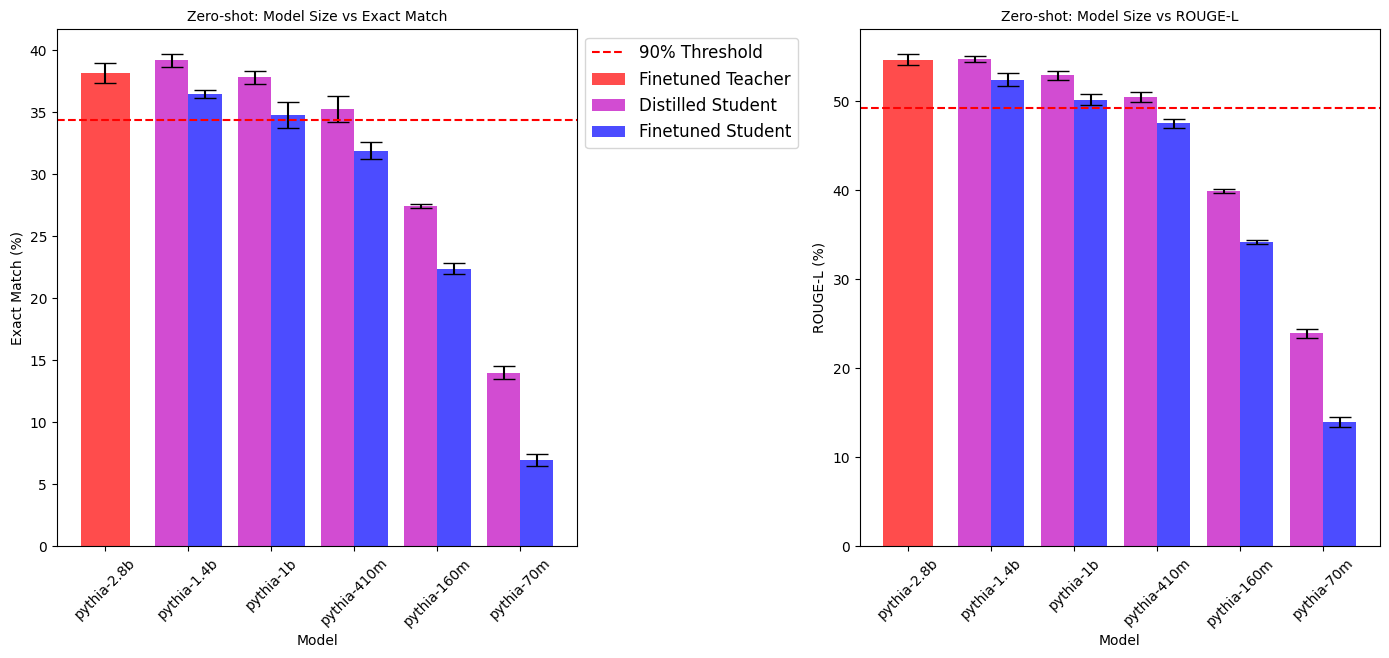

In [15]:
############### Model:Pythia, Dataset:MLQA(en), zero-shot & one-shot dataset evaluation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['pythia-2.8b', 'pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Bar width
bar_width = 0.40
bar_gap = bar_width / 10

plt.figure(figsize=(14, 12))

##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 38.14
teacher_exact_match_std_zero = 0.8364
distilled_exact_match_zero = [39.15, 37.79, 35.23, 27.40, 13.97]
distilled_exact_match_std_zero = [0.5355, 0.5094, 1.0554, 0.1582, 0.5320]
finetuned_exact_match_zero = [36.46, 34.74, 31.88, 22.35, 6.95]
finetuned_exact_match_std_zero = [0.3177, 1.0496, 0.7077, 0.4551, 0.4747]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 54.66
teacher_rouge_l_std_zero = 0.6524
distilled_rouge_l_zero = [54.76, 52.88, 50.42, 39.90, 23.90]
distilled_rouge_l_std_zero = [0.3462, 0.4863, 0.5604, 0.2325, 0.5313]
finetuned_rouge_l_zero = [52.41, 50.16, 47.49, 34.13, 13.90]
finetuned_rouge_l_std_zero = [0.7279, 0.6022, 0.5258, 0.2383, 0.5538]

# Plot Exact Match Scores (Zero-shot)
plt.subplot(2, 2, 1)
plt.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=8)
plt.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='m', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=8)
plt.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=8)
plt.axhline(y=0.9 * teacher_exact_match_zero, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=10)
plt.ylabel('Exact Match (%)', fontsize=10)
plt.title('Zero-shot: Model Size vs Exact Match', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=10)
#plt.legend(loc='upper right', fontsize=10)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_exact_match_zero + 1, f'{teacher_exact_match_zero:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_exact_match_zero):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_exact_match_zero):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores (Zero-shot)
plt.subplot(2, 2, 2)
plt.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=8)
plt.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='m', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=8)
plt.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=8)
plt.axhline(y=0.9 * teacher_rouge_l_zero, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=10)
plt.ylabel('ROUGE-L (%)', fontsize=10)
plt.title('Zero-shot: Model Size vs ROUGE-L', fontsize=10)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=10)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_rouge_l_zero + 1, f'{teacher_rouge_l_zero:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_rouge_l_zero):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_rouge_l_zero):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)



plt.tight_layout()
plt.show()

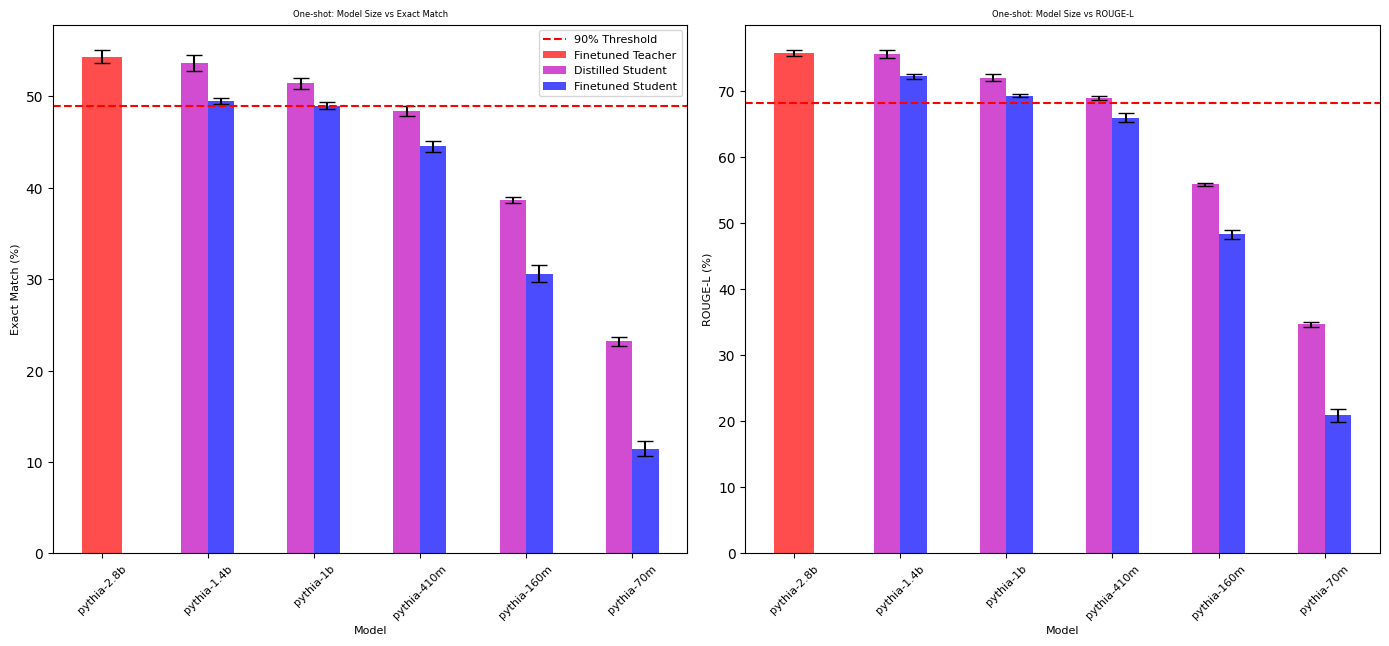

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and sizes
models = ['pythia-2.8b', 'pythia-1.4b', 'pythia-1b', 'pythia-410m', 'pythia-160m', 'pythia-70m']
x_teacher = [0]
x_students = np.arange(1, len(models)) 

# Bar width
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 12))

# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 54.36
teacher_exact_match_std_one = 0.7205
distilled_exact_match_one = [53.65, 51.45, 48.40, 38.68, 23.21]
distilled_exact_match_std_one = [0.8535, 0.5909, 0.5425, 0.3142, 0.5166]
finetuned_exact_match_one = [49.48, 48.97, 44.55, 30.59, 11.47]
finetuned_exact_match_std_one = [0.3284, 0.3907, 0.5932, 0.9464, 0.8084]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 75.72
teacher_rouge_l_std_one = 0.4178
distilled_rouge_l_one = [75.53, 71.98, 68.90, 55.82, 34.64]
distilled_rouge_l_std_one = [0.6309, 0.5225, 0.2906, 0.2051, 0.3884]
finetuned_rouge_l_one = [72.18, 69.22, 65.92, 48.27, 20.86]
finetuned_rouge_l_std_one = [0.3453, 0.2098, 0.6966, 0.6726, 0.9090]

# Plot Exact Match Scores (One-shot)
plt.subplot(2, 2, 3)
plt.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
plt.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='m', alpha=0.7, label='Distilled Student')
plt.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='b', alpha=0.7, label='Finetuned Student')
plt.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_one, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=8)
plt.ylabel('Exact Match (%)', fontsize=8)
plt.title('One-shot: Model Size vs Exact Match', fontsize=6)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=8)
plt.legend(loc='upper right', fontsize=8)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_exact_match_one + 1, f'{teacher_exact_match_one:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_exact_match_one):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_exact_match_one):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

# Plot ROUGE-L Scores (One-shot)
plt.subplot(2, 2, 4)
plt.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7)
plt.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=6)
plt.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='m', alpha=0.7)
plt.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='b', alpha=0.7)
plt.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_one, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Model', fontsize=8)
plt.ylabel('ROUGE-L (%)', fontsize=8)
plt.title('One-shot: Model Size vs ROUGE-L', fontsize=6)
plt.xticks(np.concatenate([x_teacher, x_students]), models, rotation=45, fontsize=8)
# Adding values on top of the bars
#plt.text(x_teacher[0], teacher_rouge_l_one + 1, f'{teacher_rouge_l_one:.2f}', ha='center', fontsize=6)
#for i, dist in enumerate(distilled_rouge_l_one):
 #   plt.text(x_students[i] - bar_width/2, dist + 1, f'{dist:.2f}', ha='center', fontsize=6)
#for i, fine in enumerate(finetuned_rouge_l_one):
 #   plt.text(x_students[i] + bar_width/2, fine + 1, f'{fine:.2f}', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

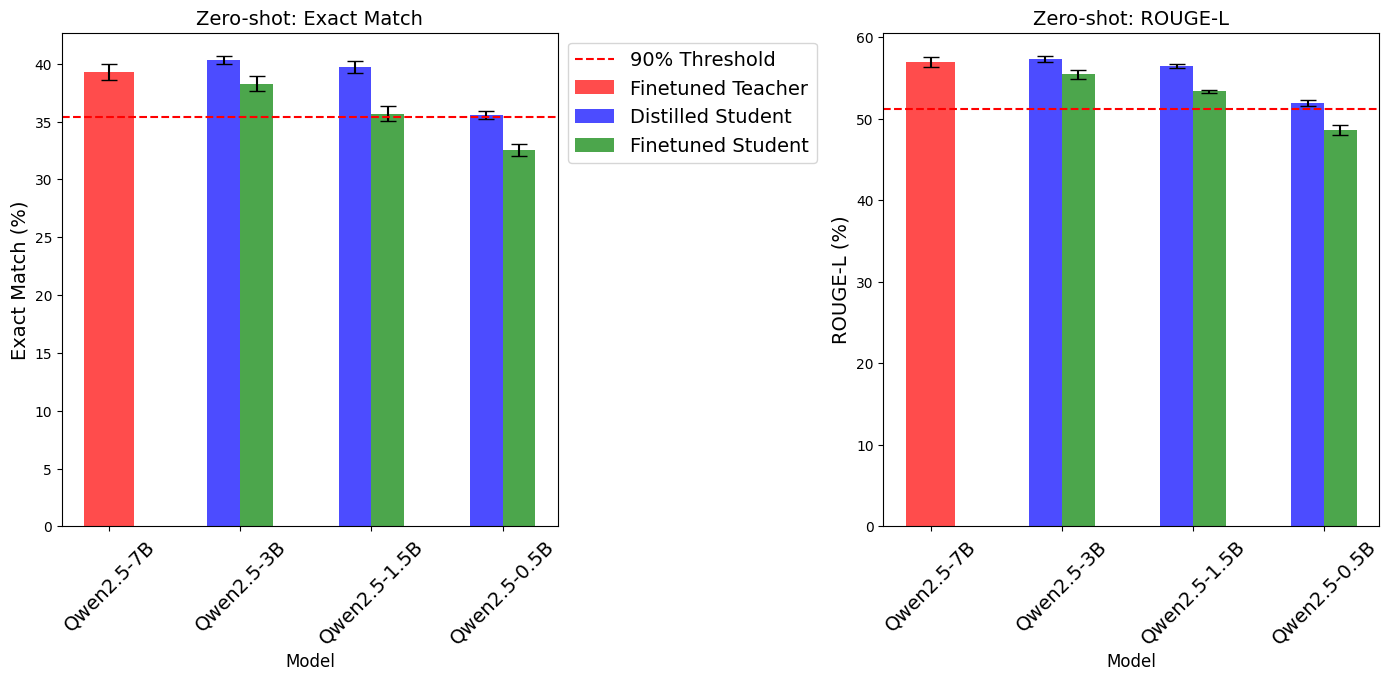

In [11]:
############### Model:Qwen2.5, Dataset:MLQA(en), zero-shot & one-shot dataset evaluation ######################
import matplotlib.pyplot as plt
import numpy as np

# Define a function to add values on top of the bars
#def add_bar_labels(ax, x_positions, heights, offset=1):
 #   for x, h in zip(x_positions, heights):
  #      ax.text(x, h + offset, f'{h:.2f}', ha='center', fontsize=6)

# Common settings
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models))
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 12))


##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 39.32
teacher_exact_match_std_zero = 0.6985
distilled_exact_match_zero = [40.33, 39.74, 35.59]
distilled_exact_match_std_zero = [0.3141, 0.4904, 0.3294]
finetuned_exact_match_zero = [38.28, 35.697, 32.54]
finetuned_exact_match_std_zero = [0.6651, 0.6202, 0.5461]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 56.92
teacher_rouge_l_std_zero = 0.5867
distilled_rouge_l_zero = [57.28, 56.45, 51.97]
distilled_rouge_l_std_zero = [0.3574, 0.1984, 0.3581]
finetuned_rouge_l_zero = [55.45, 53.35, 48.56]
finetuned_rouge_l_std_zero = [0.5631, 0.1550, 0.6207]

# Plot Exact Match Scores (Zero-shot)
ax1 = plt.subplot(2, 2, 1)
ax1.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax1.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=6)
ax1.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax1.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=6)
ax1.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax1.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_zero, color='r', linestyle='--', label='90% Threshold')
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Exact Match (%)', fontsize=14)
ax1.set_title('Zero-shot: Exact Match', fontsize=14)
ax1.set_xticks(np.concatenate([x_teacher, x_students]))
ax1.set_xticklabels(models, rotation=45, fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)
#ax1.legend(loc='upper right', fontsize=8)

# Adding values on top of the bars
#add_bar_labels(ax1, x_teacher, [teacher_exact_match_zero])
#add_bar_labels(ax1, x_students - bar_width/2, distilled_exact_match_zero)
#add_bar_labels(ax1, x_students + bar_width/2, finetuned_exact_match_zero)

# Plot ROUGE-L Scores (Zero-shot)
ax2 = plt.subplot(2, 2, 2)
ax2.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
ax2.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=6)
ax2.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
ax2.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=6)
ax2.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='g', alpha=0.7)
ax2.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_zero, color='r', linestyle='--', label='90% Threshold')
ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('ROUGE-L (%)', fontsize=14)
ax2.set_title('Zero-shot: ROUGE-L', fontsize=14)
ax2.set_xticks(np.concatenate([x_teacher, x_students]))
ax2.set_xticklabels(models, rotation=45, fontsize=14)

# Adding values on top of the bars
#add_bar_labels(ax2, x_teacher, [teacher_rouge_l_zero])
#add_bar_labels(ax2, x_students - bar_width/2, distilled_rouge_l_zero)
#add_bar_labels(ax2, x_students + bar_width/2, finetuned_rouge_l_zero)

plt.tight_layout()
plt.show()

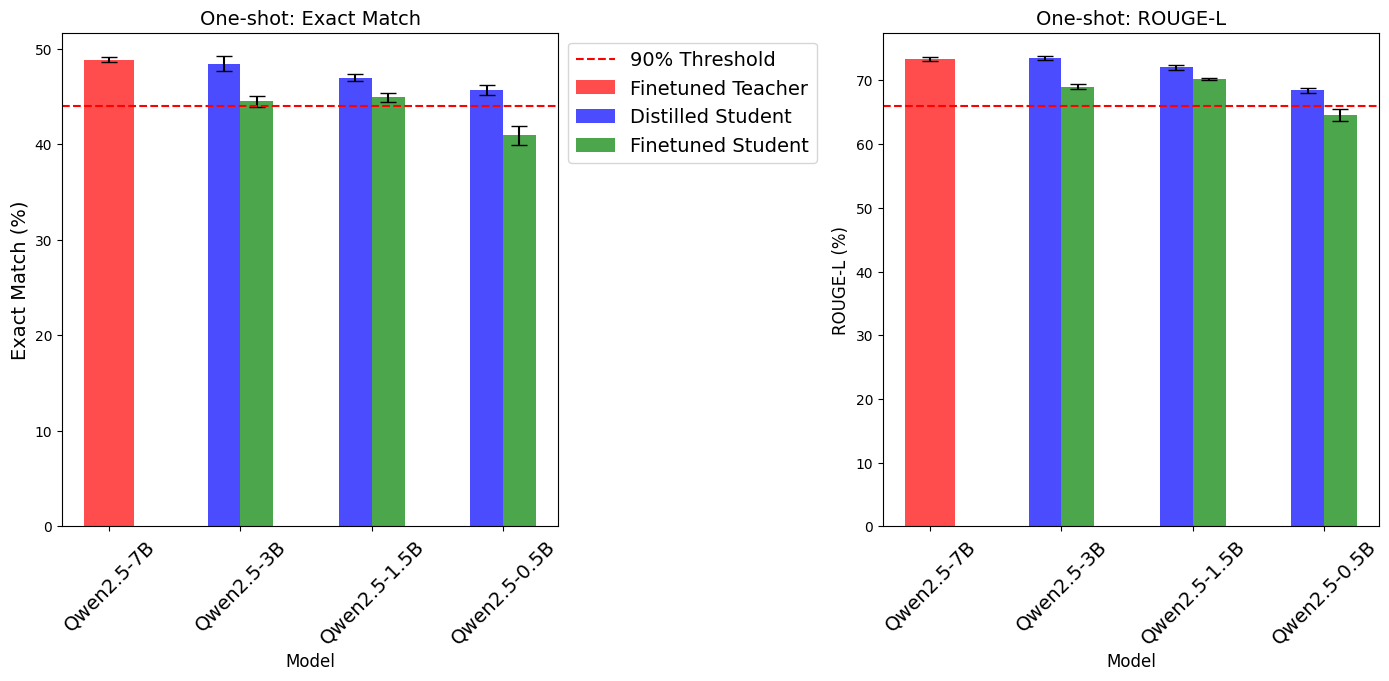

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to add values on top of the bars
#def add_bar_labels(ax, x_positions, heights, offset=1):
 #   for x, h in zip(x_positions, heights):
  #      ax.text(x, h + offset, f'{h:.2f}', ha='center', fontsize=6)

# Common settings
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models))
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(14, 12))

##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 48.87
teacher_exact_match_std_one = 0.2815
distilled_exact_match_one = [48.45, 46.97, 45.71]
distilled_exact_match_std_one = [0.7616, 0.3720, 0.5398]
finetuned_exact_match_one = [44.50, 44.94, 40.95]
finetuned_exact_match_std_one = [0.5423, 0.4576, 0.9948]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 73.34
teacher_rouge_l_std_one = 0.3003
distilled_rouge_l_one = [73.47, 72.04, 68.45]
distilled_rouge_l_std_one = [0.2987, 0.4083, 0.3564]
finetuned_rouge_l_one = [69.03, 70.22, 64.60]
finetuned_rouge_l_std_one = [0.4061, 0.2301, 0.91]

# Plot Exact Match Scores (One-shot)
ax3 = plt.subplot(2, 2, 3)
ax3.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax3.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=6)
ax3.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax3.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=6)
ax3.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax3.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_exact_match_one, color='r', linestyle='--', label='90% Threshold')
ax3.set_xlabel('Model', fontsize=12)
ax3.set_ylabel('Exact Match (%)', fontsize=14)
ax3.set_title('One-shot: Exact Match', fontsize=14)
ax3.set_xticks(np.concatenate([x_teacher, x_students]))
ax3.set_xticklabels(models, rotation=45, fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14) 
#ax3.legend(loc='upper right', fontsize=6)

# Adding values on top of the bars
#add_bar_labels(ax3, x_teacher, [teacher_exact_match_one])
#add_bar_labels(ax3, x_students - bar_width/2, distilled_exact_match_one)
#add_bar_labels(ax3, x_students + bar_width/2, finetuned_exact_match_one)

# Plot ROUGE-L Scores (One-shot)
ax4 = plt.subplot(2, 2, 4)
ax4.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax4.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=6)
ax4.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax4.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=6)
ax4.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax4.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=6)
plt.axhline(y=0.9 * teacher_rouge_l_one, color='r', linestyle='--', label='90% Threshold')
ax4.set_xlabel('Model', fontsize=12)
ax4.set_ylabel('ROUGE-L (%)', fontsize=12)
ax4.set_title('One-shot: ROUGE-L', fontsize=14)
ax4.set_xticks(np.concatenate([x_teacher, x_students]))
ax4.set_xticklabels(models, rotation=45, fontsize=14)

# Adding values on top of the bars
#add_bar_labels(ax4, x_teacher, [teacher_rouge_l_one])
#add_bar_labels(ax4, x_students - bar_width/2, distilled_rouge_l_one)
#add_bar_labels(ax4, x_students + bar_width/2, finetuned_rouge_l_one)

plt.tight_layout()
plt.show()

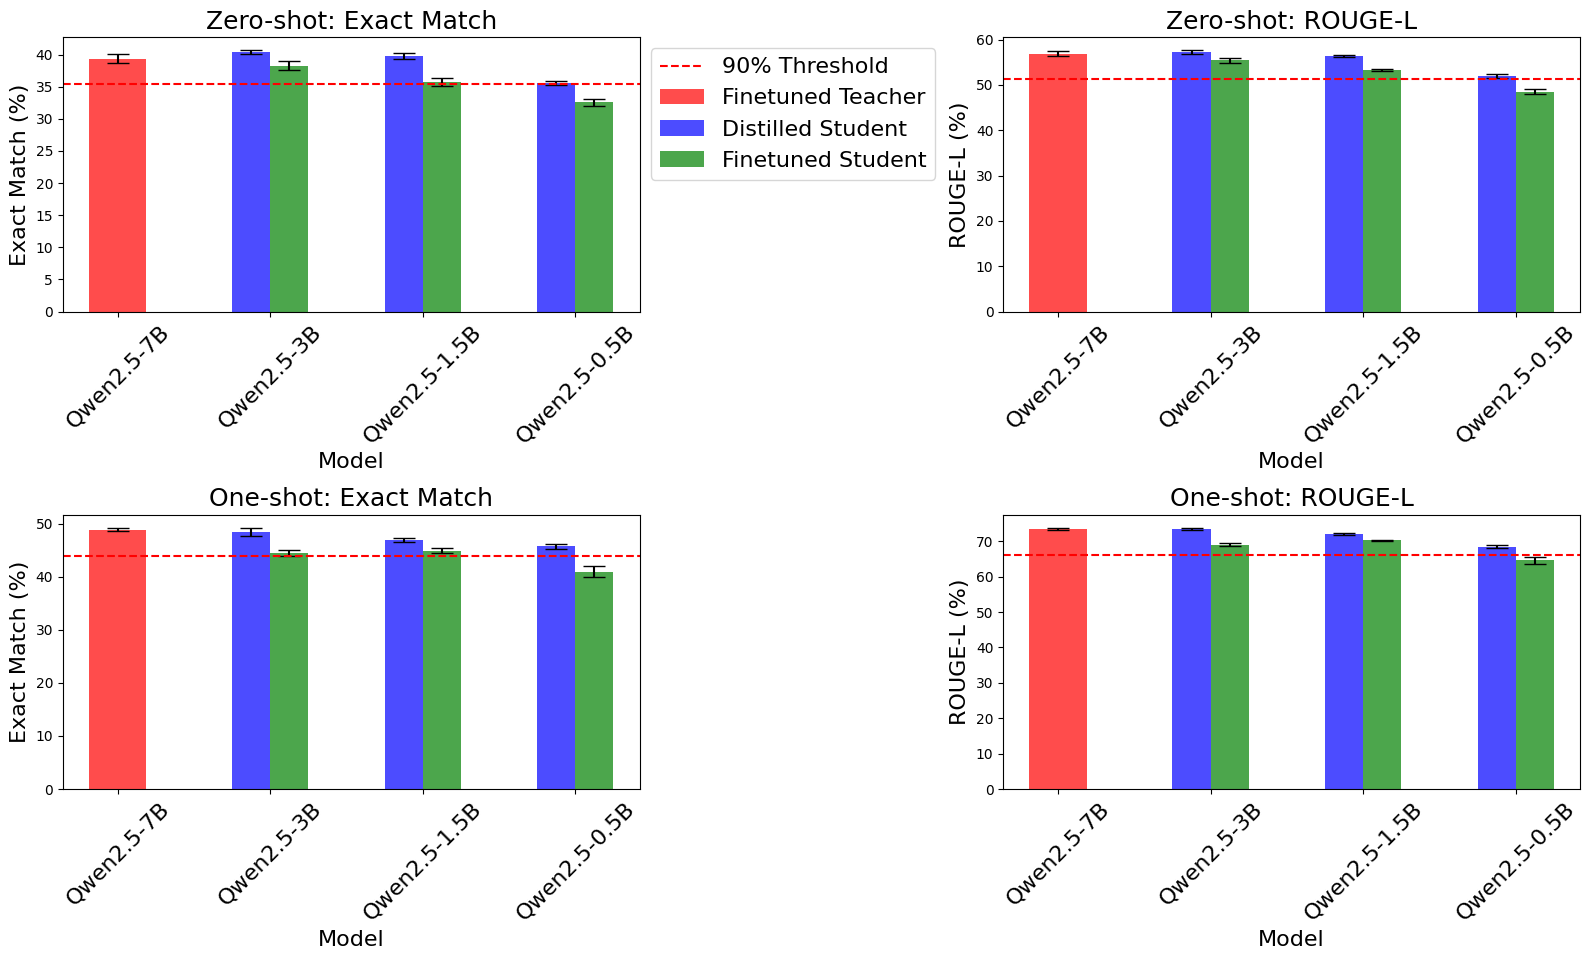

In [13]:
############### Model:Qwen2.5, Dataset:MLQA(en), zero-shot & one-shot dataset evaluation ######################

import matplotlib.pyplot as plt
import numpy as np

# Define a function to add values on top of the bars
def add_bar_labels(ax, x_positions, heights, offset=1):
    for x, h in zip(x_positions, heights):
        ax.text(x, h + offset, f'{h:.2f}', ha='center', fontsize=6)

# Common settings
models = ['Qwen2.5-7B', 'Qwen2.5-3B', 'Qwen2.5-1.5B', 'Qwen2.5-0.5B']
x_teacher = [0]
x_students = np.arange(1, len(models))
bar_width = 0.25
bar_gap = bar_width / 10

plt.figure(figsize=(16, 10))

##########################################
# Zero-shot Data (MLQA.en zero-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_zero = 39.32
teacher_exact_match_std_zero = 0.6985
distilled_exact_match_zero = [40.33, 39.74, 35.59]
distilled_exact_match_std_zero = [0.3141, 0.4904, 0.3294]
finetuned_exact_match_zero = [38.28, 35.697, 32.54]
finetuned_exact_match_std_zero = [0.6651, 0.6202, 0.5461]

# ROUGE-L scores and standard deviations
teacher_rouge_l_zero = 56.92
teacher_rouge_l_std_zero = 0.5867
distilled_rouge_l_zero = [57.28, 56.45, 51.97]
distilled_rouge_l_std_zero = [0.3574, 0.1984, 0.3581]
finetuned_rouge_l_zero = [55.45, 53.35, 48.56]
finetuned_rouge_l_std_zero = [0.5631, 0.1550, 0.6207]

# Plot Exact Match Scores (Zero-shot)
ax1 = plt.subplot(2, 2, 1)
ax1.bar(x_teacher, [teacher_exact_match_zero], width=bar_width*1.5, color='r', alpha=0.7, label='Finetuned Teacher')
ax1.errorbar(x_teacher, [teacher_exact_match_zero], yerr=[teacher_exact_match_std_zero], fmt='none', color='black', capsize=8)
ax1.bar(x_students - bar_width/2, distilled_exact_match_zero, width=bar_width, color='b', alpha=0.7, label='Distilled Student')
ax1.errorbar(x_students - bar_width/2, distilled_exact_match_zero, yerr=distilled_exact_match_std_zero, fmt='none', color='black', capsize=8)
ax1.bar(x_students + bar_width/2, finetuned_exact_match_zero, width=bar_width, color='g', alpha=0.7, label='Finetuned Student')
ax1.errorbar(x_students + bar_width/2, finetuned_exact_match_zero, yerr=finetuned_exact_match_std_zero, fmt='none', color='black', capsize=8)
plt.axhline(y=0.9 * teacher_exact_match_zero, color='r', linestyle='--', label='90% Threshold')
ax1.set_xlabel('Model', fontsize=16)
ax1.set_ylabel('Exact Match (%)', fontsize=16)
ax1.set_title('Zero-shot: Exact Match', fontsize=18)
ax1.set_xticks(np.concatenate([x_teacher, x_students]))
ax1.set_xticklabels(models, rotation=45, fontsize=16)
#ax1.legend(loc='upper right', fontsize=7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=16)

# Adding values on top of the bars
#add_bar_labels(ax1, x_teacher, [teacher_exact_match_zero])
#add_bar_labels(ax1, x_students - bar_width/2, distilled_exact_match_zero)
#add_bar_labels(ax1, x_students + bar_width/2, finetuned_exact_match_zero)

# Plot ROUGE-L Scores (Zero-shot)
ax2 = plt.subplot(2, 2, 2)
ax2.bar(x_teacher, [teacher_rouge_l_zero], width=bar_width*1.5, color='r', alpha=0.7)
ax2.errorbar(x_teacher, [teacher_rouge_l_zero], yerr=[teacher_rouge_l_std_zero], fmt='none', color='black', capsize=8)
ax2.bar(x_students - bar_width/2, distilled_rouge_l_zero, width=bar_width, color='b', alpha=0.7)
ax2.errorbar(x_students - bar_width/2, distilled_rouge_l_zero, yerr=distilled_rouge_l_std_zero, fmt='none', color='black', capsize=8)
ax2.bar(x_students + bar_width/2, finetuned_rouge_l_zero, width=bar_width, color='g', alpha=0.7)
ax2.errorbar(x_students + bar_width/2, finetuned_rouge_l_zero, yerr=finetuned_rouge_l_std_zero, fmt='none', color='black', capsize=8)
plt.axhline(y=0.9 * teacher_rouge_l_zero, color='r', linestyle='--', label='90% Threshold')
ax2.set_xlabel('Model', fontsize=16)
ax2.set_ylabel('ROUGE-L (%)', fontsize=16)
ax2.set_title('Zero-shot: ROUGE-L', fontsize=18)
ax2.set_xticks(np.concatenate([x_teacher, x_students]))
ax2.set_xticklabels(models, rotation=45, fontsize=16)

# Adding values on top of the bars
#add_bar_labels(ax2, x_teacher, [teacher_rouge_l_zero])
#add_bar_labels(ax2, x_students - bar_width/2, distilled_rouge_l_zero)
#add_bar_labels(ax2, x_students + bar_width/2, finetuned_rouge_l_zero)

##########################################
# One-shot Data (MLQA.en one-shot)
##########################################

# Exact Match scores and standard deviations
teacher_exact_match_one = 48.87
teacher_exact_match_std_one = 0.2815
distilled_exact_match_one = [48.45, 46.97, 45.71]
distilled_exact_match_std_one = [0.7616, 0.3720, 0.5398]
finetuned_exact_match_one = [44.50, 44.94, 40.95]
finetuned_exact_match_std_one = [0.5423, 0.4576, 0.9948]

# ROUGE-L scores and standard deviations
teacher_rouge_l_one = 73.34
teacher_rouge_l_std_one = 0.3003
distilled_rouge_l_one = [73.47, 72.04, 68.45]
distilled_rouge_l_std_one = [0.2987, 0.4083, 0.3564]
finetuned_rouge_l_one = [69.03, 70.22, 64.60]
finetuned_rouge_l_std_one = [0.4061, 0.2301, 0.91]

# Plot Exact Match Scores (One-shot)
ax3 = plt.subplot(2, 2, 3)
ax3.bar(x_teacher, [teacher_exact_match_one], width=bar_width*1.5, color='r', alpha=0.7)
ax3.errorbar(x_teacher, [teacher_exact_match_one], yerr=[teacher_exact_match_std_one], fmt='none', color='black', capsize=8)
ax3.bar(x_students - bar_width/2, distilled_exact_match_one, width=bar_width, color='b', alpha=0.7)
ax3.errorbar(x_students - bar_width/2, distilled_exact_match_one, yerr=distilled_exact_match_std_one, fmt='none', color='black', capsize=8)
ax3.bar(x_students + bar_width/2, finetuned_exact_match_one, width=bar_width, color='g', alpha=0.7)
ax3.errorbar(x_students + bar_width/2, finetuned_exact_match_one, yerr=finetuned_exact_match_std_one, fmt='none', color='black', capsize=8)
plt.axhline(y=0.9 * teacher_exact_match_one, color='r', linestyle='--', label='90% Threshold')
ax3.set_xlabel('Model', fontsize=16)
ax3.set_ylabel('Exact Match (%)', fontsize=16)
ax3.set_title('One-shot: Exact Match', fontsize=18)
ax3.set_xticks(np.concatenate([x_teacher, x_students]))
ax3.set_xticklabels(models, rotation=45, fontsize=16)

# Adding values on top of the bars
#add_bar_labels(ax3, x_teacher, [teacher_exact_match_one])
#add_bar_labels(ax3, x_students - bar_width/2, distilled_exact_match_one)
#add_bar_labels(ax3, x_students + bar_width/2, finetuned_exact_match_one)

# Plot ROUGE-L Scores (One-shot)
ax4 = plt.subplot(2, 2, 4)
ax4.bar(x_teacher, [teacher_rouge_l_one], width=bar_width*1.5, color='r', alpha=0.7)
ax4.errorbar(x_teacher, [teacher_rouge_l_one], yerr=[teacher_rouge_l_std_one], fmt='none', color='black', capsize=8)
ax4.bar(x_students - bar_width/2, distilled_rouge_l_one, width=bar_width, color='b', alpha=0.7)
ax4.errorbar(x_students - bar_width/2, distilled_rouge_l_one, yerr=distilled_rouge_l_std_one, fmt='none', color='black', capsize=8)
ax4.bar(x_students + bar_width/2, finetuned_rouge_l_one, width=bar_width, color='g', alpha=0.7)
ax4.errorbar(x_students + bar_width/2, finetuned_rouge_l_one, yerr=finetuned_rouge_l_std_one, fmt='none', color='black', capsize=8)
plt.axhline(y=0.9 * teacher_rouge_l_one, color='r', linestyle='--', label='90% Threshold')
ax4.set_xlabel('Model', fontsize=16)
ax4.set_ylabel('ROUGE-L (%)', fontsize=16)
ax4.set_title('One-shot: ROUGE-L', fontsize=18)
ax4.set_xticks(np.concatenate([x_teacher, x_students]))
ax4.set_xticklabels(models, rotation=45, fontsize=16)

# Adding values on top of the bars
#add_bar_labels(ax4, x_teacher, [teacher_rouge_l_one])
#add_bar_labels(ax4, x_students - bar_width/2, distilled_rouge_l_one)
#add_bar_labels(ax4, x_students + bar_width/2, finetuned_rouge_l_one)

#plt.figtext(0.5, -0.02, "Performance of Qwen2.5 on the SQuAD dataset across zero-shot and one-shot settings", 
#            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Add padding at the bottom

#plt.tight_layout()
plt.show()

In [6]:
################################ Experiment Time (single)

import re

def calculate_total_time(log_file_path):
    total_time = 0.0

    with open(log_file_path, 'r') as file:
        for line in file:
            match = re.search(r'step time: ([\d.]+)', line)
            if match:
                total_time += float(match.group(1))

    print(f"Total experiment time: {total_time:.2f} seconds")
    print(f"Equivalent to: {total_time / 60:.2f} minutes ({total_time / 3600:.2f} hours)")

# Example usage
log_file_path = "/home/IAIS/jdatta/distillm-new/results/qwen2.5/train/distillm/squad_1shot/3B_7B/log.txt" 
calculate_total_time(log_file_path)


Total experiment time: 100091.78 seconds
Equivalent to: 1668.20 minutes (27.80 hours)


In [4]:
############################# Squad-validation(one-shot) #########################

from transformers import AutoTokenizer
import json

# Load tokenizer for Pythia
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")

# Load your dataset
with open("/home/IAIS/jdatta/distillm-new/processed_data_pythia70m/squad_1shot/full/pythia/valid.jsonl", "r") as f:
    data = [json.loads(line) for line in f]

# Analyze truncation
context_limit = 2048
token_lengths = [len(tokenizer(sample["prompt"])["input_ids"]) for sample in data]

exceeding = [l for l in token_lengths if l > context_limit]
total = len(token_lengths)

print("Total samples:", total)
print("Samples exceeding 2048 tokens:", len(exceeding))
print("Percentage exceeding:", round(len(exceeding) / total * 100, 2))
print("Average prompt length:", sum(token_lengths) / total)
print("Max prompt length:", max(token_lengths))
print("Min prompt length:", min(token_lengths))


Total samples: 26044
Samples exceeding 2048 tokens: 0
Percentage exceeding: 0.0
Average prompt length: 373.36376900629705
Max prompt length: 1068
Min prompt length: 141


In [5]:
############################# Squad-validation(one-shot) #########################

from transformers import AutoTokenizer
import json

# Load tokenizer for Pythia
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")

# Load your dataset
with open("/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval.jsonl", "r") as f:
    data = [json.loads(line) for line in f]

# Analyze truncation
context_limit = 2048
token_lengths = [len(tokenizer(sample["prompt"])["input_ids"]) for sample in data]

exceeding = [l for l in token_lengths if l > context_limit]
total = len(token_lengths)

print("Total samples:", total)
print("Samples exceeding 2048 tokens:", len(exceeding))
print("Percentage exceeding:", round(len(exceeding) / total * 100, 2))
print("Average prompt length:", sum(token_lengths) / total)
print("Max prompt length:", max(token_lengths))
print("Min prompt length:", min(token_lengths))


Total samples: 11773
Samples exceeding 2048 tokens: 0
Percentage exceeding: 0.0
Average prompt length: 390.3873269345112
Max prompt length: 1198
Min prompt length: 121


In [7]:
import random

with open("/home/IAIS/jdatta/distillm-new/processed_data_pythia70m/squad_1shot/full/pythia/valid.jsonl", "r") as f:
    valid = [json.loads(line) for line in f]

with open("/home/IAIS/jdatta/distillm-new/data/squad_1shot/eval.jsonl", "r") as f:
    test = [json.loads(line) for line in f]

# Check 3 random prompts
for s in random.sample(valid, 3):
    print("VALID PROMPT:\n", s['prompt'], "\n---\n")

for s in random.sample(test, 3):
    print("TEST PROMPT:\n", s['prompt'], "\n---\n")

VALID PROMPT:
 1:
Context: There have been six instances as of 2009 in which the exemption process was initiated. Of these six, one was granted, one was partially granted, one was denied and three were withdrawn. Donald Baur, in The Endangered Species Act: law, policy, and perspectives, concluded," ... the exemption provision is basically a nonfactor in the administration of the ESA. A major reason, of course, is that so few consultations result in jeopardy opinions, and those that do almost always result in the identification of reasonable and prudent alternatives to avoid jeopardy."

Question: What is a key factor for the ESA?

Answer:
Answer: No answer available.

Current:
Context: The Chalukya Empire (Kannada: ಚಾಲುಕ್ಯರು [tʃaːɭukjə]) was an Indian royal dynasty that ruled large parts of southern and central India between the 6th and the 12th centuries. During this period, they ruled as three related yet individual dynasties. The earliest dynasty, known as the "Badami Chalukyas", rul

In [12]:

import json
import random
import time
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load model and tokenizer
model_name = "/home/IAIS/jdatta/distillm-new/results/pythia/train/sft/sft_mlqa_en/sft_2.8b/pythia-2.8b/5790"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()

# Load dataset
with open("/home/IAIS/jdatta/distillm-new/data/mlqa_1shot/english/valid.jsonl", "r") as f:
    data = [json.loads(line) for line in f.readlines()]

# Sample prompts
sampled_prompts = random.sample(data, 100)
inference_times = []

for entry in sampled_prompts:
    prompt = entry["prompt"]
    inputs = tokenizer(prompt, return_tensors="pt")

    start = time.time()
    output_ids = model.generate(**inputs, max_new_tokens=20)
    end = time.time()

    generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    print("\n---")
    print("Prompt:\n", prompt)
    print("Generated Output:\n", generated_text)
    inference_times.append(end - start)

avg_time = sum(inference_times) / len(inference_times)
print(f"\nAverage Inference Time per Prompt: {avg_time:.4f} seconds")


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Banana Fish (Japanese: バナナフィッシュ) is a Japanese manga series written and illustrated by Akimi Yoshida. Serialized in Bessatsu Shōjo Comic from 1985 to 1994 and adapted into an anime television series in 2018, the series follows Ash Lynx, a teenage gang leader in New York City. It takes its name from the J. D. Salinger short story "A Perfect Day for Bananafish".

Question: What fruit is mentioned in the name of this Japanese book series?

Answer:
Answer: Banana

Current:
Context: In Denmark and Norway, February 14 is known as Valentinsdag, and it is celebrated in much the same manner as in the United Kingdom. In Sweden it is called Alla hjärtans dag ("All Hearts' Day") and is not widely celebrated. A 2016 survey revealed that less than 50% of men and women were planning to buy presents for their partners. The holiday has only been observed since the 1960s.
Question: What is February 14th known as?
Answer:
Generated Output:
 1:
Context: Banana Fish (Japanese: バナナ

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Using the CS-4 it is possible to achieve a user speed of 20.0 kbit/s per time slot. However, using this scheme the cell coverage is 25% of normal. CS-1 can achieve a user speed of only 8.0 kbit/s per time slot, but has 98% of normal coverage. Newer network equipment can adapt the transfer speed automatically depending on the mobile location.

Question: what is the cell coverage if one uses this scheme?

Answer:
Answer: 25% of normal

Current:
Context: Although Aronson isolated this mycobacterium in 1926 from a fish, it was not until 1951 that it was found to be the cause of human disease by Linell and Norden. Large outbreaks of infection due to this atypical mycobacterium have been described in association with swimming. Infections related to swimming pools have now drastically fallen due to the improvements in the construction and maintenance of these facilities.The first case of M. marinum infection associated with a fish-tank ('fish-tank granuloma') was rep

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: It has been called his masterpiece, "the triumph of the art of Dickens", which marks a turning point in his work, the point of separation between the novels of youth and those of maturity. Though written in the first person, David Copperfield is considered to be more than an autobiography, going beyond this framework in the richness of its themes and the originality of its writing, which makes it a true autobiographical novel. In the words of the author, this novel was "a very complicated weaving of truth and invention". Some elements of the novel follow events in Dickens's own life. It was Dickens' favourite among his own novels. In the preface to the 1867 edition, Dickens wrote, "like many fond parents, I have in my heart of hearts a favourite child. And his name is David Copperfield."Dickens wrote this novel without an outline, unlike the way he wrote Dombey and Son, the previous novel. He wrote chapter summaries after the chapters were completed. Some aspe

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Ideas for a film based on the Avengers began in 2003, with Avi Arad, the CEO of Marvel Studios, first announcing plans to develop the film in April 2005, after Marvel Enterprises declared independence by allying with Merrill Lynch to produce a slate of films that would be distributed by Paramount Pictures. Marvel discussed their plans in a brief presentation to Wall Street analysts; the studio's intention was to release individual films for the main characters—to establish their identities and familiarize audiences with them—before merging the characters together in a crossover film. Screenwriter Zak Penn, who wrote The Incredible Hulk (2008), became attached to the film in 2006, and was hired by Marvel Studios to write the film in June 2007. In the wake of the 2007–2008 Writers Guild of America strike, Marvel negotiated with the Writers Guild of America to ensure that it could create films based on its comic book counterparts, including Captain America, Ant-M

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: In ancient times, most Koreans believed in their indigenous religion socially guided by mu (shamans). Buddhism was introduced from the Chinese Former Qin state in 372 to the northern Korean state of Goguryeo, and developed into distinctive Korean forms. At that time, the Korean peninsula was divided into three kingdoms: the aforementioned Goguryeo in the north, Baekje in the southwest, and Silla in the southeast. Buddhism reached Silla only in the 5th century, but it was made the state religion only in that kingdom in the year 552. In Goguryeo the Korean indigenous religion remained dominant, while Buddhism became more widespread in Silla and Baekje (both areas comprehended in modern South Korea).

Question: What state did the Chinese Former Qin introduce Buddhism to?

Answer:
Answer: Goguryeo

Current:
Context: In the Rhineland, 1 May is also celebrated by the delivery of a maypole, a tree covered in streamers to the house of a girl the night before. The tree

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: "Gangnam Style" is a South Korean neologism that refers to a lifestyle associated with the Gangnam District of Seoul, where people are trendy, hip and exude a certain supposed "class". The term was listed in Time's weekly vocabulary list as a manner associated with lavish lifestyles in Seoul's Gangnam district. Psy likened the Gangnam District to Beverly Hills, California, and said in an interview that he intended in a twisted sense of humor by claiming himself to be "Gangnam Style" when everything about the song, dance, looks, and the music video is far from being such a high class:

Question: What kind of behavior is associated with Gangnam, Korea?

Answer:
Answer: Gangnam Style

Current:
Context: Messenger RNA (mRNA) is the RNA that carries information from DNA to the ribosome, the sites of protein synthesis (translation) in the cell. The coding sequence of the mRNA determines the amino acid sequence in the protein that is produced. However, many RNAs do no

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The building consists of four main shopping floors. The top three levels have large openings (protected by decorative cast-iron railings) that allow natural light from the ceiling to illuminate the lower floors. Much of the tilework, especially under the central dome, is original, and the remainder is in keeping with the original style. Underground arcades lead south to Town Hall railway station and north to the Myer building.

Question: Is most of the tilework original or has it been redesigned?

Answer:
Answer: original

Current:
Context: On October 14, 1964, King won the Nobel Peace Prize for combating racial inequality through nonviolent resistance. In 1965, he helped organize the Selma to Montgomery marches. The following year, he and the SCLC took the movement north to Chicago to work on segregated housing. In his final years, he expanded his focus to include opposition towards poverty and the Vietnam War. He alienated many of his liberal allies with a 1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Breaking Dawn sees Edward and Bella marry. Bella becomes pregnant on their honeymoon, and the rapid growth of the half-human, half-vampire fetus swiftly impacts on Bella’s health. Edward tries to coerce her into having an abortion in order to save her own life. However, Bella feels a bond with her unborn child and insists on giving birth. Edward comes to feel love for the baby as well, after he hears its thoughts and learns that the baby loves Bella in return. Bella nearly dies giving birth in an emergency c-section, but Edward successfully delivers his daughter and then injects Bella's heart with his venom, healing her wounds by turning her into an immortal vampire. During Bella's painful transformation, Jacob imprints on their baby daughter, Renesmee.

Question: Who did Edward come to love?

Answer:
Answer: baby

Current:
Context: Charles Thomas Studd, often known as C. T. Studd (2 December 1860 – 16 July 1931), was a British missionary, a contributor to The

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Acetic acid is the second simplest carboxylic acid (after formic acid). It consists of a methyl group attached to a carboxyl group. It is an important chemical reagent and industrial chemical, used primarily in the production of cellulose acetate for photographic film, polyvinyl acetate for wood glue, and synthetic fibres and fabrics. In households, diluted acetic acid is often used in descaling agents. In the food industry, acetic acid is controlled by the food additive code E260 as an acidity regulator and as a condiment. In biochemistry, the acetyl group, derived from acetic acid, is fundamental to all forms of life. When bound to coenzyme A, it is central to the metabolism of carbohydrates and fats.

Question: What kind of acid does E260 control?

Answer:
Answer: acetic

Current:
Context: The electrical two-axis joystick was invented by C. B. Mirick at the United States Naval Research Laboratory (NRL) and patented in 1926 (U.S. Patent no. 1,597,416)".  NRL

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: In 1989, HP determined that Reduced Instruction Set Computing (RISC) architectures were approaching a processing limit at one instruction per cycle. HP researchers investigated a new architecture, later named Explicitly Parallel Instruction Computing (EPIC), that allows the processor to execute multiple instructions in each clock cycle. EPIC implements a form of very long instruction word (VLIW) architecture, in which a single instruction word contains multiple instructions. With EPIC, the compiler determines in advance which instructions can be executed at the same time, so the microprocessor simply executes the instructions and does not need elaborate mechanisms to determine which instructions to execute in parallel.

Question: What is the acronym for multiple instructions to be truncated into a single instruction?

Answer:
Answer: VLIW

Current:
Context: Prometheus ( prə-MEE-thee-əs) is a 2012 science fiction film directed by Ridley Scott, written by Jon Sp

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Fisher was born in Baltimore, Maryland. He grew up in Lawnside, New Jersey and attended Haddon Heights High School. It was there that he was introduced to theatre by his high school English teacher. He was active in the school's theatre and choir program and sang in his church's choir. An English teacher introduced him to acting and he auditioned for a school musical in his sophomore year.

Question: What state is Haddon Heights High School located in?

Answer:
Answer: New Jersey

Current:
Context: In the early 1930s, the worldwide Great Depression hit Germany hard, as unemployment soared and people lost confidence in the government. In January 1933, Adolf Hitler was appointed Chancellor of Germany. His Nazi Party quickly established a totalitarian regime, and Nazi Germany made increasingly aggressive territorial demands, threatening war if they were not met. Remilitarization of the Rhineland came in 1936, then annexation of Austria in the Anschluss and parts 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Doom 3 was released with a four-player multiplayer element, featuring four game modes. However, the game's community created a modification to boost this to eight or sixteen players. The Resurrection of Evil expansion would later officially increase the player limit to eight. The four game modes are all deathmatches. The standard deathmatch game mode involves each player moving around a level, collecting weaponry and killing the other players, with the player with the highest kills when the time runs out winning. A team variation of this involves the same principle. The third game mode is "last man standing", in which each player has a limited amount of respawns, with players losing a life when they are killed. Eventually, all but one player will be eliminated from the game, leaving the survivor as the winner. The final game mode is "tournament", in which two players fight each other while the other players watch as spectators. The victor of the battle remains

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: It has been called his masterpiece, "the triumph of the art of Dickens", which marks a turning point in his work, the point of separation between the novels of youth and those of maturity. Though written in the first person, David Copperfield is considered to be more than an autobiography, going beyond this framework in the richness of its themes and the originality of its writing, which makes it a true autobiographical novel. In the words of the author, this novel was "a very complicated weaving of truth and invention". Some elements of the novel follow events in Dickens's own life. It was Dickens' favourite among his own novels. In the preface to the 1867 edition, Dickens wrote, "like many fond parents, I have in my heart of hearts a favourite child. And his name is David Copperfield."Dickens wrote this novel without an outline, unlike the way he wrote Dombey and Son, the previous novel. He wrote chapter summaries after the chapters were completed. Some aspe

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Before the middle of the 20th century, most forest managers believed that fires should be suppressed at all times. By 1935, the U.S. Forest Service's fire management policy stipulated that all wildfires were to be suppressed by 10 a.m. the morning after they were first spotted. Firefighting crews were established throughout public lands, and generally staffed by young men during fire seasons. By 1940, firefighters known as smokejumpers would parachute out of airplanes to extinguish flames in remote locations. By the beginning of World War II, more than 8,000 fire lookout towers had been constructed in the United States. Though many have been torn down due to increased use of airplanes for fire spotting, three are still used each year in Yellowstone. Firefighting efforts were highly successful, with the area burned by wildfires reduced from an annual average of 30,000,000 acres (120,000 km2) during the 1930s, to between 2,000,000 acres (8,100 km2) and 5,000,000

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The discoveries Cassini made at Enceladus have prompted studies into follow-up mission concepts, including a probe flyby (Journey to Enceladus and Titan or JET) to analyze plume contents in-situ, a lander by the German Aerospace Center to study the habitability potential of its subsurface ocean (Enceladus Explorer), and two astrobiology-oriented mission concepts (the Enceladus Life Finder and Life Investigation For Enceladus (LIFE)).The European Space Agency (ESA) was assessing concepts in 2008 to send a probe to Enceladus in a mission to be combined with studies of Titan: Titan Saturn System Mission (TSSM). TSSM was a joint NASA/ESA flagship-class proposal for exploration of Saturn's moons, with a focus on Enceladus, and it was competing against the Europa Jupiter System Mission (EJSM) proposal for funding. In February 2009, it was announced that NASA/ESA had given the EJSM mission priority ahead of TSSM, although TSSM will continue to be studied and evaluate

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The Embassy opened at its Jerusalem location on May 14, 2018, the 70th anniversary of the creation of the modern State of Israel. It was relocated from its previous site in Tel Aviv by the Donald Trump Administration and is situated in the Arnona section of the US Consulate. The opening prayer was delivered by the Evangelical Reverend Robert Jeffress, and the closing prayer was given by the Evangelical Reverend John C. Hagee.The move came 23 years after the passage of the Jerusalem Embassy Act of October 23, 1995, which set a deadline of May 31, 1999, for the move. The Clinton, Bush, and Obama administrations had all deferred the move. Eugene Kontorovich claimed that the decision to shift the US embassy to this area is tantamount to the United States recognizing Israeli sovereignty over land that it captured in the Six-Day War in 1967.However, despite the move of the Embassy to Jerusalem, President Trump signed on June 4, 2018 an executive order postponing the

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: On August 29, an upper-level low absorbed the remnants of Hurricane Lane to the west-northwest of Hawaii. The storm was assigned the designation 96C by the United States Naval Research Laboratory (NRL). Traversing an area with sea surface temperatures 2 °C (3.6 °F) above-normal, the system coalesced into a subtropical storm by August 31. On September 2, the system reached its peak intensity and began to display an eye. Afterward, the system gradually began to weaken, while accelerating northward into colder waters. On September 3, the system weakened below tropical depression intensity, back into an extratropical low. On September 4, the system was absorbed by a larger extratropical storm in the Bering Sea.

Question: On what date did the storm become subtropical?

Answer:
Answer: August 31

Current:
Context: The medal table is based on information provided by the IOC and is consistent with IOC convention in its published medal tables. By default, the table is

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Indravarman II (Khmer: ឥន្ទ្រវរ្ម័នទី២) was a ruler of the Khmer Empire, son of Jayavarman VII.  There is some dispute regarding the actual period of his reign, even because his successor, Jayavarman VIII, probably destroyed historical records about him, but the only inscription which directly mention him reports that he died in 1243. He was a Buddhist and was also credited with having enlarged (or completed) some of Jayavarman VII's temple. During his peaceful kingdom, the Khmers lost control of Champa and the newborn Sukhothai Kingdom under Indraditya took possession of some western territories.

Question: What year did Jayavarnman VIII die?

Answer:
Answer: 1243

Current:
Context: According to the 2011 census Poonch district, India has a population of 476,820, roughly equal to the nation of Suriname.  This gives it a ranking of 548th in India (out of a total of 640). The district has a population density of 285 inhabitants per square kilometre (740/sq mi). 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: After the Japanese surrender to the Allies on 15 August 1945, Singapore fell into a brief state of violence and disorder; looting and revenge-killing were widespread. British troops led by Lord Louis Mountbatten, Supreme Allied Commander for Southeast Asia Command, returned to Singapore to receive formal surrender of the Japanese forces in the region from General Itagaki Seishiro on behalf of General Hisaichi Terauchi on 12 September 1945, and a British Military Administration was formed to govern the island until March 1946. Much of the infrastructure had been destroyed during the war, including electricity and water supply systems, telephone services, as well as the harbor facilities at the Port of Singapore. There was also a shortage of food leading to malnutrition, disease, and rampant crime and violence. High food prices, unemployment, and workers' discontent culminated into a series of strikes in 1947 causing massive stoppages in public transport and oth

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The discoveries Cassini made at Enceladus have prompted studies into follow-up mission concepts, including a probe flyby (Journey to Enceladus and Titan or JET) to analyze plume contents in-situ, a lander by the German Aerospace Center to study the habitability potential of its subsurface ocean (Enceladus Explorer), and two astrobiology-oriented mission concepts (the Enceladus Life Finder and Life Investigation For Enceladus (LIFE)).The European Space Agency (ESA) was assessing concepts in 2008 to send a probe to Enceladus in a mission to be combined with studies of Titan: Titan Saturn System Mission (TSSM). TSSM was a joint NASA/ESA flagship-class proposal for exploration of Saturn's moons, with a focus on Enceladus, and it was competing against the Europa Jupiter System Mission (EJSM) proposal for funding. In February 2009, it was announced that NASA/ESA had given the EJSM mission priority ahead of TSSM, although TSSM will continue to be studied and evaluate

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: In 1989, HP determined that Reduced Instruction Set Computing (RISC) architectures were approaching a processing limit at one instruction per cycle. HP researchers investigated a new architecture, later named Explicitly Parallel Instruction Computing (EPIC), that allows the processor to execute multiple instructions in each clock cycle. EPIC implements a form of very long instruction word (VLIW) architecture, in which a single instruction word contains multiple instructions. With EPIC, the compiler determines in advance which instructions can be executed at the same time, so the microprocessor simply executes the instructions and does not need elaborate mechanisms to determine which instructions to execute in parallel.

Question: What is the acronym for multiple instructions to be truncated into a single instruction?

Answer:
Answer: VLIW

Current:
Context: Encrypting File System (EFS) provides strong and user-transparent encryption of any file or folder on an

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Doom 3 was released with a four-player multiplayer element, featuring four game modes. However, the game's community created a modification to boost this to eight or sixteen players. The Resurrection of Evil expansion would later officially increase the player limit to eight. The four game modes are all deathmatches. The standard deathmatch game mode involves each player moving around a level, collecting weaponry and killing the other players, with the player with the highest kills when the time runs out winning. A team variation of this involves the same principle. The third game mode is "last man standing", in which each player has a limited amount of respawns, with players losing a life when they are killed. Eventually, all but one player will be eliminated from the game, leaving the survivor as the winner. The final game mode is "tournament", in which two players fight each other while the other players watch as spectators. The victor of the battle remains

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The new government was not in a secure position, and rumours of anti-communist plots increased. In 1922, Bodoo, Chagdarjav, Da Lama Puntsagdorj and others were executed on allegations that they had collaborated with internal and external enemies of the new state. In early 1923, amid official suspicions that a coup was planned for Tsagaan Sar, the state of alert became too exhausting for Sükhbaatar. He broke down on the night of February 14/15, and died on February 20. In the 1940s under Choibalsan's reign, it was alleged that Sükhbaatar had been poisoned, but later socialist publications did not explicitly discuss the cause of death. Nonetheless, this version is still somewhat popular in Mongolia. Some historians say that he died of pneumonia, because of cold rain. Neither version could be proved officially.

Question: Who did Sukhbaatar suspect there was a coup planned for in 1923?

Answer:
Answer: Tsagaan Sar

Current:
Context: Nesher T : Two-seat training v

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Like all the vampires in the Twilight series, Edward is described as being impossibly beautiful. At various points in the series, Bella compares him to the mythical Greek god Adonis. His skin is "like marble"—very pale, ice cold, and sparkles in the sunlight. She describes his facial features as being perfect and angular—high cheekbones, strong jawline, a straight nose, and full lips. His hair, which is always messy, retains the unusual bronze shade that he inherited in his human life from his biological mother. His eyes, once green, are now described as topaz. His appearance changes if he goes too long without feeding: his eyes darken, becoming almost black, and purple bruises appear beneath his eyes. Edward is 6'2", and has a slender but muscular body.

Question: Who does Bella compare Edward to?

Answer:
Answer: Adonis

Current:
Context: A prominence is a large, bright, gaseous feature extending outward from the Sun's surface, often in a loop shape. Promine

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The building consists of four main shopping floors. The top three levels have large openings (protected by decorative cast-iron railings) that allow natural light from the ceiling to illuminate the lower floors. Much of the tilework, especially under the central dome, is original, and the remainder is in keeping with the original style. Underground arcades lead south to Town Hall railway station and north to the Myer building.

Question: Is most of the tilework original or has it been redesigned?

Answer:
Answer: original

Current:
Context: The province is north of Bangkok and is part of the Bangkok metropolitan area. In many places the boundary between the two provinces is not noticeable as both sides of the boundary are equally urbanized. Pathum Thani town is the administrative seat, but Ban Rangsit, seat of Thanyaburi District, is the largest populated place in the province.Pathum Thani is an old province, heavily populated by the Mon people, dotted with 18

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: On August 29, an upper-level low absorbed the remnants of Hurricane Lane to the west-northwest of Hawaii. The storm was assigned the designation 96C by the United States Naval Research Laboratory (NRL). Traversing an area with sea surface temperatures 2 °C (3.6 °F) above-normal, the system coalesced into a subtropical storm by August 31. On September 2, the system reached its peak intensity and began to display an eye. Afterward, the system gradually began to weaken, while accelerating northward into colder waters. On September 3, the system weakened below tropical depression intensity, back into an extratropical low. On September 4, the system was absorbed by a larger extratropical storm in the Bering Sea.

Question: On what date did the storm become subtropical?

Answer:
Answer: August 31

Current:
Context: Statistical techniques are used in a wide range of types of scientific and social research, including: biostatistics,  computational biology,  computatio

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Like all the vampires in the Twilight series, Edward is described as being impossibly beautiful. At various points in the series, Bella compares him to the mythical Greek god Adonis. His skin is "like marble"—very pale, ice cold, and sparkles in the sunlight. She describes his facial features as being perfect and angular—high cheekbones, strong jawline, a straight nose, and full lips. His hair, which is always messy, retains the unusual bronze shade that he inherited in his human life from his biological mother. His eyes, once green, are now described as topaz. His appearance changes if he goes too long without feeding: his eyes darken, becoming almost black, and purple bruises appear beneath his eyes. Edward is 6'2", and has a slender but muscular body.

Question: Who does Bella compare Edward to?

Answer:
Answer: Adonis

Current:
Context: Methyllithium is the simplest organolithium reagent with the empirical formula CH3Li. This s-block organometallic compoun

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: On 1 December 1989 two businesses, Net and Silkar, partnered with Aer Lingus to create an inclusive tour charter airline called Pegasus Airlines and services were inaugurated on 15 April 1990 with two Boeing 737–400s. In Greek mythology, Pegasus (Greek: Πήγασος, Pégasos, 'strong') was a winged horse sired by Poseidon, in his role as horse-god, and foaled by the Gorgon Medusa. However, four months after the launch, Iraq invaded Kuwait and the seven month occupation that followed had a serious effect on Turkish tourism. By 1992, tourists began returning to the country and Pegasus grew with the acquisition of a third 737-400. The airline leased a further two Airbus A320s to meet the summer demand.After two positive years, Aer Lingus and Net sold their shares in the company in 1994 to Istanbul-based Yapi Kredibank, making Pegasus a purely Turkish company.On 4 September 1997, Pegasus placed an order for one 737-400 and one 737–800 from Boeing Commercial Airplanes m

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: After the Japanese surrender to the Allies on 15 August 1945, Singapore fell into a brief state of violence and disorder; looting and revenge-killing were widespread. British troops led by Lord Louis Mountbatten, Supreme Allied Commander for Southeast Asia Command, returned to Singapore to receive formal surrender of the Japanese forces in the region from General Itagaki Seishiro on behalf of General Hisaichi Terauchi on 12 September 1945, and a British Military Administration was formed to govern the island until March 1946. Much of the infrastructure had been destroyed during the war, including electricity and water supply systems, telephone services, as well as the harbor facilities at the Port of Singapore. There was also a shortage of food leading to malnutrition, disease, and rampant crime and violence. High food prices, unemployment, and workers' discontent culminated into a series of strikes in 1947 causing massive stoppages in public transport and oth

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The peak of Ternate's power came near the end of the 16th century, under Sultan Baabullah (1570–1583), when it had influence over most of the eastern part of Sulawesi, the Ambon and Seram area, Timor island, parts of southern Mindanao and as well as parts of Papua. It frequently engaged in fierce competition for control of its periphery with the nearby Sultanate of Tidore. According to historian Leonard Andaya, Ternate's "dualistic" rivalry with Tidore is a dominant theme in the early history of the Maluku Islands.

Question: Which areas did Sultan Baabullah have under his influence at the peak of his reign?

Answer:
Answer: Sulawesi, the Ambon and Seram area, Timor island, parts of southern Mindanao and as well as parts of Papua

Current:
Context: An ovarian cyst is a fluid-filled sac within the ovary. Often they cause no symptoms. Occasionally they may produce bloating, lower abdominal pain, or lower back pain. The majority of cysts are harmless. If the cyst

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Four periods are recognised in Pakistani architecture: pre-Islamic, Islamic, colonial, and post-colonial. With the beginning of the Indus civilization around the middle of the 3rd millennium BCE, an advanced urban culture developed for the first time in the region, with large buildings, some of which survive to this day. Mohenjo Daro, Harappa, and Kot Diji are among the pre-Islamic settlements that are now tourist attractions. The rise of Buddhism and the influence of Greek civilisation led to the development of a Greco-Buddhist style, starting from the 1st century CE. The high point of this era was the Gandhara style. An example of Buddhist architecture is the ruins of the Buddhist monastery Takht-i-Bahi in Khyber-Pakhtunkhwa.

Question: What two factors caused the Greco-Buddhist style to emerge?

Answer:
Answer: rise of Buddhism and the influence of Greek civilisation

Current:
Context: In astronomy, those elements with higher atomic numbers than helium are 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The building consists of four main shopping floors. The top three levels have large openings (protected by decorative cast-iron railings) that allow natural light from the ceiling to illuminate the lower floors. Much of the tilework, especially under the central dome, is original, and the remainder is in keeping with the original style. Underground arcades lead south to Town Hall railway station and north to the Myer building.

Question: Is most of the tilework original or has it been redesigned?

Answer:
Answer: original

Current:
Context: Most women of reproductive age develop small cysts each month, and large cysts that cause problems occur in about 8% of women before menopause. Ovarian cysts are present in about 16% of women after menopause and if present are more likely to be cancer.Benign ovarian cysts are common in asymptomatic premenarchal girls and found in approximately 68% of ovaries of girls 2–12 years old and in 84% of ovaries of girls 0–2 years o

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Parabuthus transvaalicus is found in deserts, scrublands and semi-arid regions of Botswana, Mozambique, Zimbabwe ,some parts of the Namib Desert and South Africa.

Question: What types of habitats is Parabuthus transvaalicus found in?

Answer:
Answer: deserts, scrublands and semi-arid regions

Current:
Context: Many groups are simultaneously groups and examples of other mathematical structures. In the language of category theory, they are group objects in a category, meaning that they are objects (that is, examples of another mathematical structure) which come with transformations (called morphisms) that mimic the group axioms. For example, every group (as defined above) is also a set, so a group is a group object in the category of sets.
Question: What is every group?
Answer:
Generated Output:
 1:
Context: Parabuthus transvaalicus is found in deserts, scrublands and semi-arid regions of Botswana, Mozambique, Zimbabwe,some parts of the Namib Desert and South A

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Banana Fish (Japanese: バナナフィッシュ) is a Japanese manga series written and illustrated by Akimi Yoshida. Serialized in Bessatsu Shōjo Comic from 1985 to 1994 and adapted into an anime television series in 2018, the series follows Ash Lynx, a teenage gang leader in New York City. It takes its name from the J. D. Salinger short story "A Perfect Day for Bananafish".

Question: What fruit is mentioned in the name of this Japanese book series?

Answer:
Answer: Banana

Current:
Context: Commercially, "Santa Tell Me" reached the top 10 in Denmark, Finland, the Netherlands, Norway, Sweden, South Korea and Switzerland, as well as the top 20 in Australia, Austria, Canada, the Czech Republic, Germany, Ireland, New Zealand, Slovakia and the United Kingdom. The song entered the US Billboard Hot 100 at number 65 and later peaked at number 42. The music video was directed by Chris Marrs Piliero and was released on Grande's official Vevo on December 12, 2014. The song received i

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Dutch architect & Benedictine monk Dom Hans van der Laan gave the name plastic number (Dutch: het plastische getal) to this number in 1928. In 1924, four years prior to van der Laan's christening of the number's name, French engineer Gérard Cordonnier had already discovered the number and referred to it as the radiant number (French: le nombre radiant). Unlike the names of the golden ratio and silver ratio, the word plastic was not intended by van der Laan to refer to a specific substance, but rather in its adjectival sense, meaning something that can be given a three-dimensional shape. This, according to Richard Padovan, is because the characteristic ratios of the number, 3/4 and 1/7, relate to the limits of human perception in relating one physical size to another. Van der Laan designed the 1967 St. Benedictusberg Abbey church to these plastic number proportions.The plastic number is also sometimes called the silver number, a name given to it by Midhat J. Ga

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Ideas for a film based on the Avengers began in 2003, with Avi Arad, the CEO of Marvel Studios, first announcing plans to develop the film in April 2005, after Marvel Enterprises declared independence by allying with Merrill Lynch to produce a slate of films that would be distributed by Paramount Pictures. Marvel discussed their plans in a brief presentation to Wall Street analysts; the studio's intention was to release individual films for the main characters—to establish their identities and familiarize audiences with them—before merging the characters together in a crossover film. Screenwriter Zak Penn, who wrote The Incredible Hulk (2008), became attached to the film in 2006, and was hired by Marvel Studios to write the film in June 2007. In the wake of the 2007–2008 Writers Guild of America strike, Marvel negotiated with the Writers Guild of America to ensure that it could create films based on its comic book counterparts, including Captain America, Ant-M

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: WAB has an Early Childhood Center, Elementary School, Middle School and High School. Each school section has a dedicated building, and the HUB Sports, Arts & Technology Center is a shared facility in the center of the campus. The school has three libraries: the Sabina Brady Library (ES), the Red Scroll Library (MS), and the Green Sky Studio (HS). Other facilities include:

Question: What is the name of the WAB school center that comes before Elementary School?

Answer:
Answer: Early Childhood Center

Current:
Context: Rail is the primary mode of transportation in Tokyo, which has the most extensive urban railway network in the world and an equally extensive network of surface lines. JR East operates Tokyo's largest railway network, including the Yamanote Line loop that circles the center of downtown Tokyo. Two different organizations operate the subway network: the private Tokyo Metro and the governmental Tokyo Metropolitan Bureau of Transportation. The Metrop

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Ideas for a film based on the Avengers began in 2003, with Avi Arad, the CEO of Marvel Studios, first announcing plans to develop the film in April 2005, after Marvel Enterprises declared independence by allying with Merrill Lynch to produce a slate of films that would be distributed by Paramount Pictures. Marvel discussed their plans in a brief presentation to Wall Street analysts; the studio's intention was to release individual films for the main characters—to establish their identities and familiarize audiences with them—before merging the characters together in a crossover film. Screenwriter Zak Penn, who wrote The Incredible Hulk (2008), became attached to the film in 2006, and was hired by Marvel Studios to write the film in June 2007. In the wake of the 2007–2008 Writers Guild of America strike, Marvel negotiated with the Writers Guild of America to ensure that it could create films based on its comic book counterparts, including Captain America, Ant-M

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The lion is a muscular, deep-chested cat with a short, rounded head, a reduced neck and round ears. Its fur varies in colour from light buff to silvery grey, yellowish red and dark brown. The colours of the underparts are generally lighter. A new-born lion has dark spots, which fade as the cub reaches adulthood, although faint spots often may still be seen on the legs and underparts. The lion is the only member of the cat family that displays obvious sexual dimorphism. Males have broader heads and a prominent mane that grows downwards and backwards covering most of the head, neck, shoulders, and chest. The mane is typically brownish and tinged with yellow, rust and black hairs.The tail of all lions ends in a dark, hairy tuft that in some lions conceals an approximately 5 mm (0.20 in)-long, hard "spine" or "spur" that is formed from the final, fused sections of tail bone. The functions of the spur are unknown. The tuft is absent at birth and develops at around 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Quantico, initially scheduled to air Tuesdays at 10:00 pm, was moved to Sundays at 10:00 pm due to a retooling of Of Kings and Prophets. The series premiered on ABC on Sunday, September 27, 2015. The series debuted in Canada on CTV on the same day as its American premiere. The episodes, about 43 minutes in length, were broadcast in standard and high definition. In Australia, it premiered on the Seven Network on October 11, 2015. The series was acquired by Alibi in the United Kingdom. Season two premiered on September 25, 2016. After the mid-season finale, it moved to Mondays at 10:00 p.m. on January 23, 2017. The third season premiered on April 26, 2018. After the cancellation, it was announced that the network will air the remaining episodes of the third season, as previously scheduled, on Friday nights.Standard- and high-definition episodes are available for download at the iTunes Store and Amazon Video, and ABC video on demand temporarily releases recent ep

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The new government was not in a secure position, and rumours of anti-communist plots increased. In 1922, Bodoo, Chagdarjav, Da Lama Puntsagdorj and others were executed on allegations that they had collaborated with internal and external enemies of the new state. In early 1923, amid official suspicions that a coup was planned for Tsagaan Sar, the state of alert became too exhausting for Sükhbaatar. He broke down on the night of February 14/15, and died on February 20. In the 1940s under Choibalsan's reign, it was alleged that Sükhbaatar had been poisoned, but later socialist publications did not explicitly discuss the cause of death. Nonetheless, this version is still somewhat popular in Mongolia. Some historians say that he died of pneumonia, because of cold rain. Neither version could be proved officially.

Question: Who did Sukhbaatar suspect there was a coup planned for in 1923?

Answer:
Answer: Tsagaan Sar

Current:
Context: Ancient peoples did not have t

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Jolie committed to acting professionally at the age of 16, but initially found it difficult to pass auditions, often being told that her demeanor was "too dark." She appeared in five of her brother's student films, made while he attended the USC School of Cinema-Television, as well as in several music videos, namely Lenny Kravitz's "Stand by My Woman" (1991), Antonello Venditti's "Alta Marea" (1991), The Lemonheads's "It's About Time" (1993), and Meat Loaf's "Rock and Roll Dreams Come Through" (1993). She began to learn from her father, as she noticed his method of observing people to become like them. Their relationship during this time was less strained, with Jolie realizing that they were both "drama queens."Jolie began her professional film career in 1993, when she played her first leading role in the straight-to-video science-fiction sequel Cyborg 2, as a near-human robot designed for corporate espionage and assassination. She was so disappointed with the

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: In 1989, HP determined that Reduced Instruction Set Computing (RISC) architectures were approaching a processing limit at one instruction per cycle. HP researchers investigated a new architecture, later named Explicitly Parallel Instruction Computing (EPIC), that allows the processor to execute multiple instructions in each clock cycle. EPIC implements a form of very long instruction word (VLIW) architecture, in which a single instruction word contains multiple instructions. With EPIC, the compiler determines in advance which instructions can be executed at the same time, so the microprocessor simply executes the instructions and does not need elaborate mechanisms to determine which instructions to execute in parallel.

Question: What is the acronym for multiple instructions to be truncated into a single instruction?

Answer:
Answer: VLIW

Current:
Context: If a closed-form expression for the solution is not available, the solution may be numerically approxima

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Early phylogenetic research was focused on East and Southern African lions, and already showed they can possibly be divided in two main clades; one to the west and the other to the east of the East African Rift. Lions in eastern Kenya are genetically much closer to lions in Southern Africa than to lions in Aberdare National Park in western Kenya. In a subsequent study, tissue and bone samples of 32 lion specimens in museums were used. Results indicated lions form three phylogeographic groups: one each in Asia and North Africa, in Central Africa and in Southern Africa. Up to 480 lion samples from up to 22 countries were analysed in subsequent phylogenetic studies, with results indicating two main evolutionary lion groups.Samples of 53 lions, both wild and captive, from 15 countries were used for phylogenetic analysis. Results showed little genetic diversity among lion samples from Asia and West and Central Africa, whereas samples from East and Southern Africa r

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Early phylogenetic research was focused on East and Southern African lions, and already showed they can possibly be divided in two main clades; one to the west and the other to the east of the East African Rift. Lions in eastern Kenya are genetically much closer to lions in Southern Africa than to lions in Aberdare National Park in western Kenya. In a subsequent study, tissue and bone samples of 32 lion specimens in museums were used. Results indicated lions form three phylogeographic groups: one each in Asia and North Africa, in Central Africa and in Southern Africa. Up to 480 lion samples from up to 22 countries were analysed in subsequent phylogenetic studies, with results indicating two main evolutionary lion groups.Samples of 53 lions, both wild and captive, from 15 countries were used for phylogenetic analysis. Results showed little genetic diversity among lion samples from Asia and West and Central Africa, whereas samples from East and Southern Africa r

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Security standards: When working mobile, one is dependent on public networks, requiring careful use of VPN. Security is a major concern while concerning the mobile computing standards on the fleet. One can easily attack the VPN through a huge number of networks interconnected through the line.

Question: What is a security standard when it comes to mobile networking?

Answer:
Answer: careful use of VPN

Current:
Context: The Joseon kingdom (1392–1910), strictly Neo-Confucian, harshly suppressed Korean Buddhism and Korean shamanism. Buddhist monasteries were destroyed and their number dropped from several hundreds to a mere thirty-six; Buddhism was eradicated from the life of towns as monks and nuns were prohibited from entering them and were marginalised to the mountains. These restrictions lasted until the 19th century.
Question: What was the primary cause of the decline of Buddhism?
Answer:
Generated Output:
 1:
Context: Security standards: When working mobi

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: One of the most populated of Suriname's districts, Commewijne relies primarily on agriculture for its income, with plantations dating back to the first Dutch colonisation of the area in the 17th century.

Question: Where is Commewijne located?

Answer:
Answer: Suriname

Current:
Context: On the morning of 9 August 1965, the Parliament of Malaysia voted 126–0 in favor of a constitutional amendment expelling Singapore from the federation; hours later, the Parliament of Singapore passed the Republic of Singapore Independence Act, establishing the island as an independent and sovereign republic.  A tearful Lee Kuan Yew announced in a televised press conference that Singapore had become a sovereign, independent nation. In a widely remembered quote, he stated: "For me, it is a moment of anguish. All my life, my whole adult life, I have believed in merger and unity of the two territories." The new state became the Republic of Singapore, with Yusof bin Ishak appointed

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The Embassy opened at its Jerusalem location on May 14, 2018, the 70th anniversary of the creation of the modern State of Israel. It was relocated from its previous site in Tel Aviv by the Donald Trump Administration and is situated in the Arnona section of the US Consulate. The opening prayer was delivered by the Evangelical Reverend Robert Jeffress, and the closing prayer was given by the Evangelical Reverend John C. Hagee.The move came 23 years after the passage of the Jerusalem Embassy Act of October 23, 1995, which set a deadline of May 31, 1999, for the move. The Clinton, Bush, and Obama administrations had all deferred the move. Eugene Kontorovich claimed that the decision to shift the US embassy to this area is tantamount to the United States recognizing Israeli sovereignty over land that it captured in the Six-Day War in 1967.However, despite the move of the Embassy to Jerusalem, President Trump signed on June 4, 2018 an executive order postponing the

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Recep Tayyip Erdoğan (; Turkish: [ɾeˈdʒep tajˈjip ˈæɾdo.an] (listen); born 26 February 1954) is a Turkish politician serving as the 12th and current President of Turkey since 2014. He previously served as Prime Minister from 2003 to 2014 and as Mayor of Istanbul from 1994 to 1998. He founded the Justice and Development Party (AKP) in 2001, leading it to general election victories in 2002, 2007 and 2011 before standing down upon his election as President in 2014. Coming from an Islamist political background and as a self-described conservative democrat, he has promoted socially conservative and liberal economic policies in his administration.Erdoğan played football for Kasımpaşa before being elected in 1994 as the Mayor of Istanbul from the Islamist Welfare Party. He was stripped of his position, banned from political office, and imprisoned for four months for inciting religious hatred. Erdoğan abandoned openly Islamist politics and established the moderate con

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: In 1906, Goldman decided to start a publication, "a place of expression for the young idealists in arts and letters". Mother Earth was staffed by a cadre of radical activists, including Hippolyte Havel, Max Baginski, and Leonard Abbott. In addition to publishing original works by its editors and anarchists around the world, Mother Earth reprinted selections from a variety of writers. These included the French philosopher Pierre-Joseph Proudhon, Russian anarchist Peter Kropotkin, German philosopher Friedrich Nietzsche, and British writer Mary Wollstonecraft. Goldman wrote frequently about anarchism, politics, labor issues, atheism, sexuality, and feminism, and was the first editor of the magazine.On May 18 of the same year, Alexander Berkman was released from prison. Carrying a bouquet of roses, Goldman met him on the train platform and found herself "seized by terror and pity" as she beheld his gaunt, pale form. Neither was able to speak; they returned to her 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Ant-Man is the name of several fictional superheroes appearing in books published by Marvel Comics. Created by Stan Lee, Larry Lieber and Jack Kirby, Ant-Man's first appearance was in Tales to Astonish #35 (September 1962). The persona was originally the brilliant scientist Hank Pym's superhero alias after inventing a substance that can change size, but Scott Lang and Eric O'Grady also took on the mantle after the original changed his superhero identity to various other aliases, such as Giant-Man, Goliath, and Yellowjacket.

Question: who created the first Ant-Man?

Answer:
Answer: Stan Lee, Larry Lieber and Jack Kirby

Current:
Context: Selimiye Barracks (Turkish: Selimiye Kışlası), also known as Scutari Barracks, is a Turkish Army barracks located in the Üsküdar district on the Asian part of Istanbul, Turkey. It was built first in 1800 by Sultan Selim III for the soldiers of the newly established  Nizam-ı Cedid (literally "New Order") in frame of the Ottoman

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Gliese 436 b was discovered in August 2004 by R. Paul Butler and Geoffrey Marcy of the Carnegie Institute of Washington and University of California, Berkeley, respectively, using the radial velocity method. Together with 55 Cancri e, it was the first of a new class of planets with a minimum mass (M sini) similar to Neptune.The planet was recorded to transit its star by an automatic process at NMSU on January 11, 2005, but this event went unheeded at the time. In 2007, Gillon led a team that observed the transit, grazing the stellar disc relative to Earth. Transit observations led to the determination of its exact mass and radius, both of which are very similar to that of Neptune, making Gliese 436 b at that time the smallest known transiting extrasolar planet. The planet is about four thousand kilometers larger in diameter than Uranus and five thousand kilometers larger than Neptune and slightly more massive. Gliese 436b orbits at a distance of four million k

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The peak of Ternate's power came near the end of the 16th century, under Sultan Baabullah (1570–1583), when it had influence over most of the eastern part of Sulawesi, the Ambon and Seram area, Timor island, parts of southern Mindanao and as well as parts of Papua. It frequently engaged in fierce competition for control of its periphery with the nearby Sultanate of Tidore. According to historian Leonard Andaya, Ternate's "dualistic" rivalry with Tidore is a dominant theme in the early history of the Maluku Islands.

Question: Which areas did Sultan Baabullah have under his influence at the peak of his reign?

Answer:
Answer: Sulawesi, the Ambon and Seram area, Timor island, parts of southern Mindanao and as well as parts of Papua

Current:
Context: The 1999 FIFA World Youth Championship took place in Nigeria between 3 April and 24 April 1999. This was the 12th edition of the tournament.
Question: Which soccer event was held in Nigeria in April 1999?
Answer:
Ge

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The Embassy opened at its Jerusalem location on May 14, 2018, the 70th anniversary of the creation of the modern State of Israel. It was relocated from its previous site in Tel Aviv by the Donald Trump Administration and is situated in the Arnona section of the US Consulate. The opening prayer was delivered by the Evangelical Reverend Robert Jeffress, and the closing prayer was given by the Evangelical Reverend John C. Hagee.The move came 23 years after the passage of the Jerusalem Embassy Act of October 23, 1995, which set a deadline of May 31, 1999, for the move. The Clinton, Bush, and Obama administrations had all deferred the move. Eugene Kontorovich claimed that the decision to shift the US embassy to this area is tantamount to the United States recognizing Israeli sovereignty over land that it captured in the Six-Day War in 1967.However, despite the move of the Embassy to Jerusalem, President Trump signed on June 4, 2018 an executive order postponing the

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Before the middle of the 20th century, most forest managers believed that fires should be suppressed at all times. By 1935, the U.S. Forest Service's fire management policy stipulated that all wildfires were to be suppressed by 10 a.m. the morning after they were first spotted. Firefighting crews were established throughout public lands, and generally staffed by young men during fire seasons. By 1940, firefighters known as smokejumpers would parachute out of airplanes to extinguish flames in remote locations. By the beginning of World War II, more than 8,000 fire lookout towers had been constructed in the United States. Though many have been torn down due to increased use of airplanes for fire spotting, three are still used each year in Yellowstone. Firefighting efforts were highly successful, with the area burned by wildfires reduced from an annual average of 30,000,000 acres (120,000 km2) during the 1930s, to between 2,000,000 acres (8,100 km2) and 5,000,000

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: On 1 December 1989 two businesses, Net and Silkar, partnered with Aer Lingus to create an inclusive tour charter airline called Pegasus Airlines and services were inaugurated on 15 April 1990 with two Boeing 737–400s. In Greek mythology, Pegasus (Greek: Πήγασος, Pégasos, 'strong') was a winged horse sired by Poseidon, in his role as horse-god, and foaled by the Gorgon Medusa. However, four months after the launch, Iraq invaded Kuwait and the seven month occupation that followed had a serious effect on Turkish tourism. By 1992, tourists began returning to the country and Pegasus grew with the acquisition of a third 737-400. The airline leased a further two Airbus A320s to meet the summer demand.After two positive years, Aer Lingus and Net sold their shares in the company in 1994 to Istanbul-based Yapi Kredibank, making Pegasus a purely Turkish company.On 4 September 1997, Pegasus placed an order for one 737-400 and one 737–800 from Boeing Commercial Airplanes m

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Recep Tayyip Erdoğan (; Turkish: [ɾeˈdʒep tajˈjip ˈæɾdo.an] (listen); born 26 February 1954) is a Turkish politician serving as the 12th and current President of Turkey since 2014. He previously served as Prime Minister from 2003 to 2014 and as Mayor of Istanbul from 1994 to 1998. He founded the Justice and Development Party (AKP) in 2001, leading it to general election victories in 2002, 2007 and 2011 before standing down upon his election as President in 2014. Coming from an Islamist political background and as a self-described conservative democrat, he has promoted socially conservative and liberal economic policies in his administration.Erdoğan played football for Kasımpaşa before being elected in 1994 as the Mayor of Istanbul from the Islamist Welfare Party. He was stripped of his position, banned from political office, and imprisoned for four months for inciting religious hatred. Erdoğan abandoned openly Islamist politics and established the moderate con

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The lion is a muscular, deep-chested cat with a short, rounded head, a reduced neck and round ears. Its fur varies in colour from light buff to silvery grey, yellowish red and dark brown. The colours of the underparts are generally lighter. A new-born lion has dark spots, which fade as the cub reaches adulthood, although faint spots often may still be seen on the legs and underparts. The lion is the only member of the cat family that displays obvious sexual dimorphism. Males have broader heads and a prominent mane that grows downwards and backwards covering most of the head, neck, shoulders, and chest. The mane is typically brownish and tinged with yellow, rust and black hairs.The tail of all lions ends in a dark, hairy tuft that in some lions conceals an approximately 5 mm (0.20 in)-long, hard "spine" or "spur" that is formed from the final, fused sections of tail bone. The functions of the spur are unknown. The tuft is absent at birth and develops at around 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The Embassy opened at its Jerusalem location on May 14, 2018, the 70th anniversary of the creation of the modern State of Israel. It was relocated from its previous site in Tel Aviv by the Donald Trump Administration and is situated in the Arnona section of the US Consulate. The opening prayer was delivered by the Evangelical Reverend Robert Jeffress, and the closing prayer was given by the Evangelical Reverend John C. Hagee.The move came 23 years after the passage of the Jerusalem Embassy Act of October 23, 1995, which set a deadline of May 31, 1999, for the move. The Clinton, Bush, and Obama administrations had all deferred the move. Eugene Kontorovich claimed that the decision to shift the US embassy to this area is tantamount to the United States recognizing Israeli sovereignty over land that it captured in the Six-Day War in 1967.However, despite the move of the Embassy to Jerusalem, President Trump signed on June 4, 2018 an executive order postponing the

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The building consists of four main shopping floors. The top three levels have large openings (protected by decorative cast-iron railings) that allow natural light from the ceiling to illuminate the lower floors. Much of the tilework, especially under the central dome, is original, and the remainder is in keeping with the original style. Underground arcades lead south to Town Hall railway station and north to the Myer building.

Question: Is most of the tilework original or has it been redesigned?

Answer:
Answer: original

Current:
Context: The St. John's census metropolitan area includes 12 suburban communities, the largest of which are the city of Mount Pearl and the towns of Conception Bay South and Paradise. The province's third-largest city is Corner Brook, which is situated on the Bay of Islands on the west coast of the island. This was recorded as a discovery by Captain James Cook.
Question: What city is the third largest in the province?
Answer:
Genera

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Four periods are recognised in Pakistani architecture: pre-Islamic, Islamic, colonial, and post-colonial. With the beginning of the Indus civilization around the middle of the 3rd millennium BCE, an advanced urban culture developed for the first time in the region, with large buildings, some of which survive to this day. Mohenjo Daro, Harappa, and Kot Diji are among the pre-Islamic settlements that are now tourist attractions. The rise of Buddhism and the influence of Greek civilisation led to the development of a Greco-Buddhist style, starting from the 1st century CE. The high point of this era was the Gandhara style. An example of Buddhist architecture is the ruins of the Buddhist monastery Takht-i-Bahi in Khyber-Pakhtunkhwa.

Question: What two factors caused the Greco-Buddhist style to emerge?

Answer:
Answer: rise of Buddhism and the influence of Greek civilisation

Current:
Context: The German Empire was dissolved in the German Revolution of 1918–1919, a

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Indravarman II (Khmer: ឥន្ទ្រវរ្ម័នទី២) was a ruler of the Khmer Empire, son of Jayavarman VII.  There is some dispute regarding the actual period of his reign, even because his successor, Jayavarman VIII, probably destroyed historical records about him, but the only inscription which directly mention him reports that he died in 1243. He was a Buddhist and was also credited with having enlarged (or completed) some of Jayavarman VII's temple. During his peaceful kingdom, the Khmers lost control of Champa and the newborn Sukhothai Kingdom under Indraditya took possession of some western territories.

Question: What year did Jayavarnman VIII die?

Answer:
Answer: 1243

Current:
Context: Human interface with device: Screens and keyboards tend to be small, which may make them hard to use. Alternate input methods such as speech or handwriting recognition require training.
Question: what is it difficult for some people to use mobile devices?
Answer:
Generated Output:

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Ideas for a film based on the Avengers began in 2003, with Avi Arad, the CEO of Marvel Studios, first announcing plans to develop the film in April 2005, after Marvel Enterprises declared independence by allying with Merrill Lynch to produce a slate of films that would be distributed by Paramount Pictures. Marvel discussed their plans in a brief presentation to Wall Street analysts; the studio's intention was to release individual films for the main characters—to establish their identities and familiarize audiences with them—before merging the characters together in a crossover film. Screenwriter Zak Penn, who wrote The Incredible Hulk (2008), became attached to the film in 2006, and was hired by Marvel Studios to write the film in June 2007. In the wake of the 2007–2008 Writers Guild of America strike, Marvel negotiated with the Writers Guild of America to ensure that it could create films based on its comic book counterparts, including Captain America, Ant-M

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The modern view, embraced by R. C. Senior and probably more solid since it is founded on numismatical analyses, suggests that Agathokleia was a later queen, perhaps ruling from 110 BC–100 BC or slightly later. In this case, Agathokleia was likely the widow of another king, possibly Nicias or Theophilus. In either case, Agathokleia was among the first women to rule a Hellenistic Kingdom, in the period following the reign of Alexander the Great.

Question: What was the gender of Agathokleia?

Answer:
Answer: women

Current:
Context: The win was Real's eighth European Cup Championship overall and their second in three years, and was notable for being Vicente del Bosque's first title as manager. It was also a landmark for being the first final played between two teams from the same nation. Upon this win, McManaman became the first English player to win the tournament with a non-English club.
Question: Who won the first ever final between two teams of the same nati

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Acetic acid is the second simplest carboxylic acid (after formic acid). It consists of a methyl group attached to a carboxyl group. It is an important chemical reagent and industrial chemical, used primarily in the production of cellulose acetate for photographic film, polyvinyl acetate for wood glue, and synthetic fibres and fabrics. In households, diluted acetic acid is often used in descaling agents. In the food industry, acetic acid is controlled by the food additive code E260 as an acidity regulator and as a condiment. In biochemistry, the acetyl group, derived from acetic acid, is fundamental to all forms of life. When bound to coenzyme A, it is central to the metabolism of carbohydrates and fats.

Question: What kind of acid does E260 control?

Answer:
Answer: acetic

Current:
Context: HDPE has high tensile strength. It is used in products and packaging such as milk jugs, detergent bottles, butter tubs, garbage containers, and water pipes. One-third of 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Gliese 436 b was discovered in August 2004 by R. Paul Butler and Geoffrey Marcy of the Carnegie Institute of Washington and University of California, Berkeley, respectively, using the radial velocity method. Together with 55 Cancri e, it was the first of a new class of planets with a minimum mass (M sini) similar to Neptune.The planet was recorded to transit its star by an automatic process at NMSU on January 11, 2005, but this event went unheeded at the time. In 2007, Gillon led a team that observed the transit, grazing the stellar disc relative to Earth. Transit observations led to the determination of its exact mass and radius, both of which are very similar to that of Neptune, making Gliese 436 b at that time the smallest known transiting extrasolar planet. The planet is about four thousand kilometers larger in diameter than Uranus and five thousand kilometers larger than Neptune and slightly more massive. Gliese 436b orbits at a distance of four million k

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: WAB has an Early Childhood Center, Elementary School, Middle School and High School. Each school section has a dedicated building, and the HUB Sports, Arts & Technology Center is a shared facility in the center of the campus. The school has three libraries: the Sabina Brady Library (ES), the Red Scroll Library (MS), and the Green Sky Studio (HS). Other facilities include:

Question: What is the name of the WAB school center that comes before Elementary School?

Answer:
Answer: Early Childhood Center

Current:
Context: Although the Greeks and Romans did much to advance water clock technology, they still continued to use shadow clocks. The mathematician and astronomer Theodosius of Bithynia, for example, is said to have invented a universal sundial that was accurate anywhere on Earth, though little is known about it. Others wrote of the sundial in the mathematics and literature of the period. Marcus Vitruvius Pollio, the Roman author of De Architectura, wrote on

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: After the Japanese surrender to the Allies on 15 August 1945, Singapore fell into a brief state of violence and disorder; looting and revenge-killing were widespread. British troops led by Lord Louis Mountbatten, Supreme Allied Commander for Southeast Asia Command, returned to Singapore to receive formal surrender of the Japanese forces in the region from General Itagaki Seishiro on behalf of General Hisaichi Terauchi on 12 September 1945, and a British Military Administration was formed to govern the island until March 1946. Much of the infrastructure had been destroyed during the war, including electricity and water supply systems, telephone services, as well as the harbor facilities at the Port of Singapore. There was also a shortage of food leading to malnutrition, disease, and rampant crime and violence. High food prices, unemployment, and workers' discontent culminated into a series of strikes in 1947 causing massive stoppages in public transport and oth

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Using the CS-4 it is possible to achieve a user speed of 20.0 kbit/s per time slot. However, using this scheme the cell coverage is 25% of normal. CS-1 can achieve a user speed of only 8.0 kbit/s per time slot, but has 98% of normal coverage. Newer network equipment can adapt the transfer speed automatically depending on the mobile location.

Question: what is the cell coverage if one uses this scheme?

Answer:
Answer: 25% of normal

Current:
Context: With a new name and label, the band released its second album, New American Gospel, in September 2000. Patrick Kennedy of Allmusic compared the band to Pantera stating, "The essential signatures of post-Pantera metal are in abundance on Lamb of God's inaugural album. New American Gospel provides a mighty oak upon which gritty American metal's faith is maintained, effectively bridging the '90s' insistence upon drill-sergeant technicality and the old school's determined focus on riff construction." Chris Adler comm

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: 22 January 1901 – 9 November 1901: His Royal Highness Prince Albert of Cornwall and York

Question: When did Prince Albert die?

Answer:
Answer: 9 November 1901

Current:
Context: In recent years, Romania has also started celebrating Valentine's Day. This has drawn backlash from several groups, institutions, and nationalist organizations like Noua Dreaptǎ, who condemn Valentine's Day for being superficial, commercialist, and imported Western kitsch. In order to counter the perceived denaturation of national culture, Dragobete, a spring festival celebrated in parts of Southern Romania, has been rekindled after having been ignored during the Communist years as the traditional Romanian holiday for lovers. The holiday is named after a character from Romanian folklore who was supposed to be the son of Baba Dochia. Its date used to vary depending on the geographical area, however nowadays it is commonly observed on February 24.
Question: The Romanian spring festival

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Although argon is a noble gas, it can form some compounds under various extreme conditions. Argon fluorohydride (HArF), a compound of argon with fluorine and hydrogen that is stable below 17 K (−256.1 °C; −429.1 °F), has been demonstrated.  Although the neutral ground-state chemical compounds of argon are presently limited to HArF, argon can form clathrates with water when atoms of argon are trapped in a lattice of water molecules. Ions, such as ArH+, and excited-state complexes, such as ArF, have been demonstrated. Theoretical calculation predicts several more argon compounds that should be stable but have not yet been synthesized.

Question: What noble gas is mentioned in these theoretical compounds?

Answer:
Answer: argon

Current:
Context: Named after the Holy Cross, its English name (Indefatigable) was given after a British vessel HMS Indefatigable. Santa Cruz hosts the largest human population in the archipelago at the town of Puerto Ayora, with a total 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Acetic acid is the second simplest carboxylic acid (after formic acid). It consists of a methyl group attached to a carboxyl group. It is an important chemical reagent and industrial chemical, used primarily in the production of cellulose acetate for photographic film, polyvinyl acetate for wood glue, and synthetic fibres and fabrics. In households, diluted acetic acid is often used in descaling agents. In the food industry, acetic acid is controlled by the food additive code E260 as an acidity regulator and as a condiment. In biochemistry, the acetyl group, derived from acetic acid, is fundamental to all forms of life. When bound to coenzyme A, it is central to the metabolism of carbohydrates and fats.

Question: What kind of acid does E260 control?

Answer:
Answer: acetic

Current:
Context: On 5 May, Sands died in the prison hospital on the sixty-sixth day of his hunger strike, prompting rioting in nationalist areas of Northern Ireland. Humphrey Atkins issue

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Encrypting File System (EFS) provides strong and user-transparent encryption of any file or folder on an NTFS volume. EFS works in conjunction with the EFS service, Microsoft's CryptoAPI and the EFS File System Run-Time Library (FSRTL). EFS works by encrypting a file with a bulk symmetric key (also known as the File Encryption Key, or FEK), which is used because it takes a relatively small amount of time to encrypt and decrypt large amounts of data than if an asymmetric key cipher is used. The symmetric key that is used to encrypt the file is then encrypted with a public key that is associated with the user who encrypted the file, and this encrypted data is stored in an alternate data stream of the encrypted file. To decrypt the file, the file system uses the private key of the user to decrypt the symmetric key that is stored in the file header. It then uses the symmetric key to decrypt the file. Because this is done at the file system level, it is transparent

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Lou Yun (simplified Chinese: 楼云; traditional Chinese: 樓雲; pinyin: Lóu Yún; born June 23, 1964 in Hangzhou, Zhejiang) is a retired Chinese gymnast who competed in the 1984 and 1988 Summer Olympic Games, winning the vault twice.

Question: How many times did the gymnast Los Yun win the vaults?

Answer:
Answer: twice

Current:
Context: In 1902 he graduated from Vilnius Military Academy. Larka participated in the Russo-Japanese War and graduated from the Imperial Nicholas Military Academy in 1912. He participated in World War I fighting on the Eastern front against the German Empire, including fighting in East Prussia, Poland and Romania. Larka became the first Minister of War of Republic of Estonia; in March he achieved rank of Major General. In 1918, during the German occupation, he participated in organising the Defence League. After the start of the Estonian Liberation War in 1918, Larka soon moved from position of Minister of War to Chief of Staff. In Februar

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: the Boston beam trawler MS Wave, which briefly became the auxiliary minesweeper USS Eagle (AM-132) before becoming USS Captor (PYc-40),

Question: What did it eventually become called?

Answer:
Answer: USS Captor (PYc-40)

Current:
Context: So the parser should also use the rule A → w if ε is in Fi(w) and it sees on the input stream a symbol that could follow A. Therefore, we also need the Follow-set of A, written as Fo(A) here, which is defined as the set of terminals a such that there is a string of symbols αAaβ that can be derived from the start symbol. We use $ as a special terminal indicating end of input stream and S as start symbol.
Question: What is $ used for?
Answer:
Generated Output:
 1:
Context: the Boston beam trawler MS Wave, which briefly became the auxiliary minesweeper USS Eagle (AM-132) before becoming USS Captor (PYc-40),

Question: What did it eventually become called?

Answer:
Answer: USS Captor (PYc-40)

Current:
Context: So the parser sh

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: It was built in 1995 for the 1997 FIFA World Youth Championship. The stadium is adjacent to the old stadium, the Sarawak State Stadium (Stadium Negeri) that was previously used to stage various tournaments and championship.

Question: When was the stadium built?

Answer:
Answer: 1995

Current:
Context: Boris Lvovich Vasilyev (Russian: Борис Львович Васильев; 21 May 1924 – 11 March 2013) was a Russian writer and screenwriter. He is considered the last representative of the so-called lieutenant prose, a group of former low-ranking Soviet officers who dramatised their traumatic World War II experience.
Question: When was Vasilyev born?
Answer:
Generated Output:
 1:
Context: It was built in 1995 for the 1997 FIFA World Youth Championship. The stadium is adjacent to the old stadium, the Sarawak State Stadium (Stadium Negeri) that was previously used to stage various tournaments and championship.

Question: When was the stadium built?

Answer:
Answer: 1995

Current:

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Although argon is a noble gas, it can form some compounds under various extreme conditions. Argon fluorohydride (HArF), a compound of argon with fluorine and hydrogen that is stable below 17 K (−256.1 °C; −429.1 °F), has been demonstrated.  Although the neutral ground-state chemical compounds of argon are presently limited to HArF, argon can form clathrates with water when atoms of argon are trapped in a lattice of water molecules. Ions, such as ArH+, and excited-state complexes, such as ArF, have been demonstrated. Theoretical calculation predicts several more argon compounds that should be stable but have not yet been synthesized.

Question: What noble gas is mentioned in these theoretical compounds?

Answer:
Answer: argon

Current:
Context: One of the film's most shocking moments involved an actual, severed, horse's head. Coppola received some criticism for the scene, although the head was obtained from a dog-food company from a horse that was to be killed 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The building consists of four main shopping floors. The top three levels have large openings (protected by decorative cast-iron railings) that allow natural light from the ceiling to illuminate the lower floors. Much of the tilework, especially under the central dome, is original, and the remainder is in keeping with the original style. Underground arcades lead south to Town Hall railway station and north to the Myer building.

Question: Is most of the tilework original or has it been redesigned?

Answer:
Answer: original

Current:
Context: Politically, Robert Menzies and the Liberal Party of Australia dominated much of the immediate post war era, defeating the Labor government of Ben Chifley in 1949, in part over a Labor proposal to nationalise banks and following a crippling coal strike led by the Australian Communist Party. Menzies became the country's longest-serving Prime Minister and the Liberal party, in coalition with the rural based Country Party, won

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Attalus was a protector of the Greek cities of Anatolia and viewed himself as the champion of Greeks against barbarians. During his reign he established Pergamon as a considerable power in the Greek East. He died in 197 BC, shortly before the end of the second war, at the age of 72, having suffered an apparent stroke while addressing a Boeotian war council some months before. He and his wife were admired for their rearing of their four sons. He was succeeded as king by his son Eumenes II.

Question: When did he die?

Answer:
Answer: 197 BC

Current:
Context: Benghazi continues to hold institutions and organizations normally associated with a national capital city, such as the country's parliament, national library, and the headquarters of Libyan Airlines, the national airline, and of the National Oil Corporation. This creates a constant atmosphere of rivalry and sensitivities between Benghazi and Tripoli, and between Cyrenaica and Tripolitania. The population 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: the Boston beam trawler MS Wave, which briefly became the auxiliary minesweeper USS Eagle (AM-132) before becoming USS Captor (PYc-40),

Question: What did it eventually become called?

Answer:
Answer: USS Captor (PYc-40)

Current:
Context: Age distribution was 31.40% under the age of 18, 9.00% from 18 to 24, 26.50% from 25 to 44, 20.60% from 45 to 64, and 12.40% who were 65 years of age or older. The median age was 33 years. For every 100 females there were 95.20 males. For every 100 females age 18 and over, there were 91.40 males.
Question: What is the percentage of the people under the age of 18?
Answer:
Generated Output:
 1:
Context: the Boston beam trawler MS Wave, which briefly became the auxiliary minesweeper USS Eagle (AM-132) before becoming USS Captor (PYc-40),

Question: What did it eventually become called?

Answer:
Answer: USS Captor (PYc-40)

Current:
Context: Age distribution was 31.40% under the age of 18, 9.00% from 18 to 24, 26.50% from 25 to

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: In ancient times, most Koreans believed in their indigenous religion socially guided by mu (shamans). Buddhism was introduced from the Chinese Former Qin state in 372 to the northern Korean state of Goguryeo, and developed into distinctive Korean forms. At that time, the Korean peninsula was divided into three kingdoms: the aforementioned Goguryeo in the north, Baekje in the southwest, and Silla in the southeast. Buddhism reached Silla only in the 5th century, but it was made the state religion only in that kingdom in the year 552. In Goguryeo the Korean indigenous religion remained dominant, while Buddhism became more widespread in Silla and Baekje (both areas comprehended in modern South Korea).

Question: What state did the Chinese Former Qin introduce Buddhism to?

Answer:
Answer: Goguryeo

Current:
Context: jQuery is a JavaScript library designed to simplify HTML DOM tree traversal and manipulation, as well as event handling, CSS animation, and Ajax. It i

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Security standards: When working mobile, one is dependent on public networks, requiring careful use of VPN. Security is a major concern while concerning the mobile computing standards on the fleet. One can easily attack the VPN through a huge number of networks interconnected through the line.

Question: What is a security standard when it comes to mobile networking?

Answer:
Answer: careful use of VPN

Current:
Context: It was the first time that all 45 member nations of the Olympic Council of Asia took part in this event. Also, Eurosport broadcast the event, marking the first time that the European continent could watch this Asian sporting event. 23 venues in the city including 21 competition venues were used for the Games.
Question: Who took part in the event for the first time?
Answer:
Generated Output:
 1:
Context: Security standards: When working mobile, one is dependent on public networks, requiring careful use of VPN. Security is a major concern while 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The Embassy opened at its Jerusalem location on May 14, 2018, the 70th anniversary of the creation of the modern State of Israel. It was relocated from its previous site in Tel Aviv by the Donald Trump Administration and is situated in the Arnona section of the US Consulate. The opening prayer was delivered by the Evangelical Reverend Robert Jeffress, and the closing prayer was given by the Evangelical Reverend John C. Hagee.The move came 23 years after the passage of the Jerusalem Embassy Act of October 23, 1995, which set a deadline of May 31, 1999, for the move. The Clinton, Bush, and Obama administrations had all deferred the move. Eugene Kontorovich claimed that the decision to shift the US embassy to this area is tantamount to the United States recognizing Israeli sovereignty over land that it captured in the Six-Day War in 1967.However, despite the move of the Embassy to Jerusalem, President Trump signed on June 4, 2018 an executive order postponing the

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: At 17 years old, Victoria had to perform many tedious official duties. Almost every evening, she had to appear at formal dinners, theatrical performances or public receptions. If foreign relatives of the Hohenzollerns were located in Berlin or Potsdam, her protocolary duties widened. Sometimes she was forced to greet guests of the royal family at the station at 7:00 in the morning and be present at receptions past midnight.Upon the arrival of Victoria in Berlin, King Frederick William IV gave to Frederick and his wife an old wing of the Berlin Royal Palace. The building was in very bad condition, and it did not even contain a bathtub. The couple moved to the Kronprinzenpalais in November 1858. In summer, they resided at the Neues Palais.

Question: what did the building lack?

Answer:
Answer: bathtub

Current:
Context: Panic! at the Disco is an American rock band from Las Vegas, Nevada, formed in 2004 by childhood friends Brendon Urie, Ryan Ross, Spencer Smith

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The new government was not in a secure position, and rumours of anti-communist plots increased. In 1922, Bodoo, Chagdarjav, Da Lama Puntsagdorj and others were executed on allegations that they had collaborated with internal and external enemies of the new state. In early 1923, amid official suspicions that a coup was planned for Tsagaan Sar, the state of alert became too exhausting for Sükhbaatar. He broke down on the night of February 14/15, and died on February 20. In the 1940s under Choibalsan's reign, it was alleged that Sükhbaatar had been poisoned, but later socialist publications did not explicitly discuss the cause of death. Nonetheless, this version is still somewhat popular in Mongolia. Some historians say that he died of pneumonia, because of cold rain. Neither version could be proved officially.

Question: Who did Sukhbaatar suspect there was a coup planned for in 1923?

Answer:
Answer: Tsagaan Sar

Current:
Context: Dragon Ball Z (Japanese: ドラゴンボ

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Before the middle of the 20th century, most forest managers believed that fires should be suppressed at all times. By 1935, the U.S. Forest Service's fire management policy stipulated that all wildfires were to be suppressed by 10 a.m. the morning after they were first spotted. Firefighting crews were established throughout public lands, and generally staffed by young men during fire seasons. By 1940, firefighters known as smokejumpers would parachute out of airplanes to extinguish flames in remote locations. By the beginning of World War II, more than 8,000 fire lookout towers had been constructed in the United States. Though many have been torn down due to increased use of airplanes for fire spotting, three are still used each year in Yellowstone. Firefighting efforts were highly successful, with the area burned by wildfires reduced from an annual average of 30,000,000 acres (120,000 km2) during the 1930s, to between 2,000,000 acres (8,100 km2) and 5,000,000

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The name Spartacus is otherwise manifested in the Black Sea region. Kings of the Thracian dynasty of the Cimmerian Bosporus and Pontus are known to have borne it, and a Thracian "Sparta" "Spardacus" or "Sparadokos", father of Seuthes I of the Odrysae, is also known.

Question: which King?

Answer:
Answer: Kings of the Thracian dynasty

Current:
Context: Mercury () is the ruling planet of Gemini and is exalted in Virgo and Aquarius. In classical Roman mythology, Mercury is the messenger of the gods, noted for his speed and swiftness. Echoing this, the scorching, airless world Mercury circles the Sun on the fastest orbit of any planet. Mercury takes only 88 days to orbit the Sun, spending about 7.33 days in each sign of the zodiac. Mercury is so close to the Sun that only a brief period exists after the Sun has set where it can be seen with the naked eye, before following the Sun beyond the horizon.Astrologically speaking, Mercury represents the principles of co

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The peak of Ternate's power came near the end of the 16th century, under Sultan Baabullah (1570–1583), when it had influence over most of the eastern part of Sulawesi, the Ambon and Seram area, Timor island, parts of southern Mindanao and as well as parts of Papua. It frequently engaged in fierce competition for control of its periphery with the nearby Sultanate of Tidore. According to historian Leonard Andaya, Ternate's "dualistic" rivalry with Tidore is a dominant theme in the early history of the Maluku Islands.

Question: Which areas did Sultan Baabullah have under his influence at the peak of his reign?

Answer:
Answer: Sulawesi, the Ambon and Seram area, Timor island, parts of southern Mindanao and as well as parts of Papua

Current:
Context: Many pre-Columbian civilizations were marked by permanent settlements, cities, agriculture, civic and monumental architecture, major earthworks, and complex societal hierarchies. Some of these civilizations had long

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: In the 19th and 20th centuries, before effective pharmacological treatment for hypertension became possible, three treatment modalities were used, all with numerous side-effects: strict sodium restriction (for example the rice diet), sympathectomy (surgical ablation of parts of the sympathetic nervous system), and pyrogen therapy (injection of substances that caused a fever, indirectly reducing blood pressure).The first chemical for hypertension, sodium thiocyanate, was used in 1900 but had many side effects and was unpopular. Several other agents were developed after the Second World War, the most popular and reasonably effective of which were tetramethylammonium chloride, hexamethonium, hydralazine, and reserpine (derived from the medicinal plant Rauwolfia serpentina). None of these were well tolerated. A major breakthrough was achieved with the discovery of the first well-tolerated orally available agents. The first was chlorothiazide, the first thiazide di

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The modern view, embraced by R. C. Senior and probably more solid since it is founded on numismatical analyses, suggests that Agathokleia was a later queen, perhaps ruling from 110 BC–100 BC or slightly later. In this case, Agathokleia was likely the widow of another king, possibly Nicias or Theophilus. In either case, Agathokleia was among the first women to rule a Hellenistic Kingdom, in the period following the reign of Alexander the Great.

Question: What was the gender of Agathokleia?

Answer:
Answer: women

Current:
Context: The human genome contains on the order of 25,000 genes which work in concert to produce on the order of 1,000,000 distinct proteins.  This is due to alternative splicing, and also because cells make important changes to proteins through posttranslational modification after they first construct them, so a given gene serves as the basis for many possible versions of a particular protein. In any case, a single mass spectrometry experime

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Thicke was born on March 1, 1947, in Kirkland Lake, Ontario, the son of Shirley "Joan" Isobel Marie (née Greer), a nurse, and William Jeffrey, a stockbroker. They divorced in 1953. His mother remarried to Brian Thicke, a physician, and they moved to Elliot Lake. Alan Thicke graduated from Elliot Lake Secondary School in 1965, and was elected homecoming king. He went on to attend the University of Western Ontario, where he joined the Delta Upsilon fraternity.

Question: Who did his mother remarry?

Answer:
Answer: Brian Thicke

Current:
Context: Springsteen has recorded both rock albums and more somber folk-oriented works. His most successful studio albums, Born to Run (1975) and Born in the U.S.A. (1984), find pleasures in the struggles of daily American life. He has sold more than 135 million records worldwide and more than 64 million records in the United States, making him one of the world's best-selling artists. He has earned numerous awards for his work, 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The Embassy opened at its Jerusalem location on May 14, 2018, the 70th anniversary of the creation of the modern State of Israel. It was relocated from its previous site in Tel Aviv by the Donald Trump Administration and is situated in the Arnona section of the US Consulate. The opening prayer was delivered by the Evangelical Reverend Robert Jeffress, and the closing prayer was given by the Evangelical Reverend John C. Hagee.The move came 23 years after the passage of the Jerusalem Embassy Act of October 23, 1995, which set a deadline of May 31, 1999, for the move. The Clinton, Bush, and Obama administrations had all deferred the move. Eugene Kontorovich claimed that the decision to shift the US embassy to this area is tantamount to the United States recognizing Israeli sovereignty over land that it captured in the Six-Day War in 1967.However, despite the move of the Embassy to Jerusalem, President Trump signed on June 4, 2018 an executive order postponing the

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The Embassy opened at its Jerusalem location on May 14, 2018, the 70th anniversary of the creation of the modern State of Israel. It was relocated from its previous site in Tel Aviv by the Donald Trump Administration and is situated in the Arnona section of the US Consulate. The opening prayer was delivered by the Evangelical Reverend Robert Jeffress, and the closing prayer was given by the Evangelical Reverend John C. Hagee.The move came 23 years after the passage of the Jerusalem Embassy Act of October 23, 1995, which set a deadline of May 31, 1999, for the move. The Clinton, Bush, and Obama administrations had all deferred the move. Eugene Kontorovich claimed that the decision to shift the US embassy to this area is tantamount to the United States recognizing Israeli sovereignty over land that it captured in the Six-Day War in 1967.However, despite the move of the Embassy to Jerusalem, President Trump signed on June 4, 2018 an executive order postponing the

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Banana Fish (Japanese: バナナフィッシュ) is a Japanese manga series written and illustrated by Akimi Yoshida. Serialized in Bessatsu Shōjo Comic from 1985 to 1994 and adapted into an anime television series in 2018, the series follows Ash Lynx, a teenage gang leader in New York City. It takes its name from the J. D. Salinger short story "A Perfect Day for Bananafish".

Question: What fruit is mentioned in the name of this Japanese book series?

Answer:
Answer: Banana

Current:
Context: Transformers is a 2007 American science fiction action film based on the toy line of the same name. The film, which combines computer animation with live-action filming, was directed by Michael Bay, with Steven Spielberg serving as executive producer. It was produced by Don Murphy and Tom DeSanto, and is the first installment in the live-action Transformers film series. The film stars Shia LaBeouf as Sam Witwicky, a teenager who gets caught up in a war between the heroic Autobots and th

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: The peak of Ternate's power came near the end of the 16th century, under Sultan Baabullah (1570–1583), when it had influence over most of the eastern part of Sulawesi, the Ambon and Seram area, Timor island, parts of southern Mindanao and as well as parts of Papua. It frequently engaged in fierce competition for control of its periphery with the nearby Sultanate of Tidore. According to historian Leonard Andaya, Ternate's "dualistic" rivalry with Tidore is a dominant theme in the early history of the Maluku Islands.

Question: Which areas did Sultan Baabullah have under his influence at the peak of his reign?

Answer:
Answer: Sulawesi, the Ambon and Seram area, Timor island, parts of southern Mindanao and as well as parts of Papua

Current:
Context: In May 1762, the incumbent Whig government of the Duke of Newcastle was replaced with one led by the Scottish Tory Lord Bute. Bute's opponents worked against him by spreading the calumny that he was having an affair

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Ant-Man is the name of several fictional superheroes appearing in books published by Marvel Comics. Created by Stan Lee, Larry Lieber and Jack Kirby, Ant-Man's first appearance was in Tales to Astonish #35 (September 1962). The persona was originally the brilliant scientist Hank Pym's superhero alias after inventing a substance that can change size, but Scott Lang and Eric O'Grady also took on the mantle after the original changed his superhero identity to various other aliases, such as Giant-Man, Goliath, and Yellowjacket.

Question: who created the first Ant-Man?

Answer:
Answer: Stan Lee, Larry Lieber and Jack Kirby

Current:
Context: NASA, ESA and CSA have collaborated on the telescope since 1996. ESA's participation in construction and launch was approved by its members in 2003 and an agreement was signed between ESA and NASA in 2007. In exchange for full partnership, representation and access to the observatory for its astronomers, ESA is providing the N

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Nangarhār (Pashto: ننګرهار‎; Persian: ننگرهار‎), also called Nangrahar or Ningrahar, is one of the 34 provinces of Afghanistan, located in the eastern part of the country. It is divided into twenty-two districts and has a population of about 1,436,000. The city of Jalalabad is the capital of Nangarhar province.

Question: Into how many districts is Nangrahar divided?

Answer:
Answer: twenty-two

Current:
Context: Four periods are recognised in Pakistani architecture: pre-Islamic, Islamic, colonial, and post-colonial. With the beginning of the Indus civilization around the middle of the 3rd millennium BCE, an advanced urban culture developed for the first time in the region, with large buildings, some of which survive to this day. Mohenjo Daro, Harappa, and Kot Diji are among the pre-Islamic settlements that are now tourist attractions. The rise of Buddhism and the influence of Greek civilisation led to the development of a Greco-Buddhist style, starting from t

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Before the middle of the 20th century, most forest managers believed that fires should be suppressed at all times. By 1935, the U.S. Forest Service's fire management policy stipulated that all wildfires were to be suppressed by 10 a.m. the morning after they were first spotted. Firefighting crews were established throughout public lands, and generally staffed by young men during fire seasons. By 1940, firefighters known as smokejumpers would parachute out of airplanes to extinguish flames in remote locations. By the beginning of World War II, more than 8,000 fire lookout towers had been constructed in the United States. Though many have been torn down due to increased use of airplanes for fire spotting, three are still used each year in Yellowstone. Firefighting efforts were highly successful, with the area burned by wildfires reduced from an annual average of 30,000,000 acres (120,000 km2) during the 1930s, to between 2,000,000 acres (8,100 km2) and 5,000,000

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



---
Prompt:
 1:
Context: Attalus was a protector of the Greek cities of Anatolia and viewed himself as the champion of Greeks against barbarians. During his reign he established Pergamon as a considerable power in the Greek East. He died in 197 BC, shortly before the end of the second war, at the age of 72, having suffered an apparent stroke while addressing a Boeotian war council some months before. He and his wife were admired for their rearing of their four sons. He was succeeded as king by his son Eumenes II.

Question: When did he die?

Answer:
Answer: 197 BC

Current:
Context: Mole crickets are relatively common, but because they are nocturnal and spend nearly all their lives underground in extensive tunnel systems, they are rarely seen. They inhabit agricultural fields and grassy areas. They are present in every continent with the exception of Antarctica; by 2014, 107 species had been described and more species are likely to be discovered, especially in Asia. Neoscapteriscus di

In [1]:

import json
import random
import time
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load model and tokenizer
model_name = "/home/IAIS/jdatta/distillm-new/results/pythia/train/distillm/mlqa_en/1.4b_2.8b_mlqa_en/5790"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()

# Load dataset
with open("/home/IAIS/jdatta/distillm-new/data/mlqa_1shot/english/valid.jsonl", "r") as f:
    data = [json.loads(line) for line in f.readlines()]

# Sample 100 prompts
sampled_prompts = random.sample(data, 100)
inference_times = []

for entry in sampled_prompts:
    prompt = entry["prompt"]
    inputs = tokenizer(prompt, return_tensors="pt")
   
    start = time.time()
    _ = model.generate(**inputs, max_new_tokens=20)
    end = time.time()
   
    inference_times.append(end - start)

print(f"Average Inference Time per Prompt: {sum(inference_times)/len(inference_times):.4f} seconds")


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for o

Average Inference Time per Prompt: 1.6702 seconds
